# Import Packages and Data

In [8]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_log_error, mean_squared_error, mean_absolute_error
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

dtype_dict = {
    **{col: str for col in [
        "Year of Data", "Primary activity", "Primary sector", "Primary industry",
        "Account Numbers", "Countries", "Scope 3 Sources", 
         "Scope_3_emissions_type"
        "Third_Party_Verification", "incorporated_country"
    ]},
    **{col: float for col in [
        "Revenue_USD", 
        "Market_Cap_USD", "ebitda_USD",
        "grossProfit_USD", "netIncome_USD",
        "cashAndCashEquivalents_USD", "longTermInvestments_USD",
        "totalAssets_USD", "totalLiabilities_USD",
        "totalInvestments_USD", "totalDebt_USD",
        "totalEquity_USD", "Scope_3_emissions_amount",
        "shortTermInvestments_USD",
        "Quantile_Scope_3_emissions", "BoxCox_Scope_3_emissions", "Robust_Scope_3_emissions","country_ghg_avg","country_population_avg","country_gdp_avg"
    ]}
}



prepped_df = pd.read_csv(r"C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\Scope_3_non_nulls_non_zero_winds_logged.csv", dtype=dtype_dict)

prepped_df = prepped_df.rename(columns={'Scope_3_emissions_amount': 'Scope 3 Amount'})
prepped_df = prepped_df.rename(columns={'incorporated_country': 'Countries'})
prepped_df = prepped_df.rename(columns={'account_name': 'Company Name'})
prepped_df = prepped_df.rename(columns={'Scope_3_emissions_type': 'Scope 3 Sources'})
prepped_df = prepped_df.rename(columns={'Year': 'Year of Data'})
prepped_df = prepped_df.rename(columns={'Third_party_verification': 'Third_Party_Verification'})
prepped_df = prepped_df.rename(columns={'Scope 1 2 total emission': 'Scope_1_2_total_emission'})
prepped_df['Calculation_Method_modeled'] = prepped_df['Calculation_Method_modeled'].fillna('Calculation Undetermined')

In [10]:
prepped_df.head()

Year of Data     Primary activity                  Primary sector  \
0         2013       Asset managers              Financial services   
1         2013       Asset managers              Financial services   
2         2013  Commercial services  Commercial & consumer services   
3         2013    Medical equipment    Medical equipment & supplies   
4         2013    Medical equipment    Medical equipment & supplies   

                Primary industry Account Numbers       Countries  \
0                       Services              44  United Kingdom   
1                       Services              44  United Kingdom   
2                       Services              58             USA   
3  Biotech, health care & pharma              64             USA   
4  Biotech, health care & pharma              64             USA   

          Company Name Primary Stock Ticker  Row_num  \
0             3i Group               III LN        5   
1             3i Group               III LN        6   
2   ABM INDUSTRIES INC               ABM US        6   
3  Abbott Laboratories               ABT US        1   
4  Abbott Laboratories               ABT US        2   

                 Scope 3 Sources     Evaluation Status  Scope 3 Amount  \
0  Waste generated in operations  Relevant, calculated           12.34   
1                Business travel  Relevant, calculated           56.78   
2                Business travel  Relevant, calculated         1706.23   
3   Purchased goods and services  Relevant, calculated      5802000.00   
4                  Capital goods  Relevant, calculated       504000.00   

   Perc emissions calculated w primary data  Scope_1_2_total_emission  \
0                                       0.0              4.063500e+02   
1                                       0.0              4.063500e+02   
2                                       0.0              5.818828e+04   
3                                       0.0              1.055384e+06   
4                                       0.0              1.055384e+06   

                         Third_Party_Verification   Revenue_USD  \
0  Third party verification or assurance complete  9.385300e+08   
1  Third party verification or assurance complete  9.385300e+08   
2        No third party verification or assurance  4.809281e+09   
3        No third party verification or assurance  2.184800e+10   
4        No third party verification or assurance  2.184800e+10   

   Market_Cap_USD    ebitda_USD  grossProfit_USD  netIncome_USD  \
0    4.640933e+09  7.899400e+08     9.385300e+08   6.565900e+08   
1    4.640933e+09  7.899400e+08     9.385300e+08   6.565900e+08   
2    1.592463e+09  1.538970e+08     4.958520e+08   7.290000e+07   
3    5.756930e+10  3.452000e+09     1.180800e+10   2.576000e+09   
4    5.756930e+10  3.452000e+09     1.180800e+10   2.576000e+09   

   cashAndCashEquivalents_USD  longTermInvestments_USD  totalAssets_USD  \
0                8.166100e+08             4.460240e+09     5.572760e+09   
1                8.166100e+08             4.460240e+09     5.572760e+09   
2                3.263900e+07             3.595100e+07     2.119236e+09   
3                3.475000e+09             1.190000e+08     4.295300e+10   
4                3.475000e+09             1.190000e+08     4.295300e+10   

   totalLiabilities_USD  totalInvestments_USD  totalDebt_USD  totalEquity_USD  \
0          1.371600e+09          4.460240e+09   1.078230e+09     4.201160e+09   
1          1.371600e+09          4.460240e+09   1.078230e+09     4.201160e+09   
2          1.201729e+09          3.595100e+07   3.148700e+08     9.175070e+08   
3          1.768600e+10          4.742000e+09   6.561000e+09     2.526700e+10   
4          1.768600e+10          4.742000e+09   6.561000e+09     2.526700e+10   

  Calculation_Method_modeled  log_ebitda_USD  log_grossProfit_USD  \
0   Calculation Undetermined       20.487468            20.659825   
1   Calculation Undetermined       20.487468            20.6598

In [12]:
Scope_3_df  = prepped_df.copy()

# Global Totals Visualization

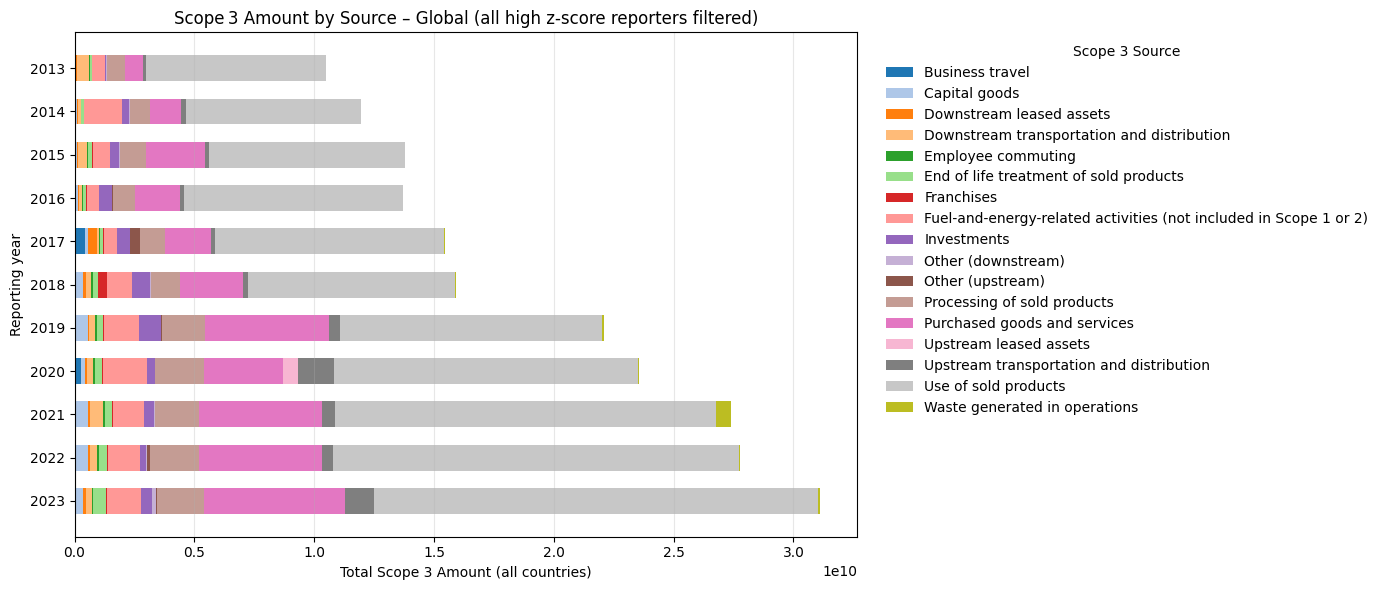

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------- CONFIG --------------------
DF_NAME   = "Scope_3_df"           # make sure this dataframe is loaded
YEAR_COL  = "Year of Data"
SOURCE_COL = "Scope 3 Sources"
VALUE_COL  = "Scope 3 Amount"

# -------------------- SAFETY --------------------
if DF_NAME not in globals():
    raise NameError(f"{DF_NAME} is not defined. Load it, then rerun.")
df = globals()[DF_NAME]

# -------------------- PREP THE DATA --------------------
df_agg = (
    df.groupby([YEAR_COL, SOURCE_COL])[VALUE_COL]
      .sum()
      .reset_index()
)

# pivot → one column per source, rows = years
pivot = df_agg.pivot(index=YEAR_COL, columns=SOURCE_COL, values=VALUE_COL).fillna(0)

# sort years chronologically (index may be strings)
pivot.index = pivot.index.astype(int)
pivot = pivot.sort_index()

# colours: use matplotlib default qualitative palette
source_names = pivot.columns.tolist()
colors = plt.cm.tab20.colors   # 20 distinct colours
color_cycle = [colors[i % len(colors)] for i in range(len(source_names))]
color_map   = dict(zip(source_names, color_cycle))

# -------------------- PLOT --------------------
fig, ax = plt.subplots(figsize=(14, 6))

bottom = np.zeros(len(pivot))
bar_height = 0.6

for src in source_names:
    values = pivot[src].values
    ax.barh(
        pivot.index.astype(str),  # y positions
        values,
        left=bottom,
        height=bar_height,
        color=color_map[src],
        label=src,
    )
    bottom += values   # stack

ax.set_xlabel("Total Scope 3 Amount (all countries)")
ax.set_ylabel("Reporting year")
ax.set_title("Scope 3 Amount by Source – Global (all high z-score reporters filtered)")
ax.invert_yaxis()  # most recent year on top
ax.grid(axis="x", alpha=0.3)

# Build a legend outside
ax.legend(
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    frameon=False,
    title="Scope 3 Source"
)

plt.tight_layout()
plt.show()


# Mixed‑Effects Modeling of Scope 3 Emissions by Source Category

This script builds a separate hierarchical regression for each Scope 3 source type to uncover the drivers of greenhouse‑gas emissions. After filtering out zero‐emission entries and applying a signed‐log transform to stabilize variance, it engineers log‑scaled financial and country‐level predictors. Each source group is then modeled with a linear mixed‑effects model that treats primary sector as the higher‑level grouping factor and company as a variance component. Multiple optimizers are tried to ensure convergence. For every source, the code extracts and ranks the most influential features by p‑value, computes key performance metrics (R², RMSLE, raw‐scale RMSE/MAE/MAPE), and stores financial‐feature statistics for later comparison. Visual KDEs and histograms on both log and original scales help diagnose fit, especially in the heavy right tail of high emitters.

Converged using optimizer: lbfgs for group Business travel
Variance across Primary_sector: 1.2840

Group: Business travel --- Top 10 Influential Factors
                                    coef         pvalue
C(Year)[T.2022]                -1.277393  1.632675e-154
Company Var                     1.604322  2.601398e-148
log_Revenue_USD                 0.541221  6.728568e-108
C(Year)[T.2021]                -1.051832  2.523900e-103
log_Scope_1_2_total_emission    0.112706   4.484441e-36
C(Year)[T.2023]                -0.487362   9.245796e-24
log_cashAndCashEquivalents_USD  0.119452   3.333483e-15
log_Market_Cap_USD              0.105783   1.101527e-11
log_totalDebt_USD              -0.049220   1.793875e-03
log_netIncome_USD              -0.002863   1.897580e-03


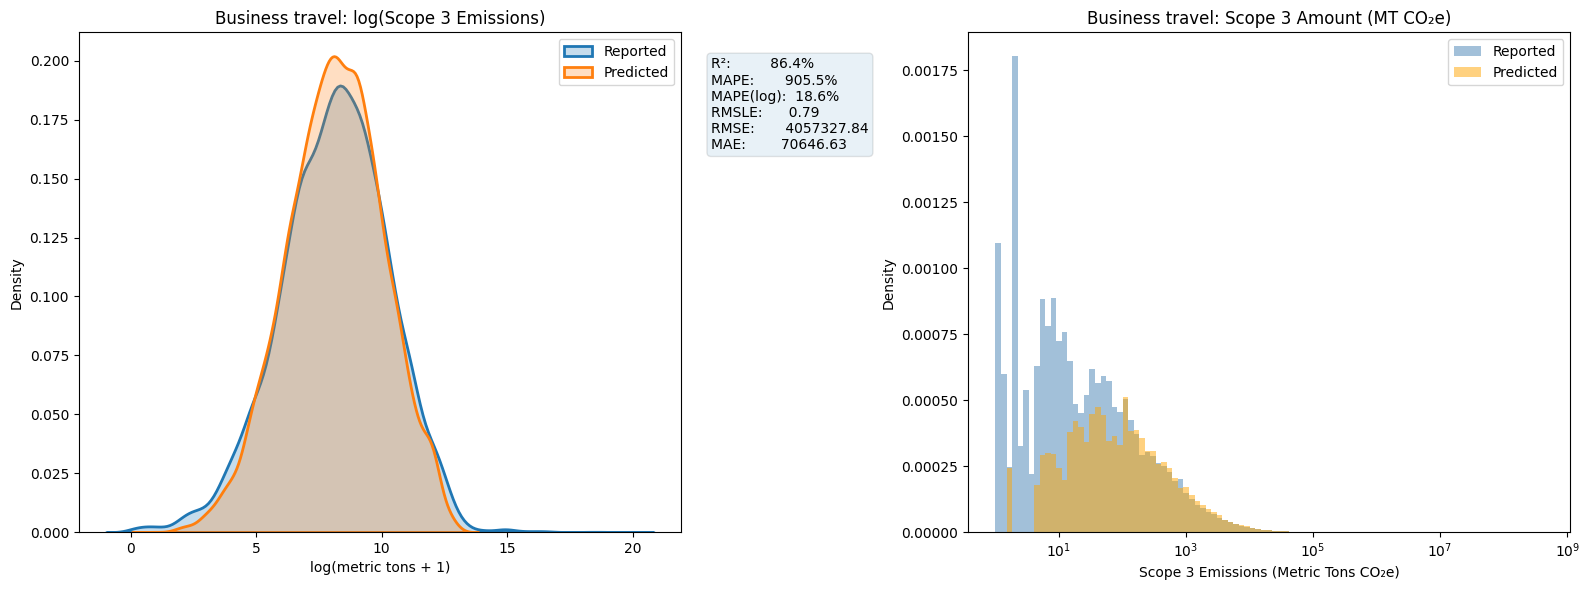

Converged using optimizer: lbfgs for group Capital goods
Variance across Primary_sector: 2.1718

Group: Capital goods --- Top 10 Influential Factors
                                  coef        pvalue
log_Scope_1_2_total_emission  0.358586  7.886684e-93
Company Var                   1.693055  1.815000e-84
C(Country)[T.South Korea]    -3.603484  5.317704e-23
log_Revenue_USD               0.291483  2.132260e-09
C(Country)[T.Hong Kong]      -5.085562  3.342092e-06
C(Year)[T.2019]               0.588672  8.441626e-06
C(Year)[T.2023]               0.554624  1.600088e-05
C(Year)[T.2020]               0.536952  4.110092e-05
log_totalAssets_USD           0.351327  4.616545e-05
C(Year)[T.2021]               0.508238  8.708919e-05


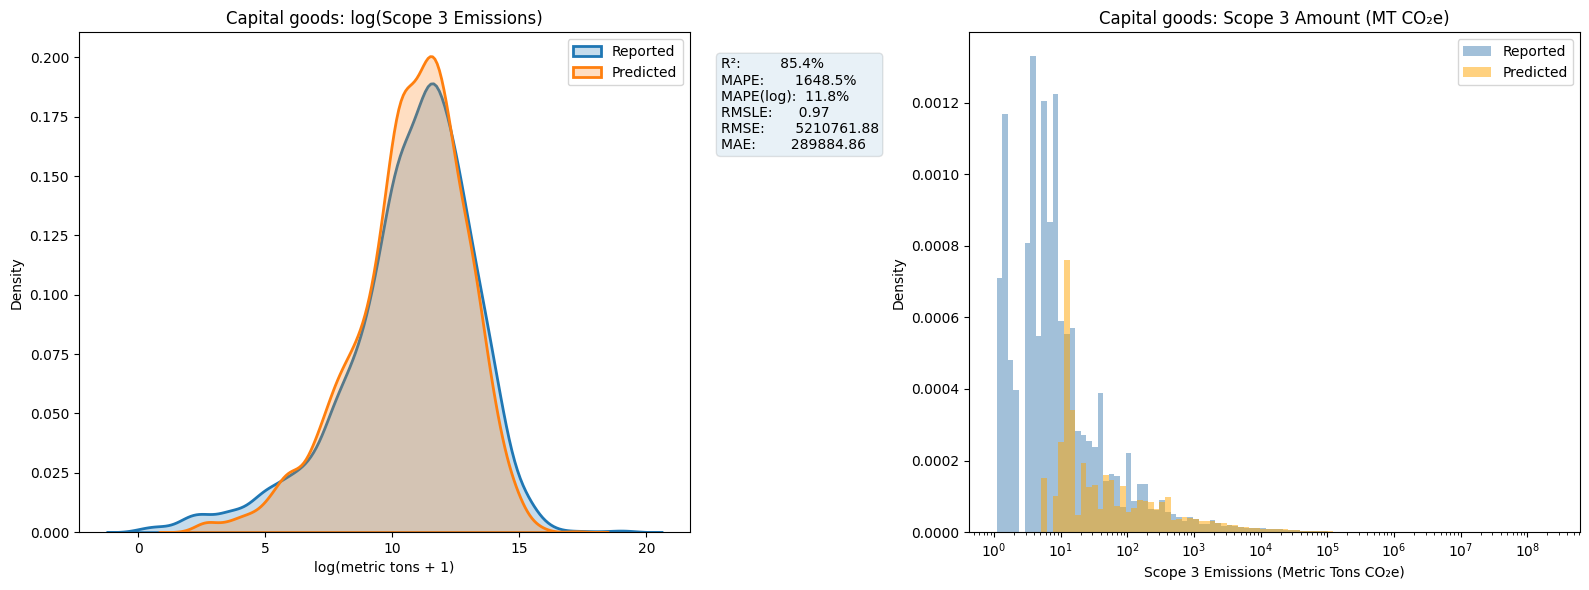

Converged using optimizer: lbfgs for group Downstream leased assets
Variance across Primary_sector: 5.8684

Group: Downstream leased assets --- Top 10 Influential Factors
                                  coef        pvalue
Company Var                   6.181375  7.802752e-43
log_Scope_1_2_total_emission  0.173325  1.586550e-06
log_Revenue_USD              -0.346803  1.476204e-04
log_totalDebt_USD             0.177550  8.136913e-04
C(Country)[T.Hong Kong]      -9.018924  9.395850e-04
log_totalAssets_USD           0.444511  4.114054e-03
C(Country)[T.South Korea]    -2.324356  4.570493e-03
C(Country)[T.Norway]         -3.272668  7.001668e-03
log_grossProfit_USD           0.034103  8.670650e-03
C(Country)[T.Switzerland]    -2.303504  1.267349e-02


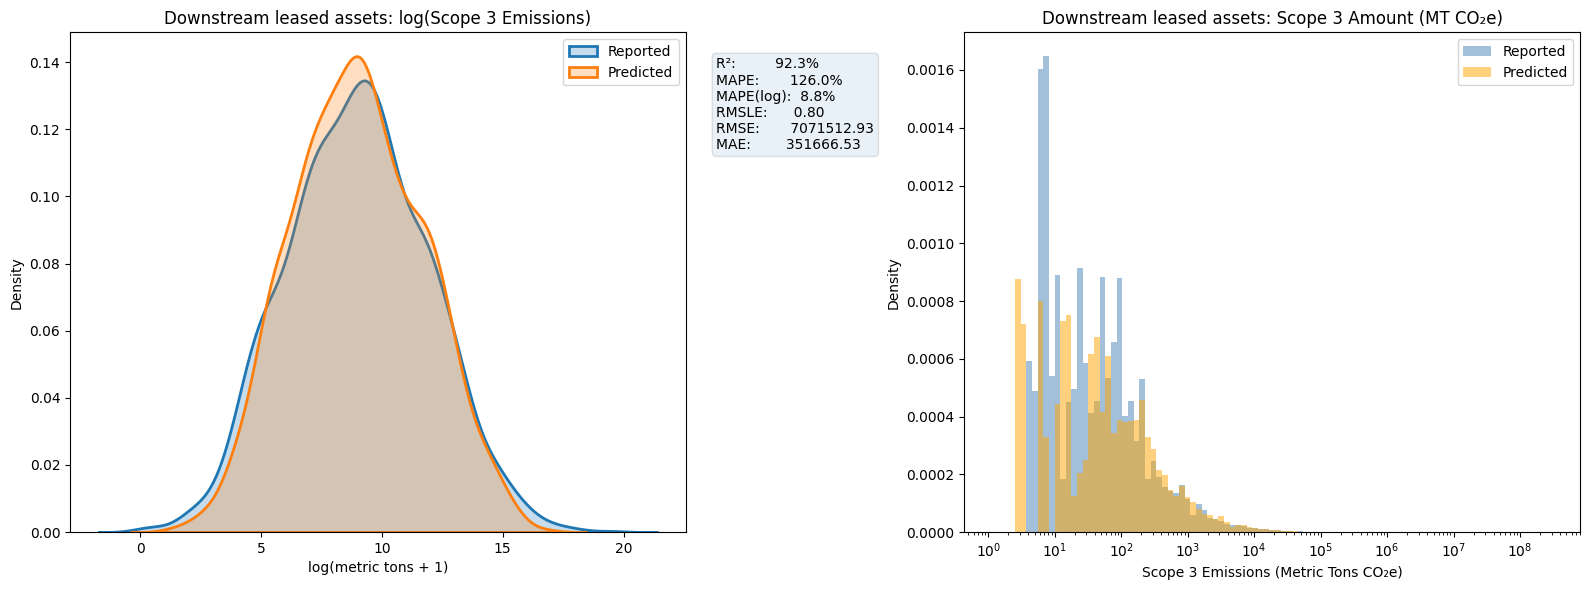

Converged using optimizer: lbfgs for group Downstream transportation and distribution
Variance across Primary_sector: 3.6406

Group: Downstream transportation and distribution --- Top 10 Influential Factors
                                  coef        pvalue
Company Var                   2.540157  8.917656e-83
log_Scope_1_2_total_emission  0.433579  2.209103e-74
log_Revenue_USD               0.657850  1.129868e-19
log_Market_Cap_USD            0.096645  1.003826e-02
log_totalAssets_USD          -0.316428  1.174229e-02
C(Country)[T.Turkey]         -6.143522  2.645461e-02
C(Year)[T.2020]               0.227626  4.984053e-02
C(Country)[T.Bermuda]        -4.844645  7.983270e-02
C(Country)[T.Hungary]        -4.244172  9.724286e-02
C(Year)[T.2018]               0.192843  1.068882e-01


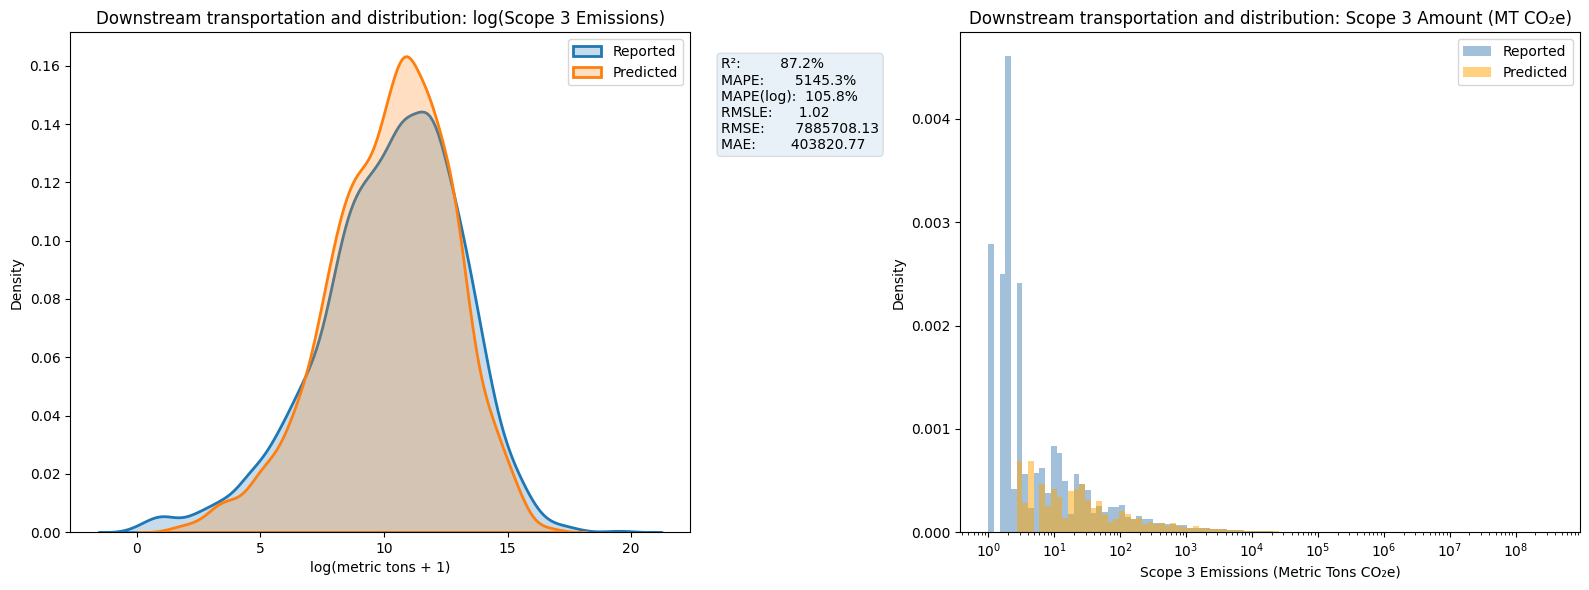

Converged using optimizer: lbfgs for group Employee commuting
Variance across Primary_sector: 1.8519

Group: Employee commuting --- Top 10 Influential Factors
                                    coef         pvalue
Company Var                     2.148486  3.023053e-130
log_Revenue_USD                 0.677112   7.129910e-93
log_Scope_1_2_total_emission    0.172983   1.739051e-48
log_cashAndCashEquivalents_USD  0.101793   8.964862e-07
C(Year)[T.2020]                 0.274552   1.418488e-04
log_totalAssets_USD            -0.210624   1.774571e-04
C(Year)[T.2023]                 0.254534   3.294796e-04
C(Year)[T.2019]                 0.211884   3.805902e-03
C(Year)[T.2018]                 0.190482   1.106407e-02
C(Country)[T.Hong Kong]        -3.408208   1.109250e-02


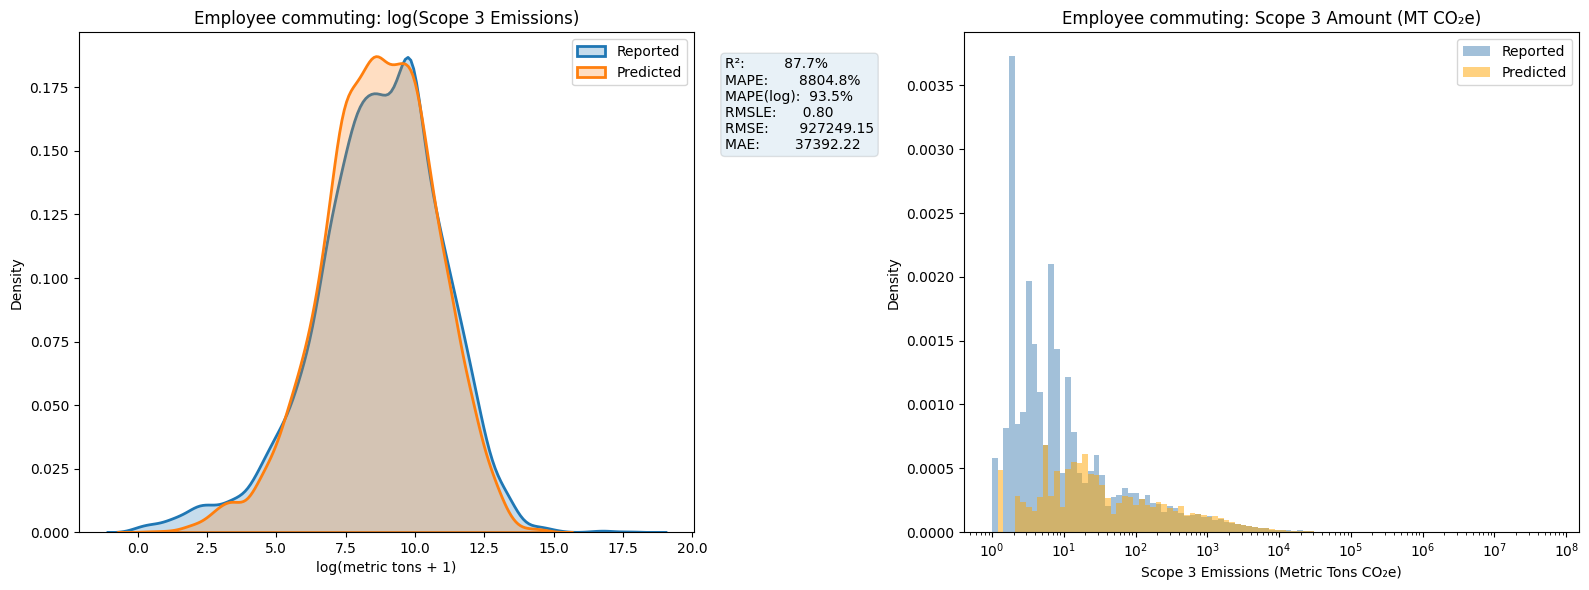

Converged using optimizer: lbfgs for group End of life treatment of sold products
Variance across Primary_sector: 5.7375

Group: End of life treatment of sold products --- Top 10 Influential Factors
                                  coef        pvalue
Company Var                   3.544386  1.181866e-71
log_Scope_1_2_total_emission  0.529848  2.076958e-57
log_Revenue_USD               1.092521  3.726184e-25
C(Year)[T.2023]               0.951305  1.902892e-09
C(Year)[T.2020]               0.889475  3.423526e-08
C(Year)[T.2022]               0.753027  1.872363e-06
C(Year)[T.2019]               0.721914  8.262476e-06
C(Year)[T.2021]               0.710259  8.429294e-06
C(Year)[T.2018]               0.720850  1.163308e-05
log_totalAssets_USD          -0.478445  1.407180e-03


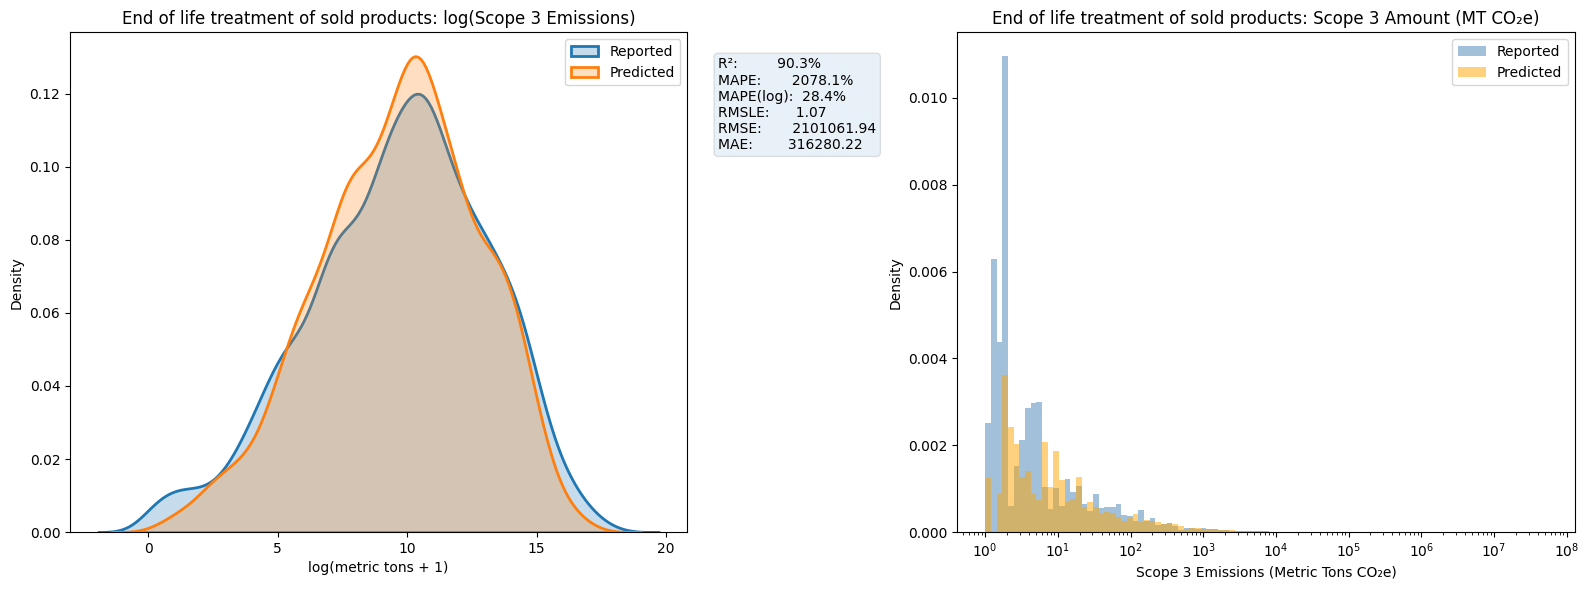

Converged using optimizer: lbfgs for group Franchises
Variance across Primary_sector: 5.1849

Group: Franchises --- Top 10 Influential Factors
                                    coef        pvalue
Company Var                     8.933490  8.578628e-16
log_Scope_1_2_total_emission    0.246478  3.318753e-04
C(Year)[T.2018]                 0.593368  1.644703e-02
log_totalEquity_USD            -0.012973  7.446377e-02
log_Market_Cap_USD             -0.137087  1.129014e-01
C(Year)[T.2023]                 0.381535  1.158342e-01
C(Year)[T.2017]                 0.374087  1.168508e-01
log_cashAndCashEquivalents_USD  0.119616  1.255369e-01
C(Year)[T.2020]                 0.363218  1.423468e-01
log_ebitda_USD                 -0.011553  1.431727e-01


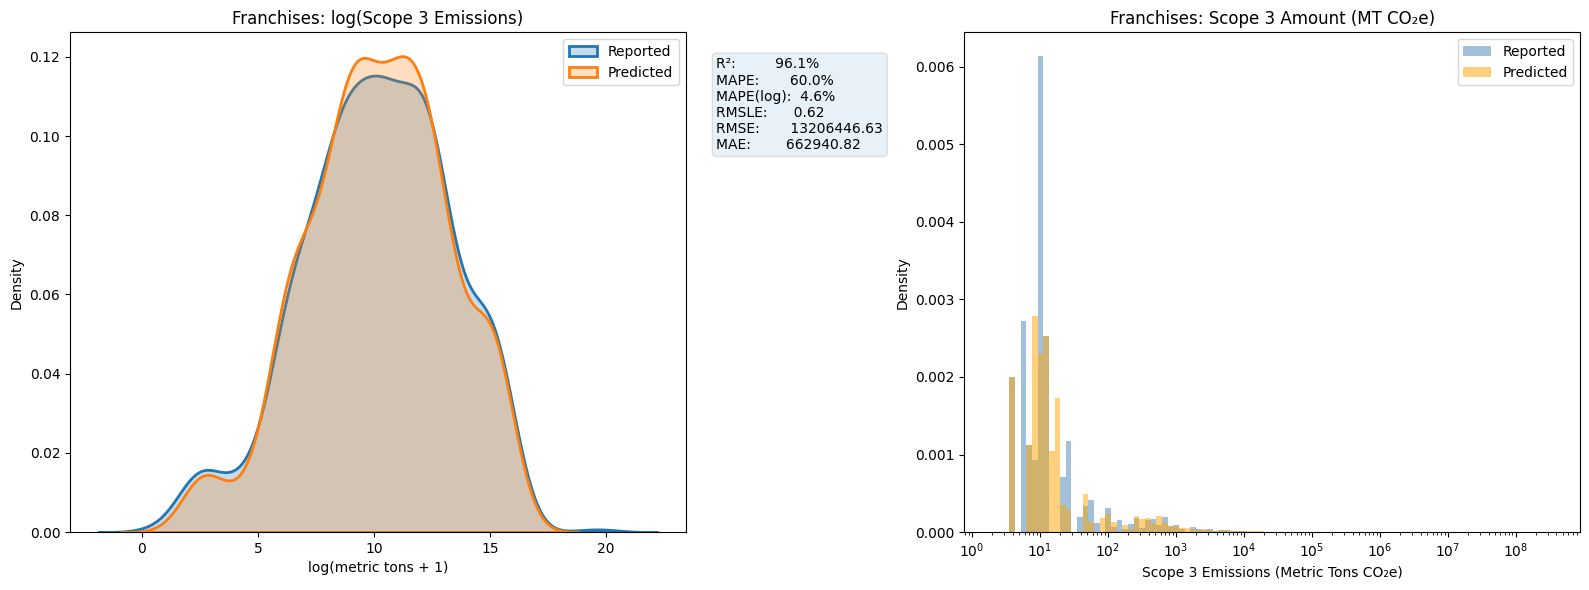

Converged using optimizer: lbfgs for group Fuel-and-energy-related activities (not included in Scope 1 or 2)
Variance across Primary_sector: 1.3729

Group: Fuel-and-energy-related activities (not included in Scope 1 or 2) --- Top 10 Influential Factors
                                  coef         pvalue
log_Scope_1_2_total_emission  0.742448   0.000000e+00
Company Var                   1.315581  9.130078e-109
C(Year)[T.2023]               0.861802   2.725637e-27
C(Year)[T.2022]               0.768763   4.843216e-22
C(Year)[T.2021]               0.709111   1.065409e-18
C(Year)[T.2020]               0.676499   7.247205e-17
log_Revenue_USD               0.263065   9.325162e-17
C(Year)[T.2019]               0.618318   4.481811e-14
C(Year)[T.2018]               0.616942   1.747077e-13
log_grossProfit_USD          -0.018792   5.564573e-06


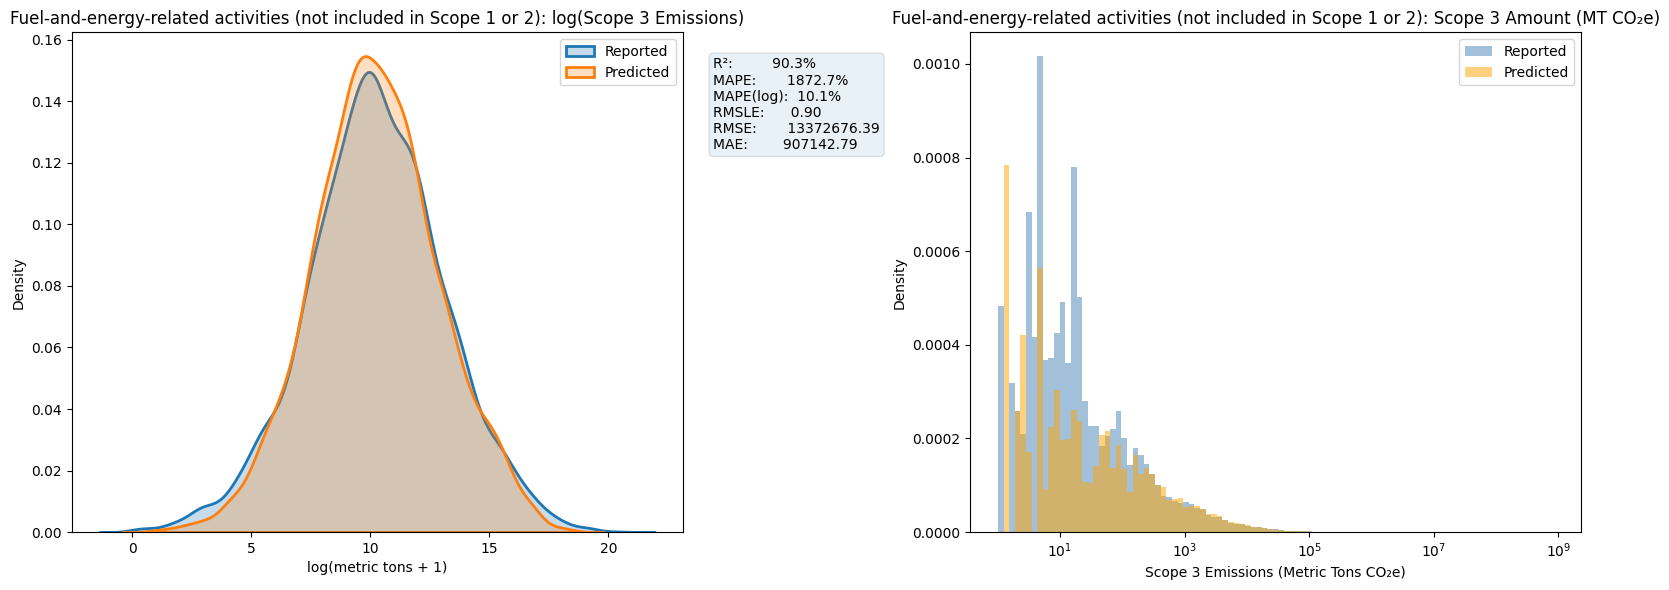

Converged using optimizer: lbfgs for group Investments
Variance across Primary_sector: 5.4821

Group: Investments --- Top 10 Influential Factors
                                  coef        pvalue
Company Var                   3.676721  5.866131e-37
log_Scope_1_2_total_emission  0.343557  2.010275e-19
log_totalInvestments_USD      0.266206  3.253600e-04
log_Market_Cap_USD           -0.182141  8.340508e-03
log_Revenue_USD               0.251667  3.142354e-02
C(Country)[T.New Zealand]    -2.000510  3.659608e-02
log_totalAssets_USD           0.383488  5.543359e-02
C(Country)[T.South Africa]    1.520698  6.490140e-02
C(Country)[T.Sweden]         -1.694781  6.856705e-02
C(Country)[T.Thailand]        1.654968  9.102085e-02


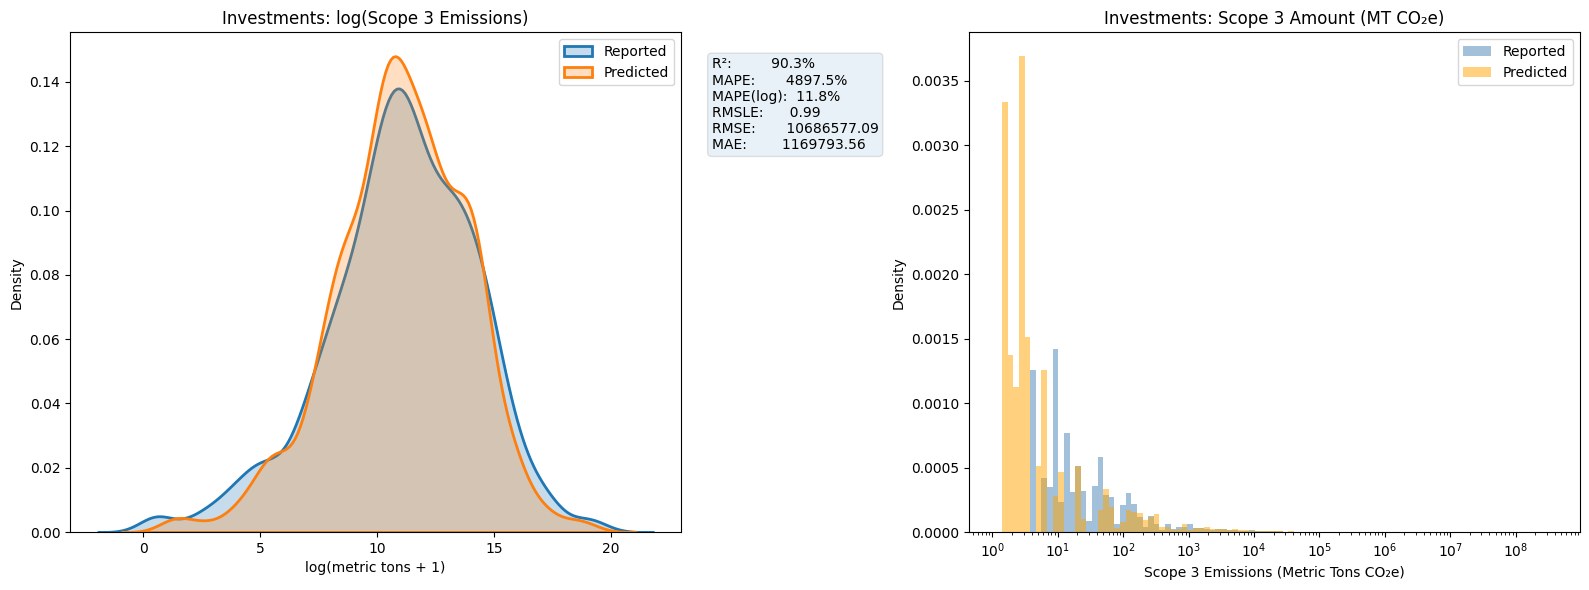

Converged using optimizer: lbfgs for group Other (downstream)
Variance across Primary_sector: 9.5036

Group: Other (downstream) --- Top 10 Influential Factors
                                coef        pvalue
Company Var                21.380938  5.094725e-10
C(Country)[T.Spain]         7.725802  5.759196e-04
C(Country)[T.Denmark]       8.706341  7.687193e-04
C(Country)[T.France]        4.757393  1.010843e-03
C(Country)[T.Sweden]        7.998391  2.095180e-03
C(Country)[T.South Korea]   5.242857  4.672993e-03
C(Year)[T.2018]             0.660749  9.335745e-03
C(Country)[T.Turkey]        6.866034  1.041762e-02
C(Year)[T.2015]             0.558474  1.622197e-02
C(Country)[T.Canada]        3.963370  2.156303e-02


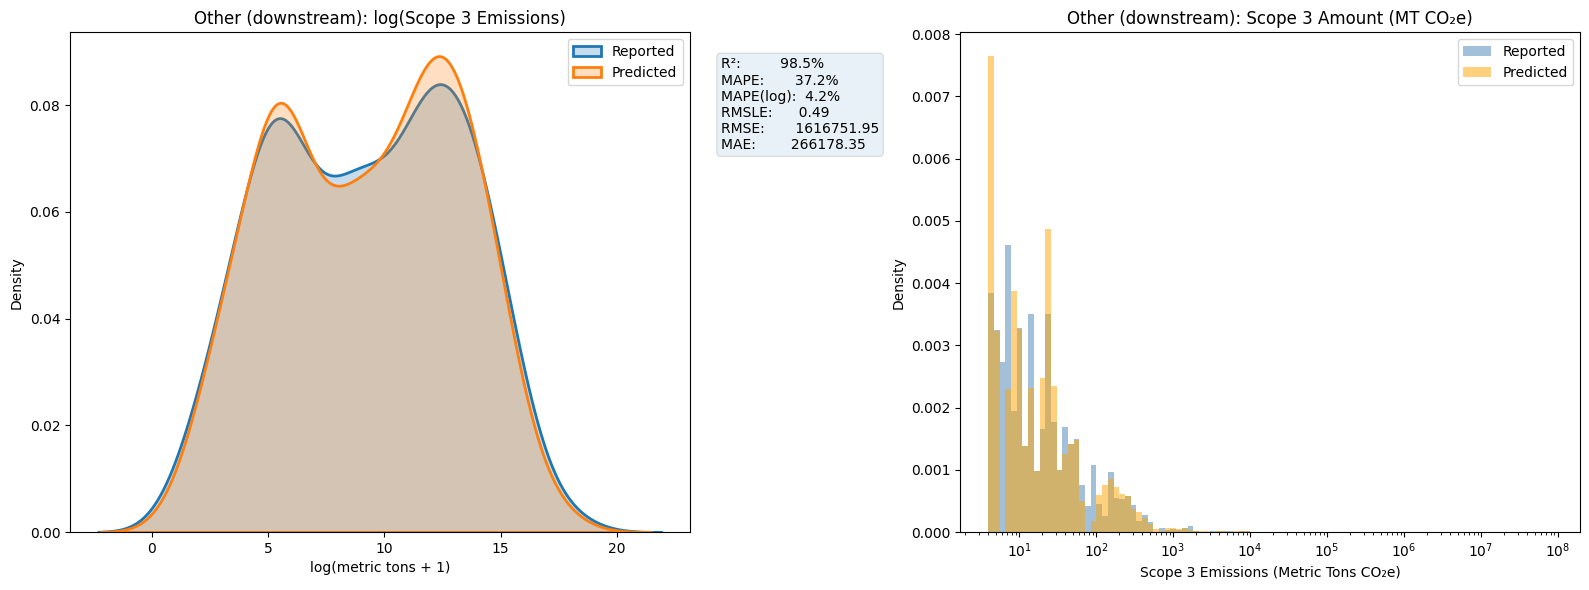

Converged using optimizer: lbfgs for group Other (upstream)
Variance across Primary_sector: 7.0298

Group: Other (upstream) --- Top 10 Influential Factors
                                  coef        pvalue
log_Scope_1_2_total_emission  0.567965  1.134582e-11
Company Var                   5.625029  2.506718e-11
C(Country)[T.Netherlands]     5.171050  1.554731e-03
C(Year)[T.2014]              -0.723540  1.281125e-02
log_totalDebt_USD             0.221224  3.325434e-02
C(Country)[T.New Zealand]     6.123816  3.522195e-02
C(Country)[T.Germany]         2.360363  6.045570e-02
log_Market_Cap_USD            0.261992  6.466831e-02
C(Country)[T.USA]             1.687008  7.013945e-02
C(Country)[T.France]          1.647908  7.768269e-02


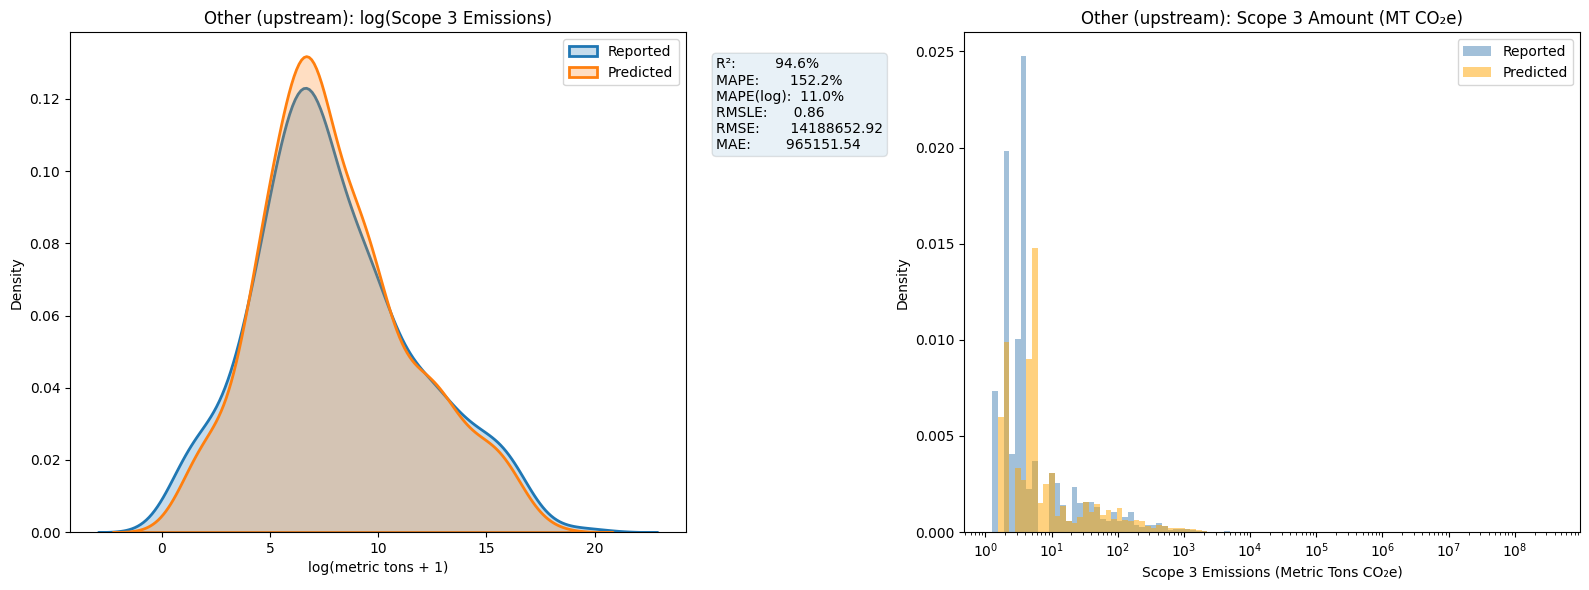

Converged using optimizer: lbfgs for group Processing of sold products
Variance across Primary_sector: 7.6000

Group: Processing of sold products --- Top 10 Influential Factors
                                    coef        pvalue
Company Var                     5.714759  3.217042e-28
log_Scope_1_2_total_emission    0.693054  5.704818e-25
C(Year)[T.2020]                 0.918129  5.920675e-04
C(Year)[T.2021]                 0.882788  8.592247e-04
C(Year)[T.2019]                 0.793584  2.883399e-03
log_cashAndCashEquivalents_USD -0.239185  5.341731e-03
C(Year)[T.2018]                 0.750228  5.592332e-03
C(Year)[T.2022]                 0.694642  7.920197e-03
C(Year)[T.2015]                 0.718824  1.057121e-02
C(Country)[T.Japan]            -1.923171  1.275433e-02


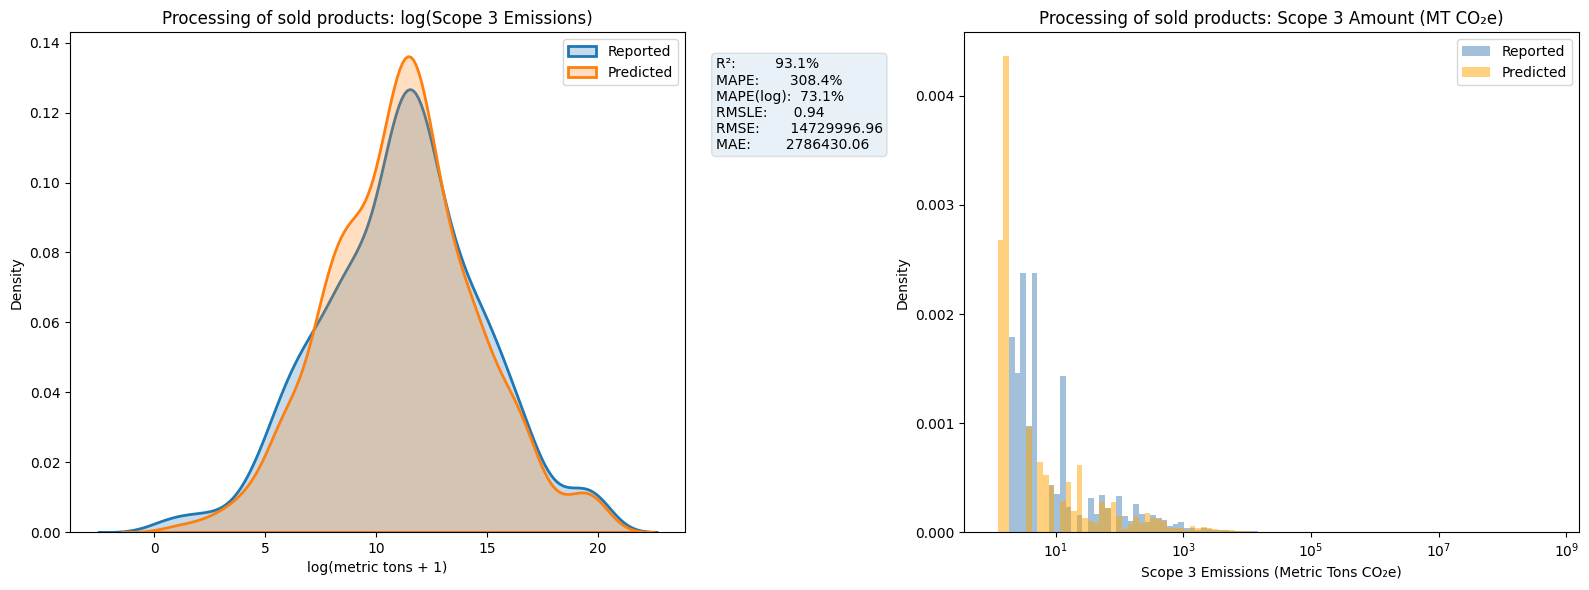

Converged using optimizer: lbfgs for group Purchased goods and services
Variance across Primary_sector: 4.1617

Group: Purchased goods and services --- Top 10 Influential Factors
                                  coef         pvalue
log_Scope_1_2_total_emission  0.449551  7.775977e-160
Company Var                   2.527917  2.873642e-145
log_Revenue_USD               0.983236   1.441725e-97
C(Year)[T.2023]               1.316212   2.361302e-44
C(Year)[T.2022]               1.133235   1.266741e-33
C(Year)[T.2021]               0.971626   9.670314e-25
C(Year)[T.2020]               0.943208   5.205639e-23
log_totalAssets_USD          -0.618838   7.940897e-17
C(Year)[T.2019]               0.766365   1.795301e-15
C(Year)[T.2018]               0.740821   4.492887e-14


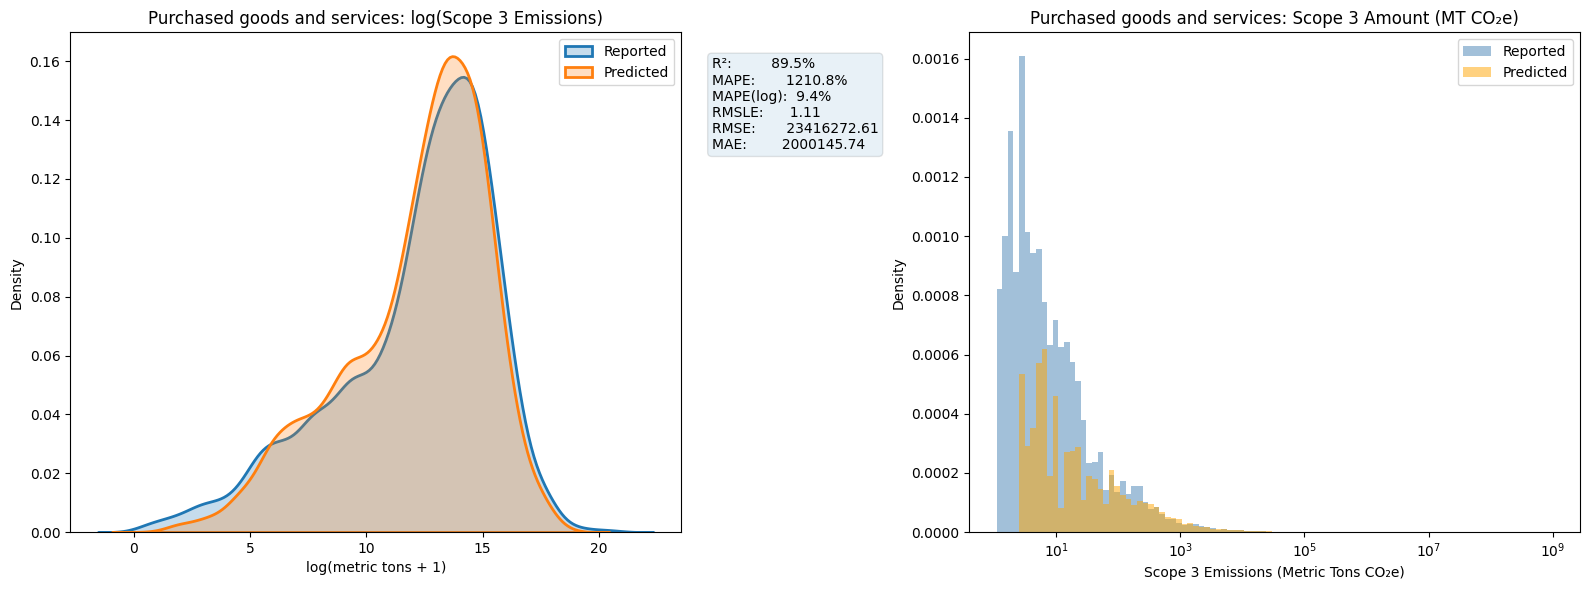

Converged using optimizer: lbfgs for group Upstream leased assets
Variance across Primary_sector: 3.7486

Group: Upstream leased assets --- Top 10 Influential Factors
                                  coef        pvalue
Company Var                   2.888075  2.761287e-37
log_Revenue_USD               0.611804  5.893051e-11
C(Country)[T.South Korea]    -2.589211  6.337833e-06
C(Country)[T.Japan]          -1.930813  1.061090e-04
log_Scope_1_2_total_emission  0.112638  3.858917e-04
C(Year)[T.2022]              -0.587338  8.335424e-04
C(Country)[T.Taiwan]         -2.027212  1.003174e-03
C(Country)[T.Bermuda]         6.599139  2.144519e-03
C(Country)[T.Norway]         -2.947113  3.667029e-03
C(Country)[T.Canada]         -1.725014  4.018447e-03


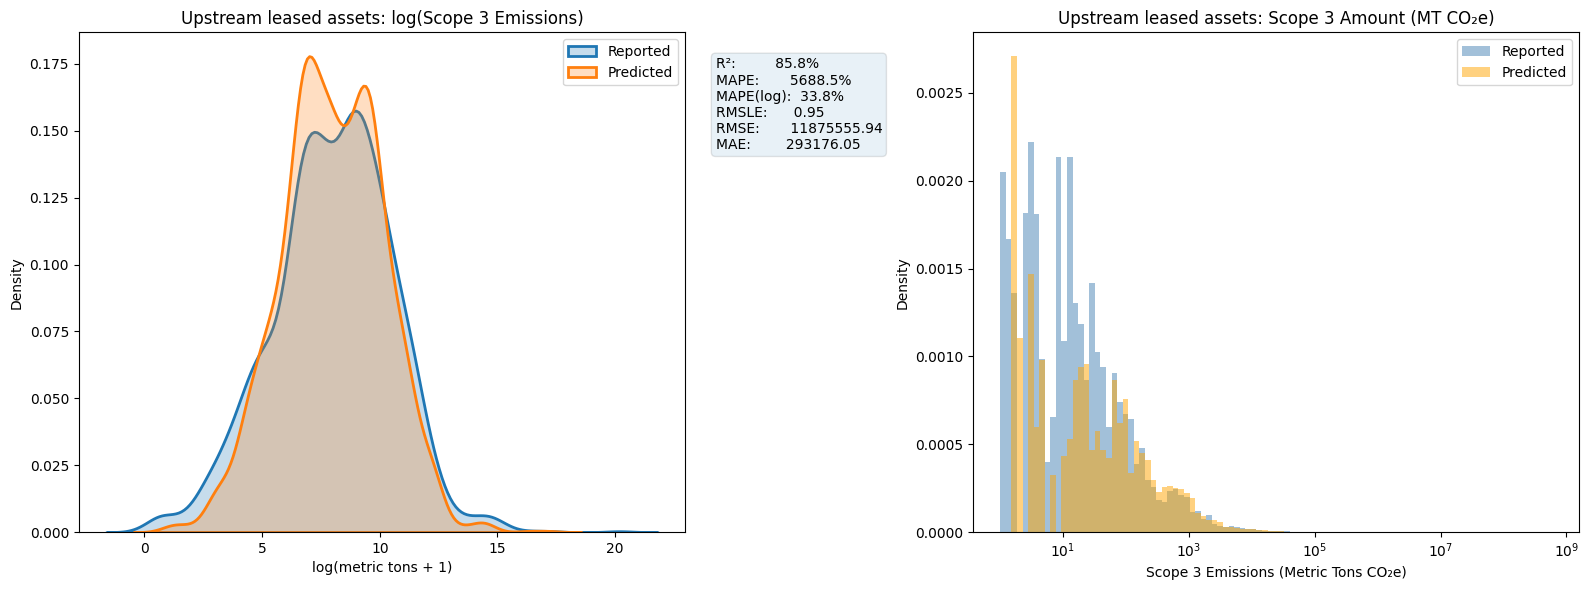

Converged using optimizer: lbfgs for group Upstream transportation and distribution
Variance across Primary_sector: 3.3626

Group: Upstream transportation and distribution --- Top 10 Influential Factors
                                  coef         pvalue
log_Scope_1_2_total_emission  0.413179  1.416358e-122
Company Var                   2.732086  1.088933e-115
log_Revenue_USD               0.956618   2.359935e-80
C(Year)[T.2023]               0.790635   9.494051e-18
C(Year)[T.2022]               0.588495   1.470390e-10
C(Year)[T.2020]               0.542196   6.786554e-09
log_totalAssets_USD          -0.480224   1.923127e-08
C(Year)[T.2021]               0.476004   2.816139e-07
C(Year)[T.2019]               0.430322   5.221160e-06
C(Year)[T.2018]               0.366158   1.481515e-04


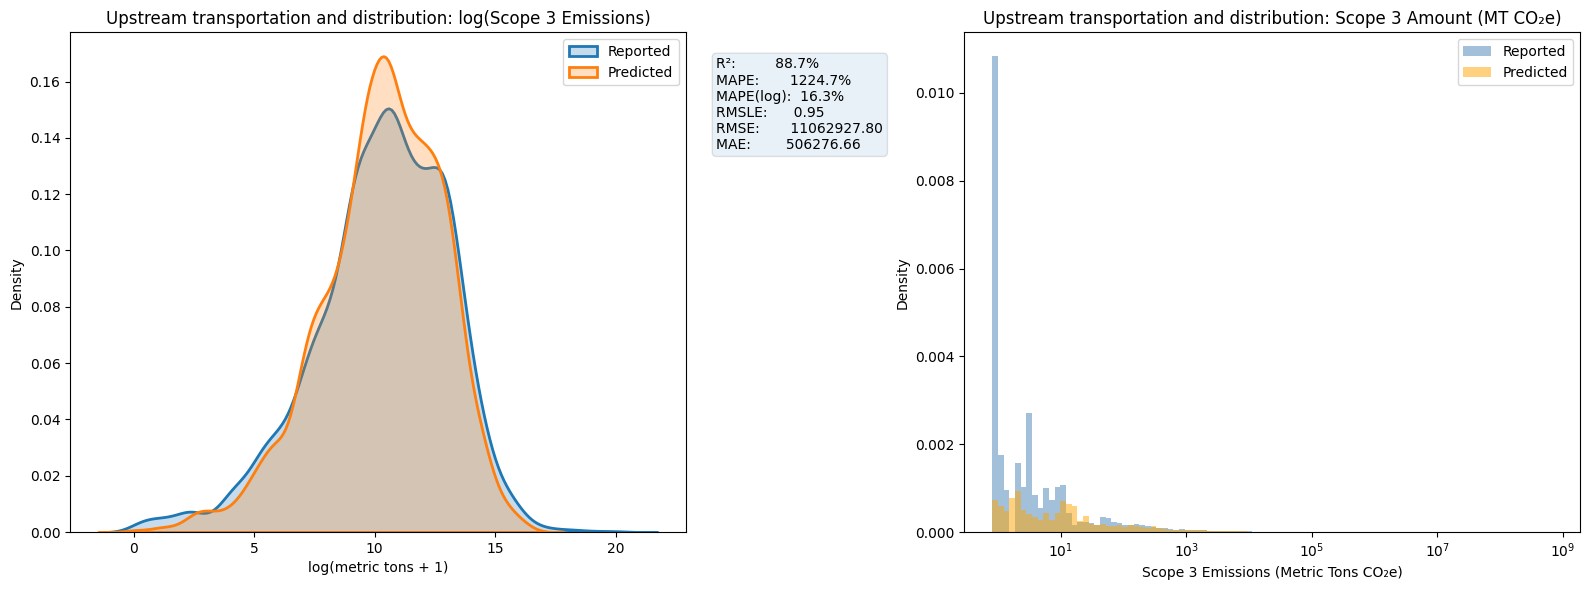

Converged using optimizer: lbfgs for group Use of sold products
Variance across Primary_sector: 8.2999

Group: Use of sold products --- Top 10 Influential Factors
                                  coef        pvalue
Company Var                   7.909400  4.056828e-92
log_Scope_1_2_total_emission  0.388735  1.068662e-41
log_Revenue_USD               0.911833  3.327544e-26
C(Year)[T.2023]               0.694812  8.301751e-11
C(Year)[T.2020]               0.653160  1.136205e-09
C(Year)[T.2021]               0.622764  4.566554e-09
C(Year)[T.2022]               0.618242  4.785339e-09
C(Year)[T.2019]               0.600475  2.131251e-08
C(Year)[T.2018]               0.532288  1.283796e-06
C(Year)[T.2015]               0.399674  4.018665e-04


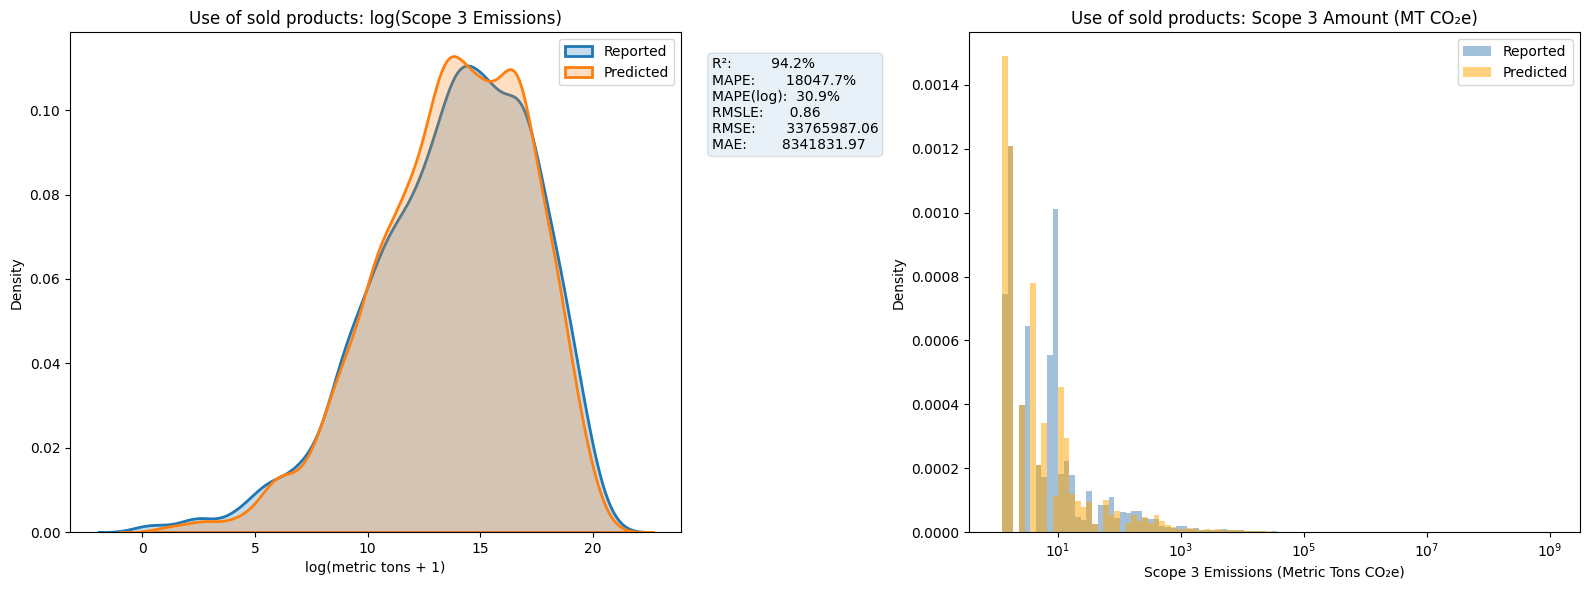

Converged using optimizer: lbfgs for group Waste generated in operations
Variance across Primary_sector: 2.6992

Group: Waste generated in operations --- Top 10 Influential Factors
                                  coef         pvalue
log_Scope_1_2_total_emission  0.477557  8.426442e-255
Company Var                   2.313956  7.930046e-136
log_Revenue_USD               0.469182   5.801300e-36
C(Year)[T.2020]               0.420593   3.524813e-07
C(Year)[T.2023]               0.400660   8.600808e-07
C(Year)[T.2019]               0.384800   3.870266e-06
C(Year)[T.2018]               0.352310   3.759748e-05
log_totalDebt_USD             0.091784   1.130481e-04
C(Year)[T.2022]               0.299045   2.232603e-04
log_totalAssets_USD          -0.199493   1.569477e-03


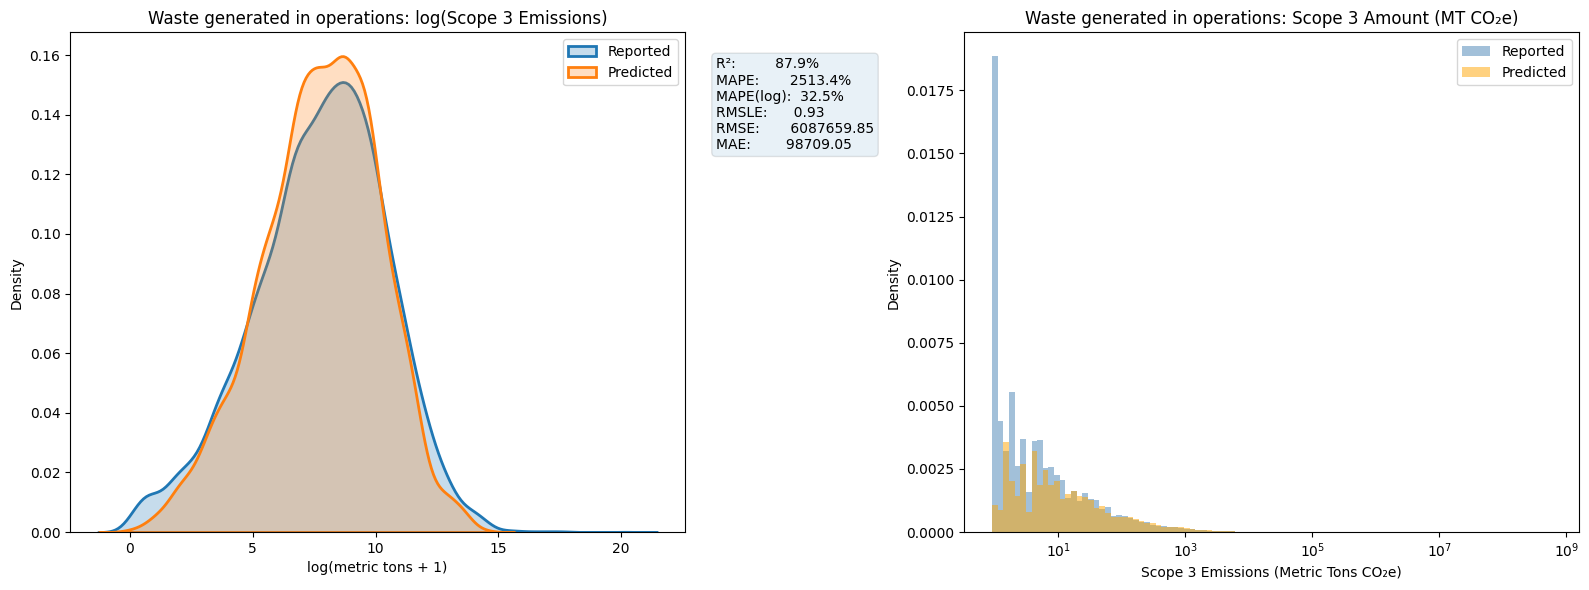


Summary of Model Performance Metrics by Scope-3 Source:



R²(log)%  \
financial_feature_stats                                                 NaN   
Business travel                                                        86.4   
Capital goods                                                          85.4   
Downstream leased assets                                               92.3   
Downstream transportation and distribution                             87.2   
Employee commuting                                                     87.7   
End of life treatment of sold products                                 90.3   
Franchises                                                             96.1   
Fuel-and-energy-related activities (not included in Scope 1 or 2)      90.3   
Investments                                                            90.3   
Other (downstream)                                                     98.5   
Other (upstream)                                                       94.6   
Processing of sold products                                            93.1   
Purchased goods and services                                           89.5   
Upstream leased assets                                                 85.8   
Upstream transportation and distribution                               88.7   
Use of sold products                                                   94.2   
Waste generated in operations                                          87.9   

                                                                   MAPE_orig%  \
financial_feature_stats                                                   NaN   
Business travel                                                         905.5   
Capital goods                                                          1648.5   
Downstream leased assets                                                126.0   
Downstream transportation and distribution                             5145.3   
Employee commuting                                                     8804.8   
End of life treatment of sold products                                 2078.1   
Franchises                                                               60.0   
Fuel-and-energy-related activities (not included in Scope 1 or 2)      1872.7   
Investments                                                            4897.5   
Other (downstream)                                                       37.2   
Other (upstream)                                                        152.2   
Processing of sold products                                             308.4   
Purchased goods and services                                           1210.8   
Upstream leased assets                                                 5688.5   
Upstream transportation and distribution                               1224.7   
Use of sold products                                                  18047.7   
Waste generated in operations                                          2513.4   

                                                                   MAPE_log%  \
financial_feature_stats                                                  NaN   
Business travel                                                         18.6   
Capital goods                                                           11.8   
Downstream leased assets                                                 8.8   
Downstream transportation and distribution                             105.8   
Employee commuting                                                      93.5   
End of life treatment of sold products                                  28.4   
Franchises                                                               4.6   
Fuel-and-energy-related activities (not included in Scope 1 or 2)       10.1   
Investments                                                             11.8   
Other (downstream)                                                       4.2   
Other (upstream)                                                 

In [17]:
#Code Reference: https://www.pythonfordatascience.org/mixed-effects-regression-python/

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Remove zero values BEFORE log transformation and create a log target column.
prepped_df = prepped_df[prepped_df["Scope 3 Amount"] > 0].copy()
prepped_df["log_Scope_3_Amount"] = np.log1p(prepped_df["Scope 3 Amount"])

# Then group by "Scope 3 Sources" to create the dictionary of dataframes.
grouped_dfs = {
    group_name: group_df.copy()
    for group_name, group_df in prepped_df.groupby('Scope 3 Sources')
}

# Define the list of continuous variables.
numeric_cols = ['Scope 3 Amount', 'Revenue_USD', 'Market_Cap_USD', 
                'ebitda_USD', 'grossProfit_USD', 'netIncome_USD', 'cashAndCashEquivalents_USD', 
                'longTermInvestments_USD', 'totalAssets_USD', 'totalLiabilities_USD', 
                'totalInvestments_USD', 'totalDebt_USD', 'totalEquity_USD', 'Scope_1_2_total_emission']

# Signed log transformation function.
def signed_log(x):
    return np.sign(x) * np.log(np.abs(x) + 1)

# Dictionary to collect metrics for each group.
metrics_results = {}

feature_pvals = {}
feature_coefs = {}

# Only the “financial” predictors from numeric_cols (exclude Scope 3 Amount and country averages)
#this was adapted from previous code so now includes Scope 1_2 which isn't financial data
fin_cols = [col for col in numeric_cols 
            if col not in ('Scope 3 Amount')]

# Build the list of model feature names
all_feats = [f'log_{col.replace(" ", "_").replace("/", "_")}' for col in fin_cols]


# Loop over each group in the dictionary.
for group_name, df in grouped_dfs.items():
    for col in numeric_cols:
        new_col = f'log_{col.replace(" ", "_").replace("/", "_")}'
        df[new_col] = df[col].apply(signed_log)

    df['Year'] = df['Year of Data'].astype(str)
    df['Scope3_Source'] = df['Scope 3 Sources'].astype(str)
    df['Country'] = df['Countries'].astype(str)
    df['Company'] = df['Company Name'].astype(str)
    
    df['ThirdParty_Verification'] = df['Third_Party_Verification'].astype(str)
    df['Primary_activity'] = df['Primary activity'].astype(str)
    df['Primary_sector'] = df['Primary sector'].astype(str)

        # Drop rows with NA after transformations
    df = df.dropna(subset=[  # Include all needed predictors here
        'log_Revenue_USD', 'log_Market_Cap_USD', 'log_ebitda_USD', 
        'log_grossProfit_USD', 'log_netIncome_USD', 'log_cashAndCashEquivalents_USD',
        'log_longTermInvestments_USD', 'log_totalAssets_USD', 'log_totalLiabilities_USD',
        'log_totalInvestments_USD', 'log_totalDebt_USD', 'log_totalEquity_USD',
        'log_Scope_3_Amount', 'log_Scope_1_2_total_emission'
    ]).copy()


    formula = (
        "log_Scope_3_Amount ~ log_Revenue_USD + "
        "log_Market_Cap_USD + log_ebitda_USD + log_grossProfit_USD + log_netIncome_USD + "
        "log_cashAndCashEquivalents_USD + log_longTermInvestments_USD + log_totalAssets_USD + "
        "log_totalLiabilities_USD + log_totalInvestments_USD + log_totalDebt_USD + log_totalEquity_USD + log_Scope_1_2_total_emission + "
        "C(Year) + C(Country)"  
    )

    model = smf.mixedlm(formula, df, groups=df["Primary_sector"],
                        vc_formula={"Company": "0 + C(Company)"})

    
    result = None



    # Try multiple optimizers
    optimizers = ['lbfgs', 'cg', 'bfgs', 'nm']
    for opt in optimizers:
        try:
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore")
                result = model.fit(method=opt, reml=False)
            if result.converged:
                print(f"Converged using optimizer: {opt} for group {group_name}")
                break
        except Exception as e:
            print(f"Failed with optimizer {opt} for group {group_name}: {e}")

    if result is None or not result.converged:
        print(f"Model did not converge for group {group_name}.")
        continue
    # Store p-values and coefficients
    coef_df = pd.DataFrame({
        'coef': result.params,
        'pvalue': result.pvalues
    })

        # Extract p-values and coefficients for each feature
    pvals = {feat: result.pvalues.get(feat, np.nan) for feat in all_feats}
    coefs = {feat: result.params.get(feat, np.nan)  for feat in all_feats}
    
    feature_pvals[group_name] = pvals
    feature_coefs[group_name] = coefs
    # Remove intercept for ranking
    if "Intercept" in coef_df.index:
        coef_df = coef_df.drop(index="Intercept")

    # Collect only financial feature results
    financial_vars = [f'log_{col.replace(" ", "_").replace("/", "_")}' for col in numeric_cols if 'Scope' not in col]
    financial_pvals = coef_df.loc[coef_df.index.isin(financial_vars)][['coef', 'pvalue']]

    # Store in dictionary
    if 'financial_feature_stats' not in metrics_results:
        metrics_results['financial_feature_stats'] = {}

    for var in financial_pvals.index:
        if var not in metrics_results['financial_feature_stats']:
            metrics_results['financial_feature_stats'][var] = []
        metrics_results['financial_feature_stats'][var].append({
            'group': group_name,
            'coef': financial_pvals.loc[var, 'coef'],
            'pvalue': financial_pvals.loc[var, 'pvalue']
        })

    # Print the top 10 most influential overall (based on p-value)
    coef_df = coef_df.sort_values(by='pvalue')
    top10 = coef_df.head(10)


    try:
        group_var = result.vcomp[0]  # Primary_sector
        company_var = result.vcomp[1] if len(result.vcomp) > 1 else np.nan
        residual_var = result.vcomp[-1]
        print(f"Variance across Primary_sector: {group_var:.4f}")

    except Exception as e:
        print(f"Could not extract variance components for group {group_name}: {e}")

    print(f"\nGroup: {group_name} --- Top 10 Influential Factors")
    print(top10)

    df['Predicted_log_Scope_3'] = result.fittedvalues
    df['Reported_log_Scope_3'] = df["log_Scope_3_Amount"]
    df['Predicted_Scope_3'] = np.expm1(df['Predicted_log_Scope_3'])
    df['Reported_Scope_3'] = np.expm1(df['Reported_log_Scope_3'])

    
    # ── METRICS ──────────────────────────────────────────────────────────────
    y_true_mt = df['Reported_Scope_3']
    y_pred_mt = df['Predicted_Scope_3']
    
    r2_pct      = r2_score(df['Reported_log_Scope_3'], df['Predicted_log_Scope_3']) * 100        # %
    mape_log    = np.mean(np.abs((df['Reported_log_Scope_3'] - df['Predicted_log_Scope_3'])
                                 / df['Reported_log_Scope_3'])) * 100                            # %
    mape_orig   = np.mean(np.abs((y_true_mt - y_pred_mt) / y_true_mt)) * 100                     # %
    y_true_mt_clip = np.clip(y_true_mt, a_min=0, a_max=None)
    y_pred_mt_clip = np.clip(y_pred_mt, a_min=0, a_max=None)
    rmsle = np.sqrt(mean_squared_log_error(y_true_mt_clip, y_pred_mt_clip))

    rmse_orig   = np.sqrt(mean_squared_error(y_true_mt, y_pred_mt))                              # 2-dec
    mae_orig    = mean_absolute_error(y_true_mt, y_pred_mt)                                      # 2-dec

    # store for summary
    metrics_results[group_name] = {
        "R²(log)%":   f"{r2_pct:.1f}",
        "MAPE_orig%": f"{mape_orig:.1f}",
        "MAPE_log%":  f"{mape_log:.1f}",
        "RMSLE":      f"{rmsle:.2f}",
        "RMSE_orig":  f"{rmse_orig:.2f}",
        "MAE_orig":   f"{mae_orig:.2f}",
    }
    


    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.kdeplot(df['Reported_log_Scope_3'], label='Reported', linewidth=2, fill=True, ax=axes[0])
    sns.kdeplot(df['Predicted_log_Scope_3'], label='Predicted', linewidth=2, fill=True, ax=axes[0])
    axes[0].set_title(f"{group_name}: log(Scope 3 Emissions)")
    axes[0].set_xlabel("log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()

    metrics_text = (
        f"R²:         {r2_pct:.1f}%\n"
        f"MAPE:       {mape_orig:.1f}%\n"
        f"MAPE(log):  {mape_log:.1f}%\n"
        f"RMSLE:      {rmsle:.2f}\n"
        f"RMSE:       {rmse_orig:.2f}\n"
        f"MAE:        {mae_orig:.2f}"
    )

    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=10, bbox=dict(boxstyle='round', alpha=0.1))

    y_test_exp = df['Reported_Scope_3']
    y_pred_exp = df['Predicted_Scope_3']
    min_val = min(y_test_exp.min(), y_pred_exp.min())
    max_val = max(y_test_exp.max(), y_pred_exp.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)

    sns.histplot(y_test_exp, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported", ax=axes[1])
    sns.histplot(y_pred_exp, bins=log_bins, stat="density", color="orange", alpha=0.5, label="Predicted", ax=axes[1])
    axes[1].set_xscale("log")
    axes[1].set_title(f"{group_name}: Scope 3 Amount (MT CO₂e)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()

    plt.tight_layout()
    plt.show()





# Convert to DataFrames
pvals_df = pd.DataFrame(feature_pvals)
coefs_df = pd.DataFrame(feature_coefs)

# Convert the nested metrics_results dictionary to a DataFrame
metrics_df = pd.DataFrame.from_dict(metrics_results, orient='index')

# Optionally, sort the index for readability
metrics_df = metrics_df.sort_index()

# drop the 'financial_feature_stats' row if it exists
metrics_df = metrics_df.drop(index='financial_feature_stats', errors='ignore')


# Display the full table of metrics
import pandas as pd
from IPython.display import display


summary_cols = ["R²(log)%","MAPE_orig%","MAPE_log%","RMSLE","RMSE_orig","MAE_orig"]
print("\nSummary of Model Performance Metrics by Scope-3 Source:\n")
display(pd.DataFrame(metrics_results).T[summary_cols].astype(float).round(2))
ghg_df = metrics_df[summary_cols].copy()

In [19]:
ghg_df.to_csv(
    r"C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\ghg_HLM.csv"
)

In [22]:
ghg_df.head(20)

R²(log)%  \
Business travel                                                       86.4   
Capital goods                                                         85.4   
Downstream leased assets                                              92.3   
Downstream transportation and distribution                            87.2   
Employee commuting                                                    87.7   
End of life treatment of sold products                                90.3   
Franchises                                                            96.1   
Fuel-and-energy-related activities (not included in Scope 1 or 2)     90.3   
Investments                                                           90.3   
Other (downstream)                                                    98.5   
Other (upstream)                                                      94.6   
Processing of sold products                                           93.1   
Purchased goods and services                                          89.5   
Upstream leased assets                                                85.8   
Upstream transportation and distribution                              88.7   
Use of sold products                                                  94.2   
Waste generated in operations                                         87.9   

                                                                  MAPE_orig%  \
Business travel                                                        905.5   
Capital goods                                                         1648.5   
Downstream leased assets                                               126.0   
Downstream transportation and distribution                            5145.3   
Employee commuting                                                    8804.8   
End of life treatment of sold products                                2078.1   
Franchises                                                              60.0   
Fuel-and-energy-related activities (not included in Scope 1 or 2)     1872.7   
Investments                                                           4897.5   
Other (downstream)                                                      37.2   
Other (upstream)                                                       152.2   
Processing of sold products                                            308.4   
Purchased goods and services                                          1210.8   
Upstream leased assets                                                5688.5   
Upstream transportation and distribution                              1224.7   
Use of sold products                                                 18047.7   
Waste generated in operations                                         2513.4   

                                                                  MAPE_log%  \
Business travel                                                        18.6   
Capital goods                                                          11.8   
Downstream leased assets                                                8.8   
Downstream transportation and distribution                            105.8   
Employee commuting                                                     93.5   
End of life treatment of sold products                                 28.4   
Franchises                                                              4.6   
Fuel-and-energy-related activities (not included in Scope 1 or 2)      10.1   
Investments                                                            11.8   
Other (downstream)                                                      4.2   
Other (upstream)                                                       11.0   
Processing of sold products                                            73.1   
Purchased goods and services                                            9.4   
Upstream leased assets                                                 33.8   
Upstream transportation and distrib

# Feature importance

In these paired heatmaps, **feature importance** is communicated through two complementary lenses:

1. **P‑Value Heatmap (left):**  
   - **Darker (lower) p‑values** signal that a feature’s effect on Scope 3 emissions is statistically significant within that source category.  
   - **Lighter (higher) p‑values** indicate weak or non‑significant relationships.  
   - By scanning down each column (source) you can quickly see which financial predictors consistently “pass” the significance threshold across multiple emission types.

2. **Coefficient Heatmap (right):**  
   - **Color intensity** reflects the magnitude of each feature’s estimated effect: bright reds for strong positive associations, deep blues for strong negative associations, and near‑white for negligible effects.  
   - The **sign** (red vs. blue) tells you whether increasing the predictor drives emissions up or down.  
   - Together with the p‑value map, you can focus on features that not only have large coefficients but also reliably low p‑values—those are your most impactful, trustworthy drivers for each Scope 3 source.

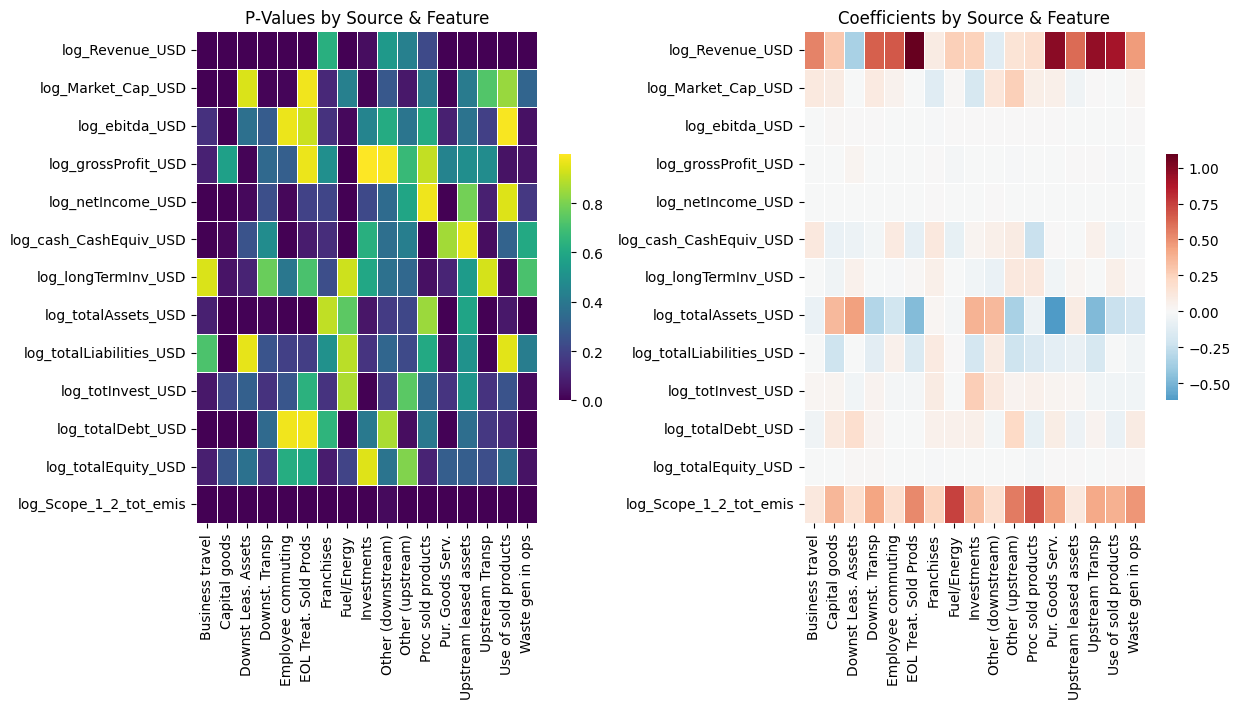

In [25]:


import matplotlib.pyplot as plt
import seaborn as sns

rename_cols = {
    'Fuel-and-energy-related activities (not included in Scope 1 or 2)': 'Fuel/Energy',
    'Upstream transportation and distribution': 'Upstream Transp',
    'Downstream transportation and distribution': 'Downst. Transp',
    'End of life treatment of sold products': 'EOL Treat. Sold Prods',
    'Downstream leased assets': 'Downst Leas. Assets',
    'Purchased goods and services': 'Pur. Goods Serv.',
    'Waste generated in operations': 'Waste gen in ops',
    'Processing of sold products': 'Proc sold products',
}

# Rename columns in both DataFrames for better plotting
pvals_df = pvals_df.rename(columns=rename_cols)
coefs_df = coefs_df.rename(columns=rename_cols)


#rename rows for better plotting
rename_rows = {
    'log_cashAndCashEquivalents_USD': 'log_cash_CashEquiv_USD',
    'log_longTermInvestments_USD': 'log_longTermInv_USD',
    'log_totalInvestments_USD': 'log_totInvest_USD',
    'log_Scope_1_2_total_emission': 'log_Scope_1_2_tot_emis'
}

# Rename indexes in both DataFrames
pvals_df = pvals_df.rename(index=rename_rows)
coefs_df = coefs_df.rename(index=rename_rows)

# Number of features & groups
n_feats = pvals_df.shape[0]
n_groups = pvals_df.shape[1]

# Dynamically set figure size
height = n_feats * 0.4 + 2     # 0.4" per feature + 2" padding
width  = n_groups * 0.5 + 4    # 0.5" per group + 4" padding

fig, axes = plt.subplots(1, 2, figsize=(width, height))

# Plot with seaborn.heatmap for automatic cell sizing
sns.heatmap(
    pvals_df, ax=axes[0], cmap='viridis', cbar_kws={'shrink':0.5},
    linewidths=0.5, linecolor='white'
)
axes[0].set_title('P‑Values by Source & Feature')
axes[0].set_xlabel('')
axes[0].set_ylabel('')

sns.heatmap(
    coefs_df, ax=axes[1], cmap='RdBu_r', center=0, cbar_kws={'shrink':0.5},
    linewidths=0.5, linecolor='white'
)
axes[1].set_title('Coefficients by Source & Feature')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

# Rotate tick labels for readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()



# Feature Reduced Model

Here we run the same model but with the less significant features not included.

Converged using optimizer: lbfgs for group Business travel
Variance across Primary_sector: 1.2921

Group: Business travel --- Top 10 Influential Factors
                                    coef         pvalue
C(Year)[T.2022]                -1.276275  1.185193e-154
Company Var                     1.612913  1.854695e-148
log_Revenue_USD                 0.529882  4.478098e-104
C(Year)[T.2021]                -1.054089  5.652320e-104
log_Scope_1_2_total_emission    0.112383   5.638192e-36
C(Year)[T.2023]                -0.482325   2.469277e-23
log_cashAndCashEquivalents_USD  0.121414   1.216795e-15
log_Market_Cap_USD              0.095633   5.302530e-10
log_totalDebt_USD              -0.047234   2.569049e-03
log_grossProfit_USD            -0.007904   5.452633e-03


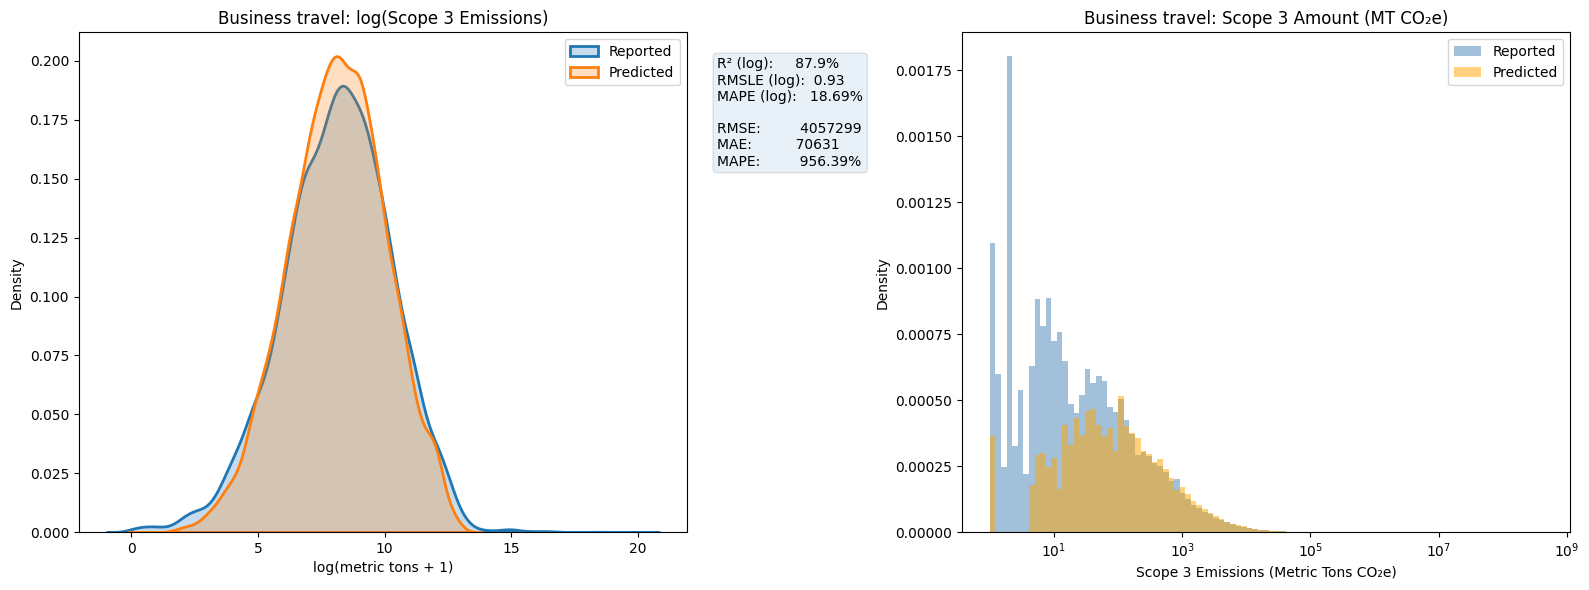

Converged using optimizer: lbfgs for group Capital goods
Variance across Primary_sector: 2.1945

Group: Capital goods --- Top 10 Influential Factors
                                  coef        pvalue
log_Scope_1_2_total_emission  0.360729  1.153235e-93
Company Var                   1.708654  4.464534e-85
C(Country)[T.South Korea]    -3.562195  2.208750e-22
log_Revenue_USD               0.299077  6.537986e-10
C(Country)[T.Hong Kong]      -5.047875  4.179548e-06
C(Year)[T.2019]               0.586238  9.129817e-06
C(Year)[T.2023]               0.555554  1.562692e-05
C(Year)[T.2020]               0.540031  3.580630e-05
log_totalAssets_USD           0.305252  1.018920e-04
C(Year)[T.2021]               0.497162  1.225173e-04


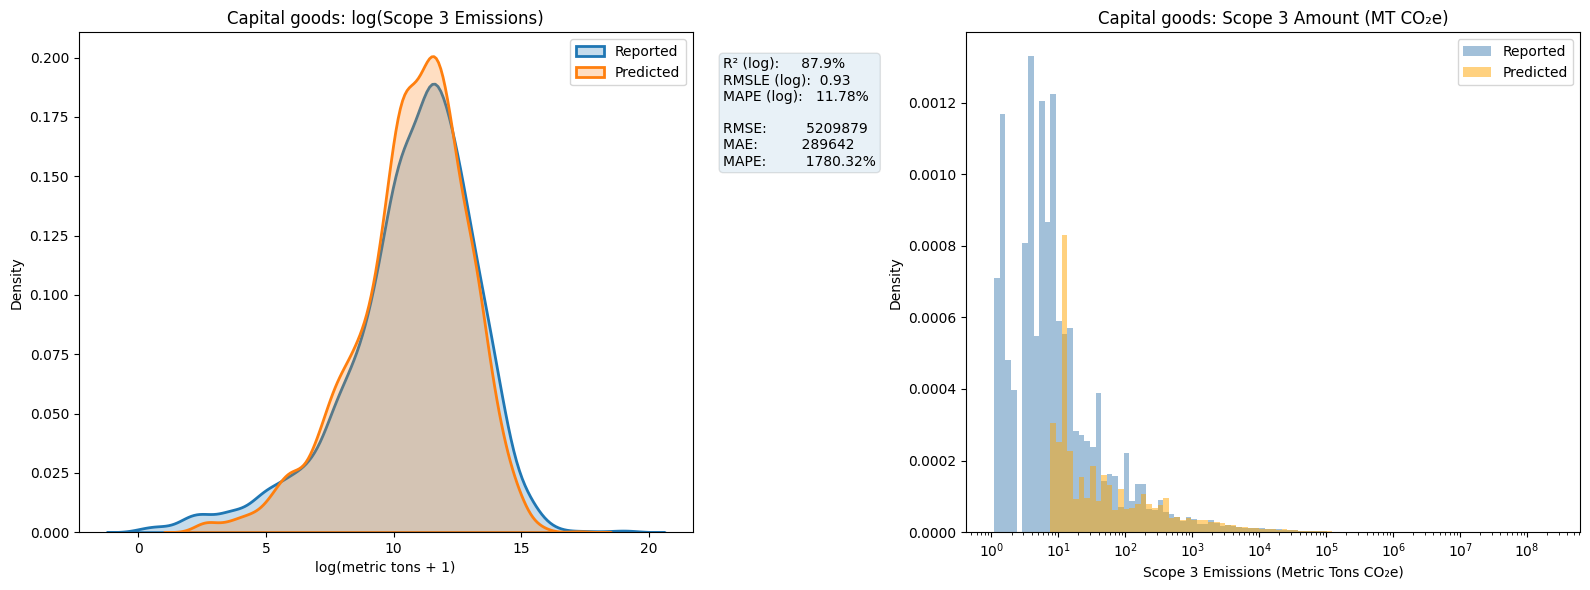

Converged using optimizer: lbfgs for group Downstream leased assets
Variance across Primary_sector: 5.8778

Group: Downstream leased assets --- Top 10 Influential Factors
                                  coef        pvalue
Company Var                   6.158502  4.937683e-43
log_Scope_1_2_total_emission  0.181433  4.203434e-07
log_Revenue_USD              -0.363379  6.736566e-05
log_totalDebt_USD             0.181419  5.731123e-04
C(Country)[T.Hong Kong]      -9.021719  9.432957e-04
log_totalAssets_USD           0.460785  1.107999e-03
C(Country)[T.South Korea]    -2.308451  4.849386e-03
log_grossProfit_USD           0.034233  6.306463e-03
C(Country)[T.Norway]         -3.269663  7.053354e-03
C(Country)[T.Switzerland]    -2.331636  1.168846e-02


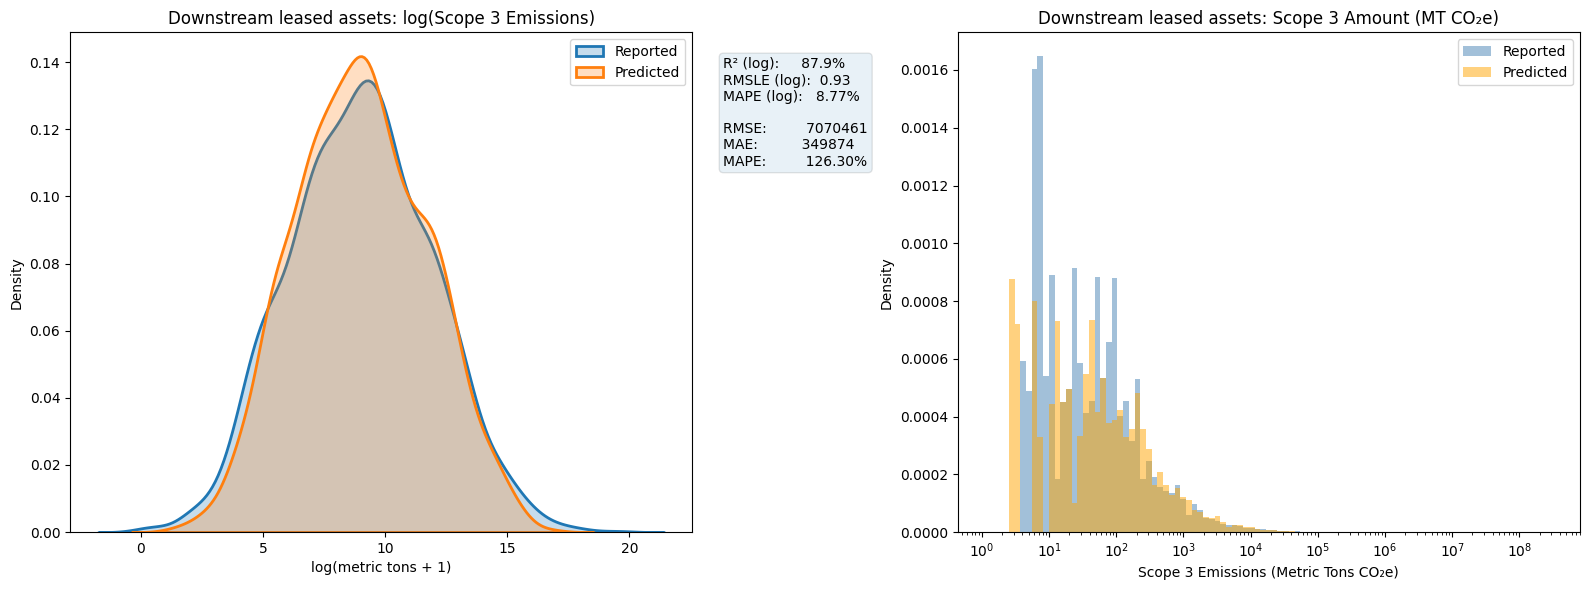

Converged using optimizer: lbfgs for group Downstream transportation and distribution
Variance across Primary_sector: 3.6397

Group: Downstream transportation and distribution --- Top 10 Influential Factors
                                  coef        pvalue
Company Var                   2.534320  9.143347e-83
log_Scope_1_2_total_emission  0.435929  1.508524e-75
log_Revenue_USD               0.650486  1.214555e-19
log_Market_Cap_USD            0.090090  1.520359e-02
C(Country)[T.Turkey]         -6.280086  2.327622e-02
C(Year)[T.2020]               0.223759  5.330940e-02
log_totalAssets_USD          -0.217555  5.836010e-02
C(Country)[T.Bermuda]        -4.844391  7.977724e-02
C(Country)[T.Hungary]        -4.287031  9.386818e-02
C(Year)[T.2018]               0.184829  1.223617e-01


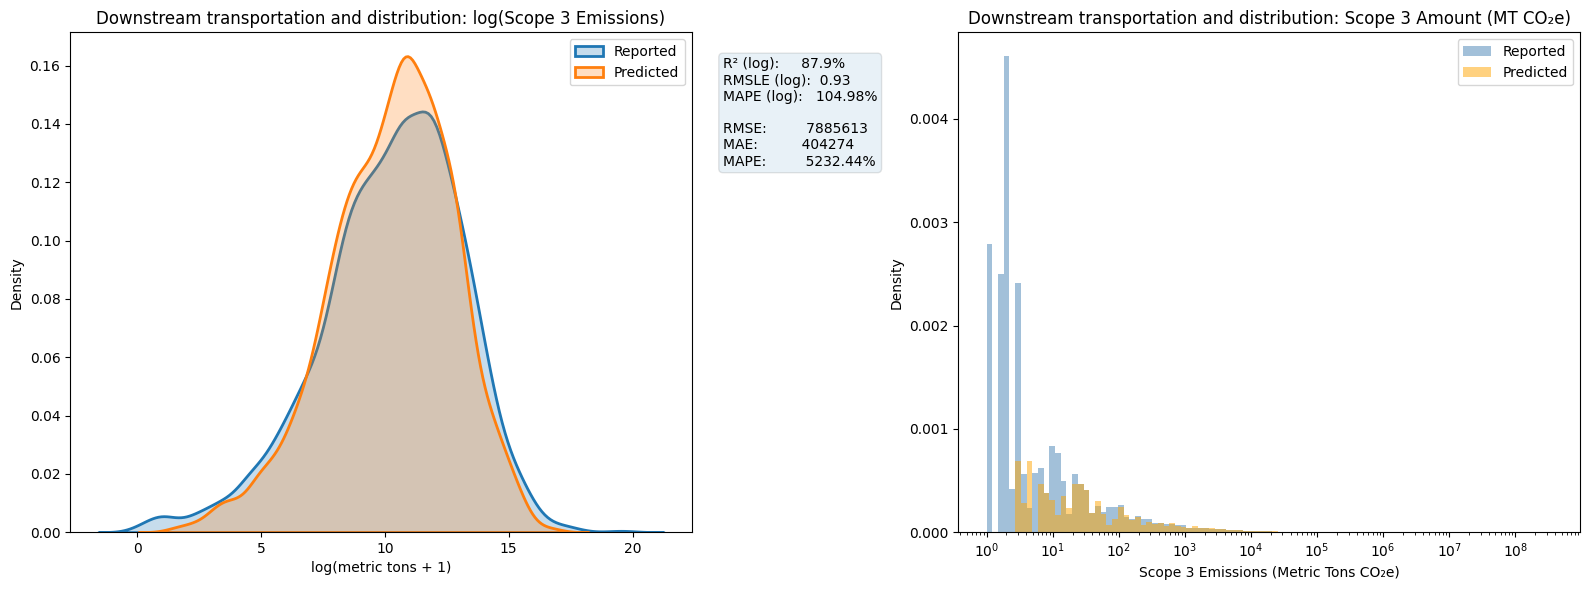

Converged using optimizer: lbfgs for group Employee commuting
Variance across Primary_sector: 1.8600

Group: Employee commuting --- Top 10 Influential Factors
                                    coef         pvalue
Company Var                     2.157315  1.027625e-130
log_Revenue_USD                 0.676822   1.736779e-93
log_Scope_1_2_total_emission    0.174066   2.916820e-49
log_totalAssets_USD            -0.261929   2.814002e-07
log_cashAndCashEquivalents_USD  0.102602   7.114518e-07
C(Year)[T.2020]                 0.287573   6.410241e-05
C(Year)[T.2023]                 0.260121   2.412120e-04
C(Year)[T.2019]                 0.216230   3.114206e-03
C(Country)[T.Hong Kong]        -3.446175   1.032412e-02
C(Year)[T.2018]                 0.190910   1.086332e-02


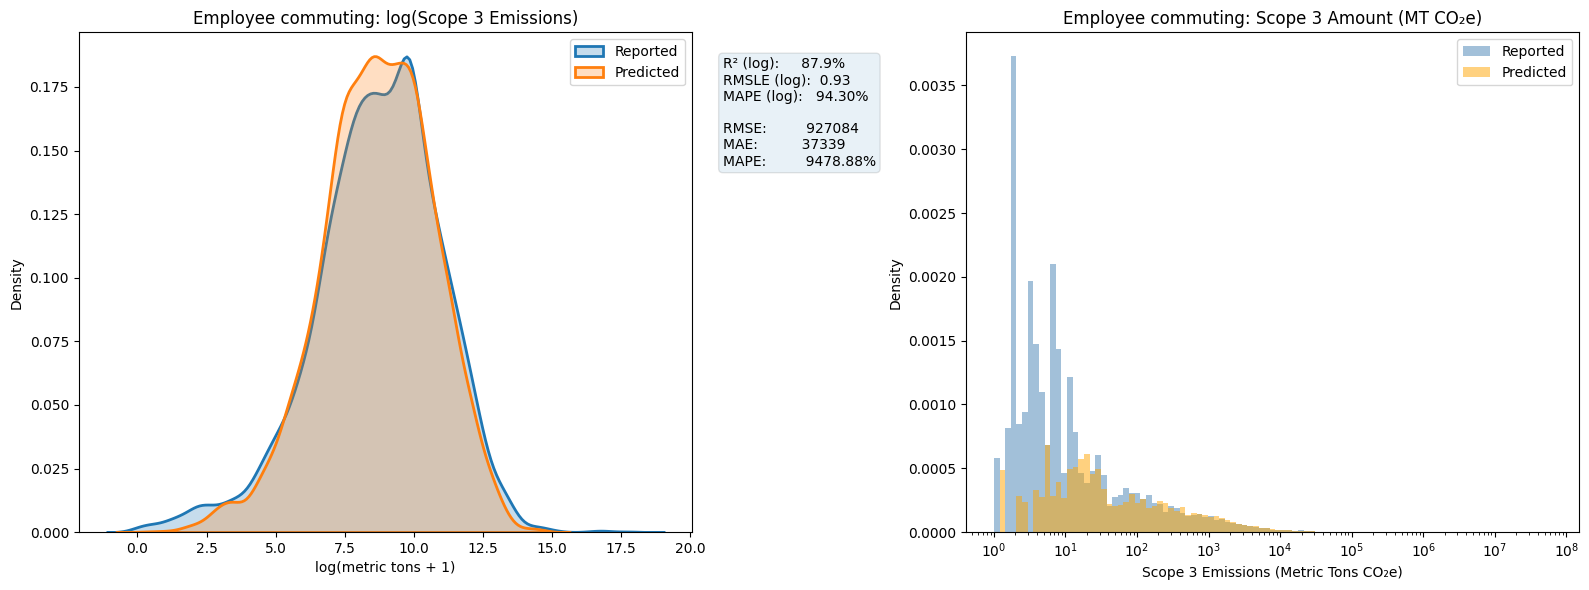

Converged using optimizer: lbfgs for group End of life treatment of sold products
Variance across Primary_sector: 5.7380

Group: End of life treatment of sold products --- Top 10 Influential Factors
                                  coef        pvalue
Company Var                   3.541964  1.007932e-71
log_Scope_1_2_total_emission  0.531558  5.080443e-58
log_Revenue_USD               1.083312  6.002677e-25
C(Year)[T.2023]               0.960808  1.202797e-09
C(Year)[T.2020]               0.909632  1.403862e-08
C(Year)[T.2022]               0.765862  1.115583e-06
C(Year)[T.2019]               0.736371  5.002635e-06
C(Year)[T.2021]               0.716534  6.423693e-06
C(Year)[T.2018]               0.725992  9.619890e-06
log_totalAssets_USD          -0.504868  3.118502e-04


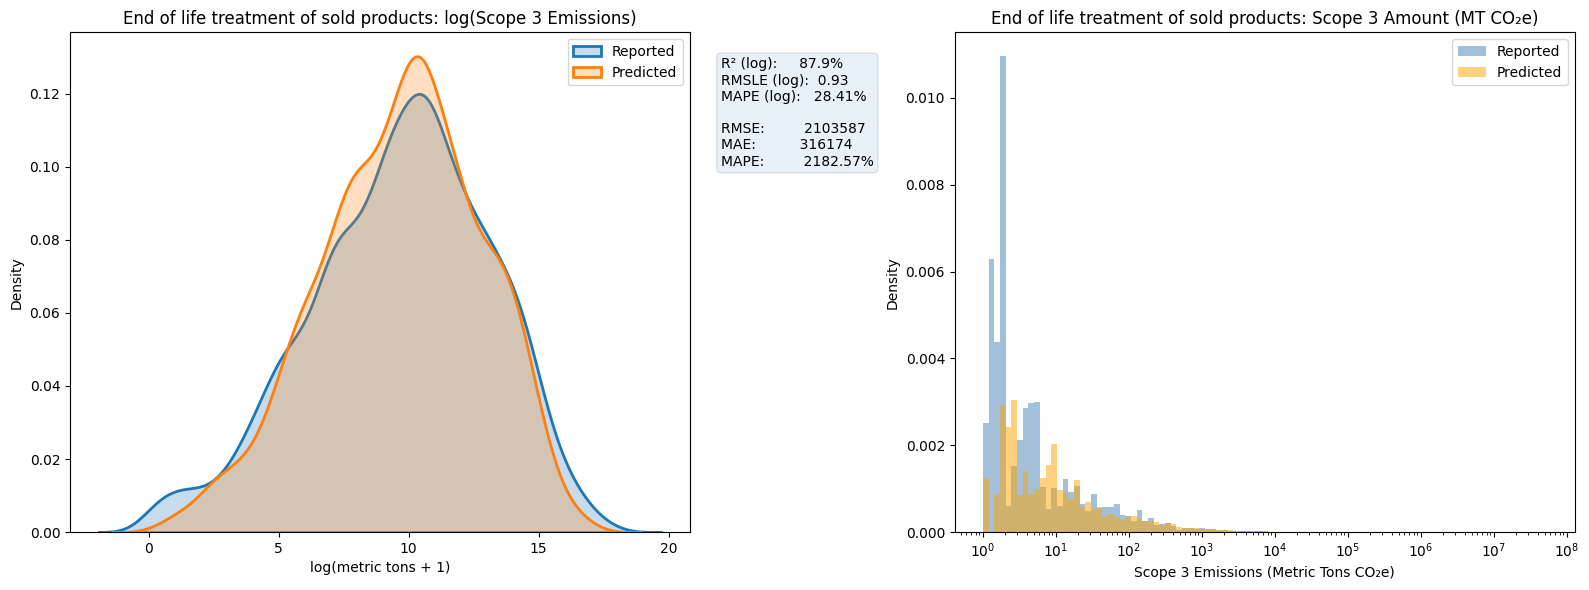

Converged using optimizer: lbfgs for group Franchises
Variance across Primary_sector: 5.3658

Group: Franchises --- Top 10 Influential Factors
                                    coef        pvalue
Company Var                     9.072984  4.471518e-16
log_Scope_1_2_total_emission    0.253068  2.634145e-04
C(Year)[T.2018]                 0.604104  1.539637e-02
C(Year)[T.2023]                 0.442387  7.035869e-02
C(Year)[T.2017]                 0.383042  1.113677e-01
C(Year)[T.2020]                 0.362165  1.451553e-01
C(Year)[T.2022]                 0.349158  1.487880e-01
log_cashAndCashEquivalents_USD  0.111432  1.511515e-01
C(Country)[T.Singapore]        -4.083193  1.708825e-01
log_Market_Cap_USD             -0.118330  1.713968e-01


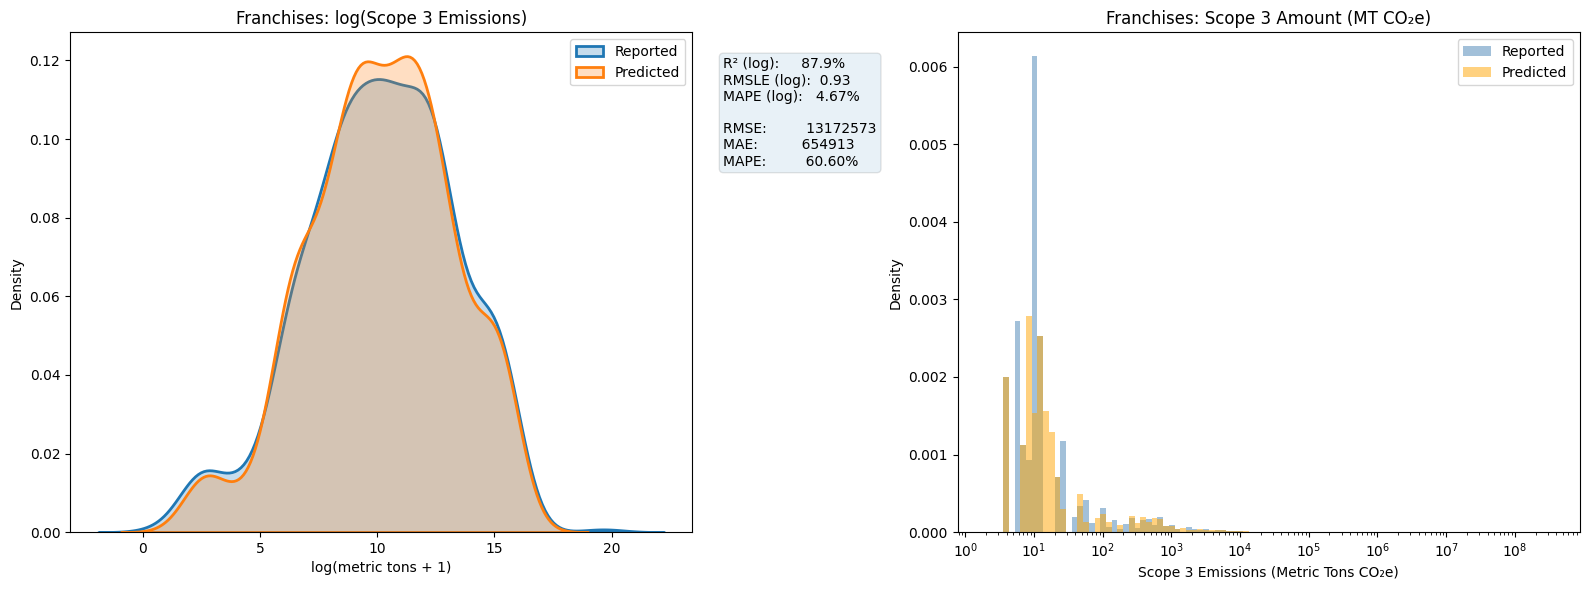

Converged using optimizer: lbfgs for group Fuel-and-energy-related activities (not included in Scope 1 or 2)
Variance across Primary_sector: 1.3741

Group: Fuel-and-energy-related activities (not included in Scope 1 or 2) --- Top 10 Influential Factors
                                  coef         pvalue
log_Scope_1_2_total_emission  0.745306   0.000000e+00
Company Var                   1.314048  6.904041e-109
C(Year)[T.2023]               0.866803   1.432493e-27
C(Year)[T.2022]               0.773711   2.563367e-22
C(Year)[T.2021]               0.710030   9.313333e-19
C(Year)[T.2020]               0.689028   1.723461e-17
log_Revenue_USD               0.263799   4.871987e-17
C(Year)[T.2019]               0.621938   3.184407e-14
C(Year)[T.2018]               0.618065   1.630625e-13
log_grossProfit_USD          -0.019265   9.432842e-07


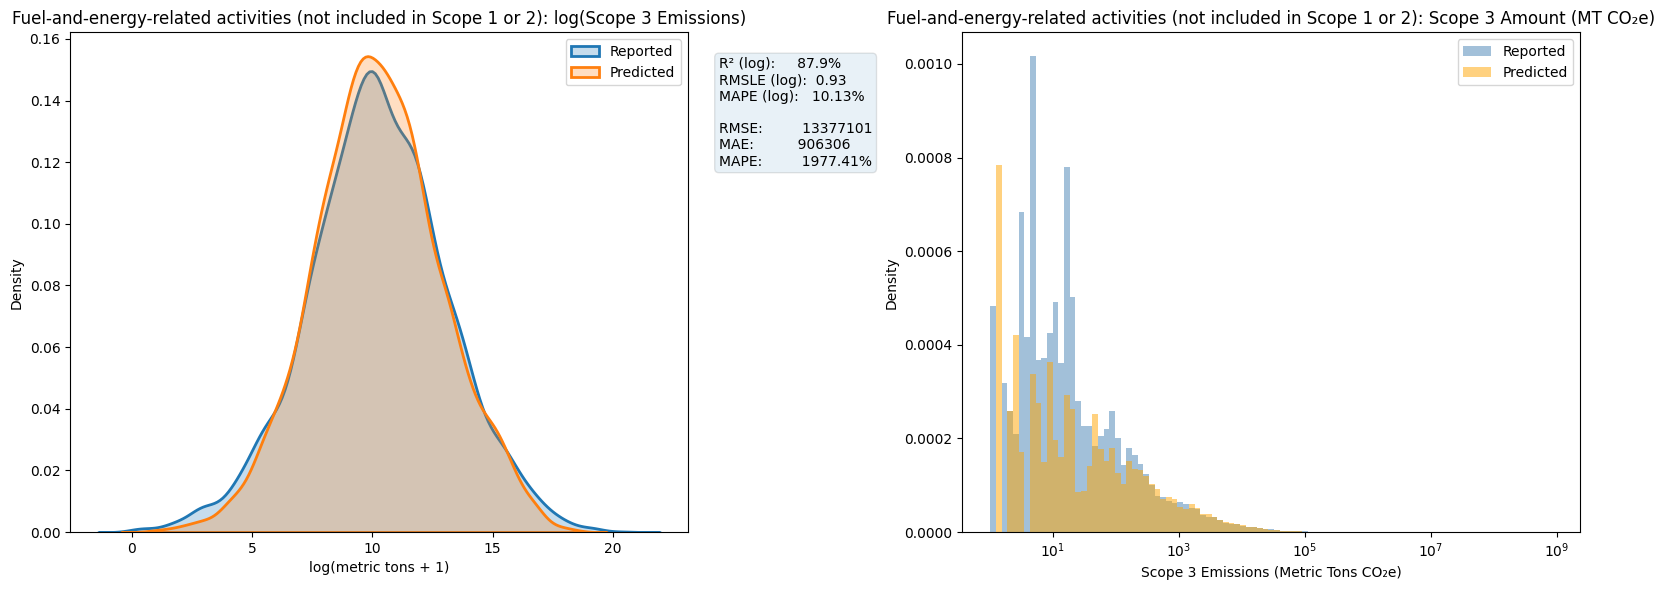

Converged using optimizer: lbfgs for group Investments
Variance across Primary_sector: 5.7190

Group: Investments --- Top 10 Influential Factors
                                  coef        pvalue
Company Var                   3.844177  3.629334e-38
log_Scope_1_2_total_emission  0.348879  1.270083e-19
log_totalAssets_USD           0.766402  1.806903e-05
log_Market_Cap_USD           -0.183467  7.477959e-03
C(Country)[T.New Zealand]    -2.248912  2.052367e-02
C(Country)[T.South Africa]    1.846122  2.691768e-02
C(Country)[T.Sweden]         -1.775493  5.980239e-02
C(Country)[T.Norway]          1.592226  7.264970e-02
C(Country)[T.Thailand]        1.730263  8.217952e-02
log_Revenue_USD               0.188304  1.076619e-01


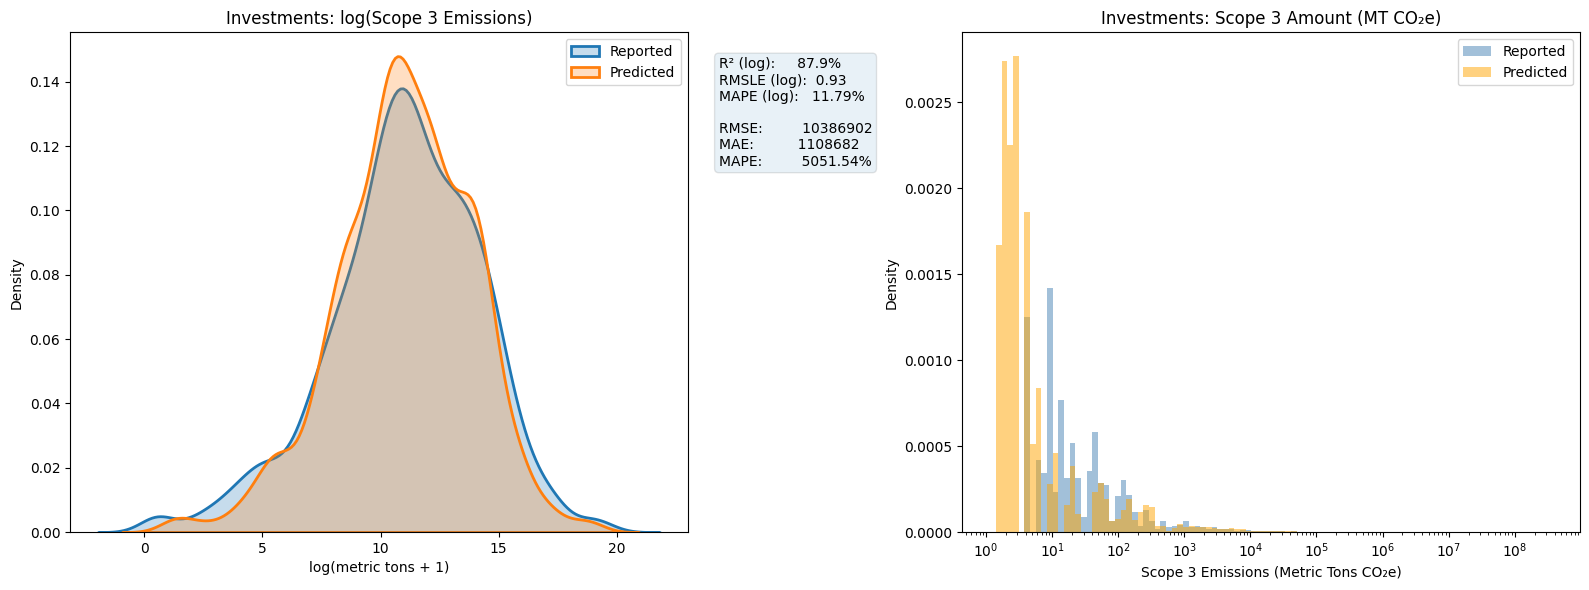

Converged using optimizer: lbfgs for group Other (downstream)
Variance across Primary_sector: 9.5347

Group: Other (downstream) --- Top 10 Influential Factors
                                   coef        pvalue
Company Var                   21.015224  4.960986e-10
C(Country)[T.Spain]            7.938474  3.976519e-04
C(Country)[T.Denmark]          8.910197  5.690268e-04
C(Country)[T.France]           4.902656  6.575342e-04
C(Country)[T.Sweden]           8.256481  1.474081e-03
C(Country)[T.Turkey]           7.706802  2.857359e-03
C(Country)[T.South Korea]      5.394654  3.549449e-03
C(Year)[T.2018]                0.624295  1.338654e-02
C(Country)[T.Canada]           4.114816  1.679371e-02
log_Scope_1_2_total_emission   0.187384  1.737366e-02


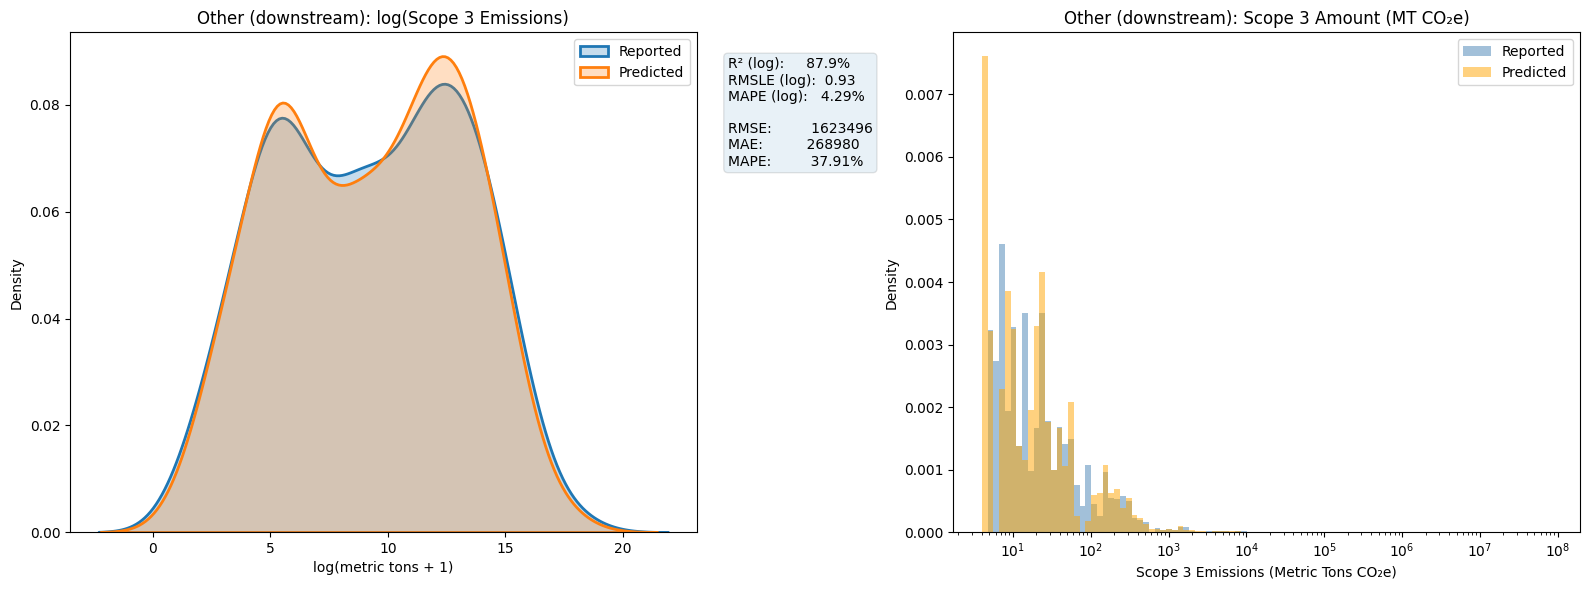

Converged using optimizer: lbfgs for group Other (upstream)
Variance across Primary_sector: 7.0565

Group: Other (upstream) --- Top 10 Influential Factors
                                  coef        pvalue
log_Scope_1_2_total_emission  0.566362  6.956127e-12
Company Var                   5.552853  2.194406e-11
C(Country)[T.Netherlands]     5.116983  1.770531e-03
C(Year)[T.2014]              -0.748328  1.039133e-02
log_totalDebt_USD             0.224225  3.147776e-02
C(Country)[T.New Zealand]     5.868877  4.354624e-02
C(Country)[T.Germany]         2.475300  4.937350e-02
C(Country)[T.USA]             1.719898  6.467472e-02
C(Country)[T.France]          1.631759  7.944459e-02
log_Market_Cap_USD            0.231101  1.010825e-01


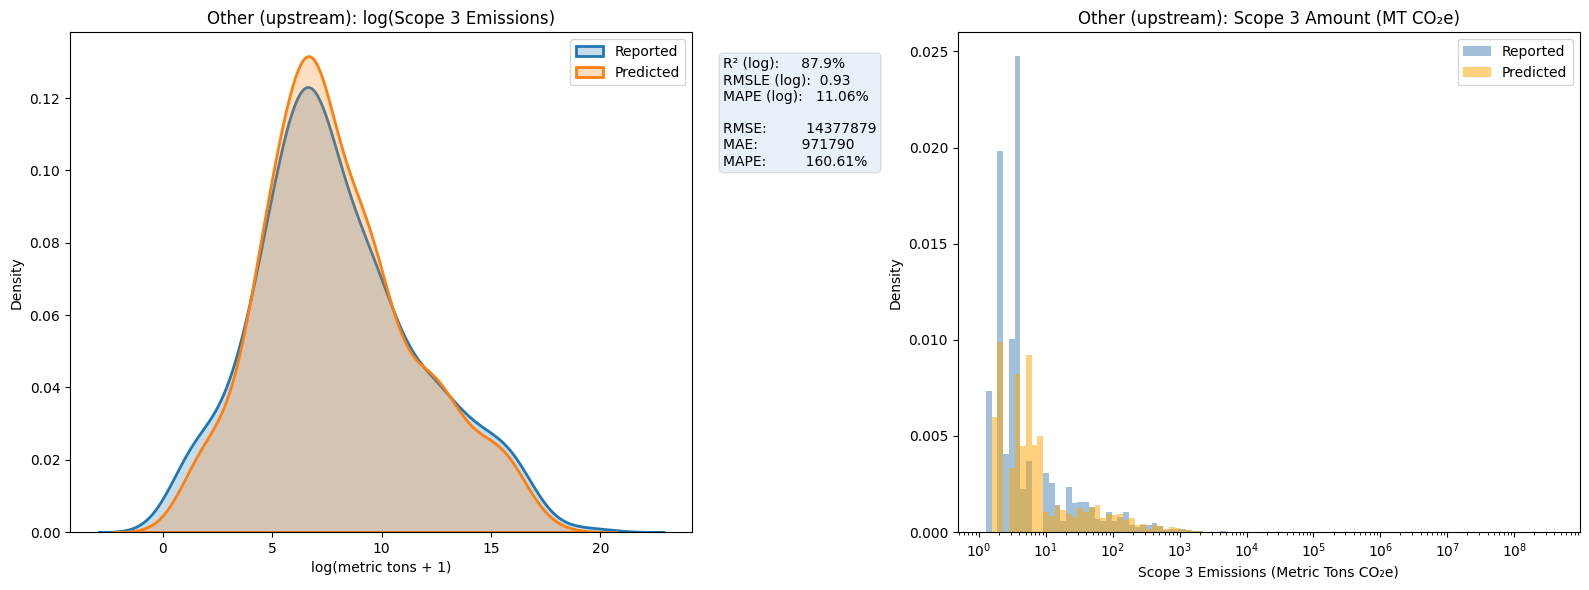

Converged using optimizer: lbfgs for group Processing of sold products
Variance across Primary_sector: 7.6833

Group: Processing of sold products --- Top 10 Influential Factors
                                    coef        pvalue
Company Var                     5.723759  2.783236e-28
log_Scope_1_2_total_emission    0.712807  1.727914e-26
C(Year)[T.2020]                 0.938051  4.678781e-04
C(Year)[T.2021]                 0.888497  8.349958e-04
C(Year)[T.2019]                 0.811168  2.411709e-03
C(Year)[T.2018]                 0.763516  4.961073e-03
C(Year)[T.2022]                 0.713379  6.605238e-03
C(Year)[T.2015]                 0.739962  8.668506e-03
log_cashAndCashEquivalents_USD -0.224335  9.031158e-03
C(Year)[T.2023]                 0.638173  1.569658e-02


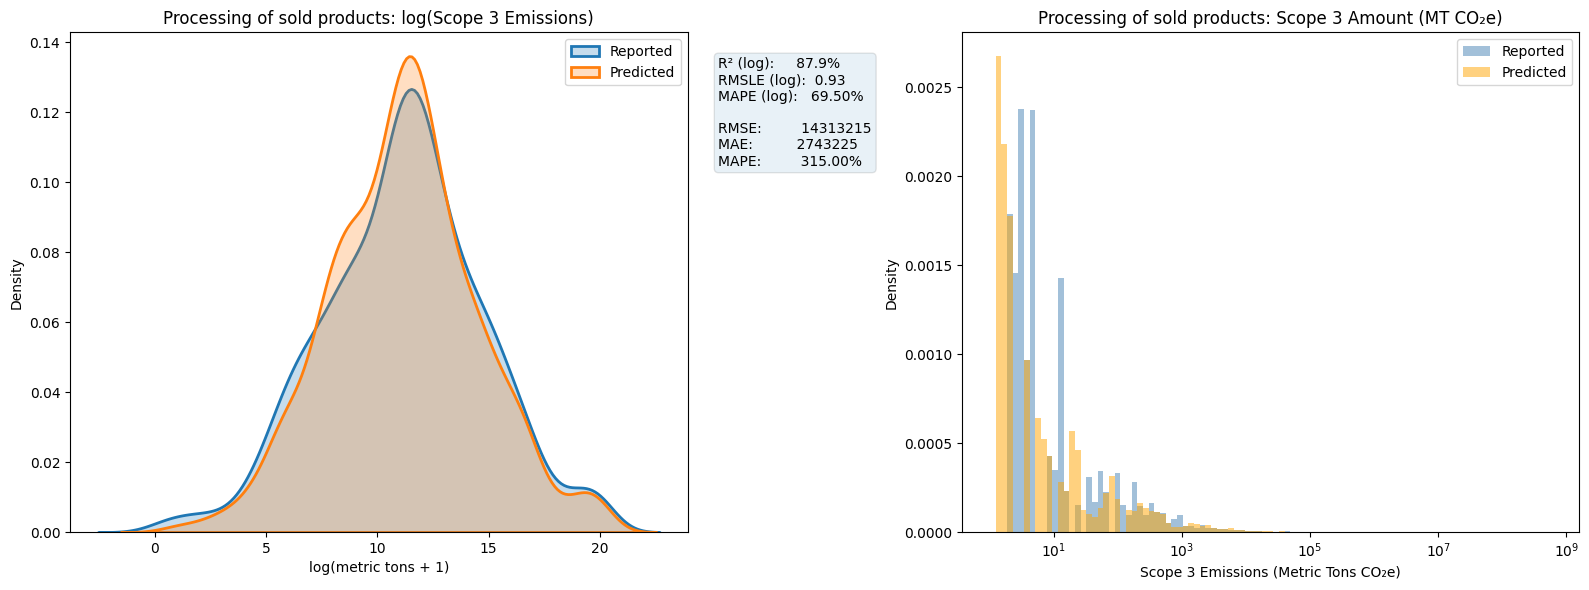

Converged using optimizer: lbfgs for group Purchased goods and services
Variance across Primary_sector: 4.1719

Group: Purchased goods and services --- Top 10 Influential Factors
                                  coef         pvalue
log_Scope_1_2_total_emission  0.452013  5.772642e-162
Company Var                   2.530537  4.548646e-146
log_Revenue_USD               0.980526   8.985992e-98
C(Year)[T.2023]               1.315440   2.553096e-44
C(Year)[T.2022]               1.130439   1.569312e-33
C(Year)[T.2021]               0.963568   2.083032e-24
C(Year)[T.2020]               0.952636   1.579935e-23
log_totalAssets_USD          -0.620942   3.113677e-20
C(Year)[T.2019]               0.763460   2.115909e-15
C(Year)[T.2018]               0.736099   6.435004e-14


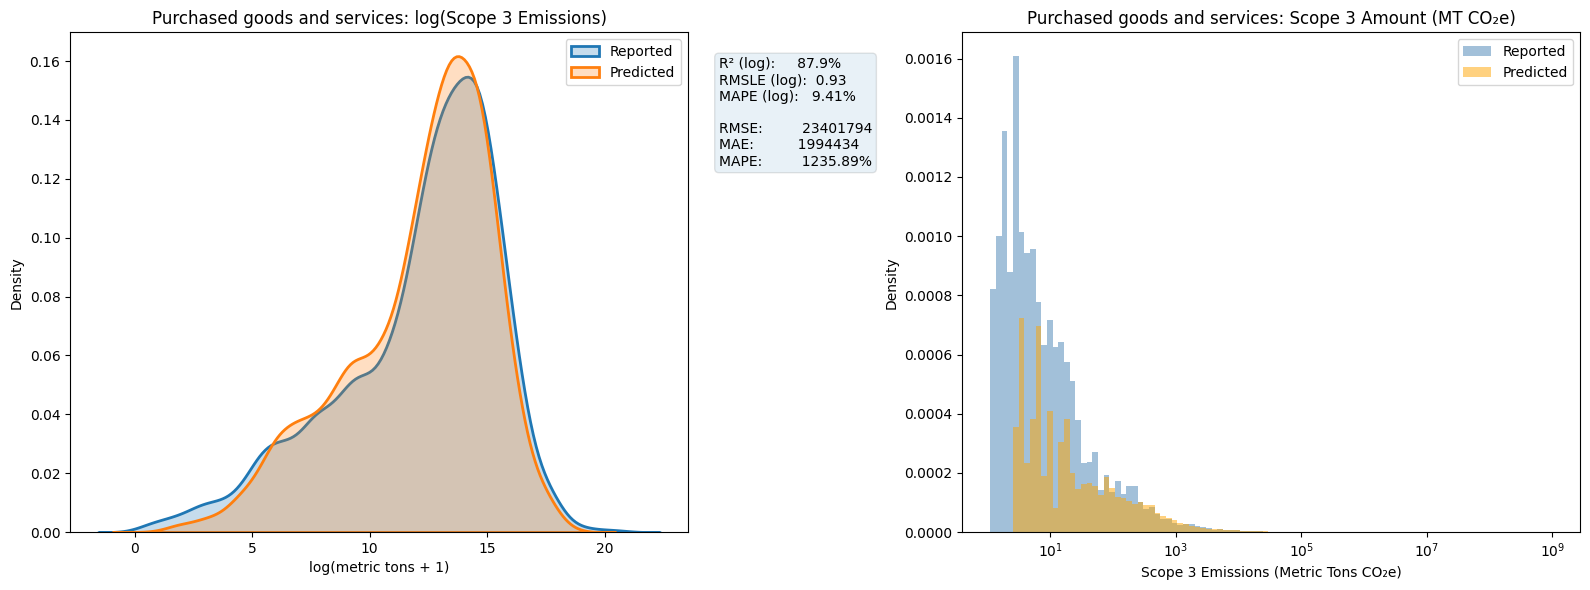

Converged using optimizer: lbfgs for group Upstream leased assets
Variance across Primary_sector: 3.7335

Group: Upstream leased assets --- Top 10 Influential Factors
                                  coef        pvalue
Company Var                   2.862705  2.280877e-37
log_Revenue_USD               0.592499  1.456649e-10
C(Country)[T.South Korea]    -2.601284  5.220230e-06
C(Country)[T.Japan]          -1.938542  9.218870e-05
log_Scope_1_2_total_emission  0.111002  4.501763e-04
C(Year)[T.2022]              -0.595280  6.986011e-04
C(Country)[T.Taiwan]         -2.051768  8.288273e-04
C(Country)[T.Bermuda]         6.601631  2.096872e-03
C(Country)[T.Canada]         -1.814161  2.327110e-03
C(Country)[T.United Kingdom] -1.589935  2.497302e-03


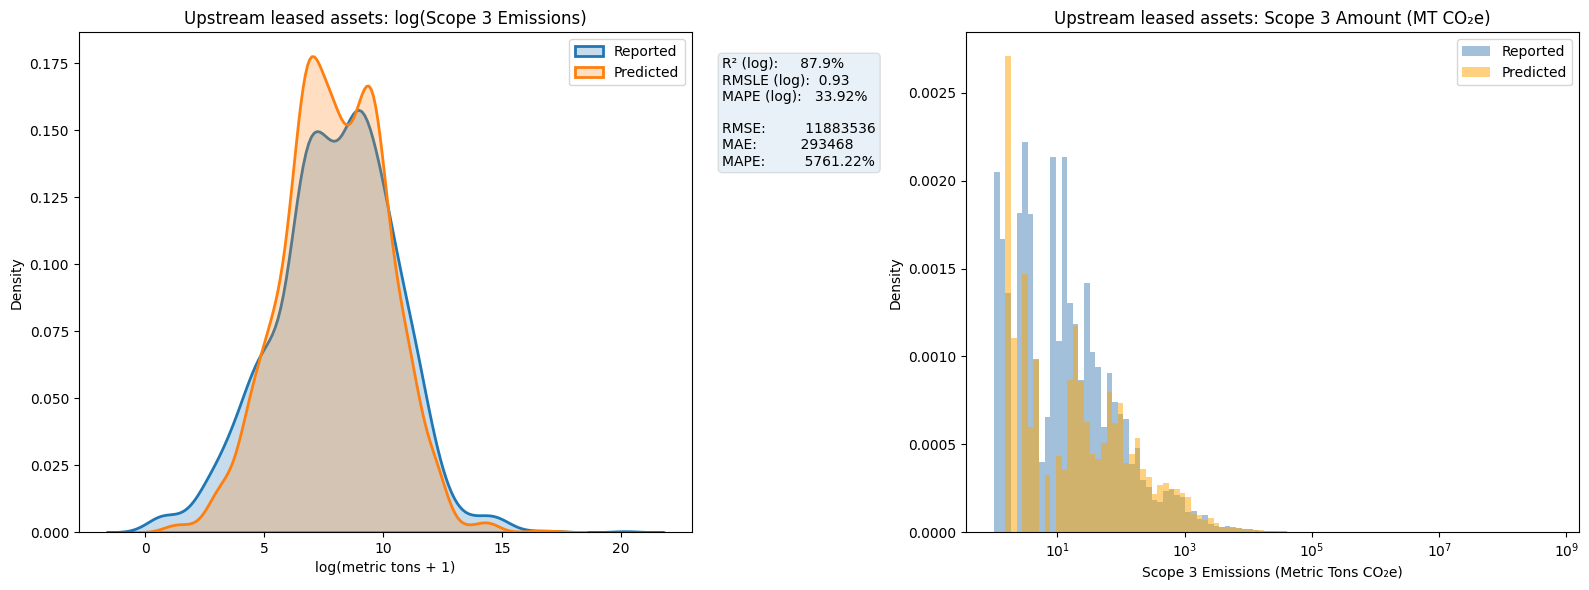

Converged using optimizer: lbfgs for group Upstream transportation and distribution
Variance across Primary_sector: 3.3751

Group: Upstream transportation and distribution --- Top 10 Influential Factors
                                  coef         pvalue
log_Scope_1_2_total_emission  0.413491  6.281335e-123
Company Var                   2.740023  2.524225e-116
log_Revenue_USD               0.945180   7.068284e-80
C(Year)[T.2023]               0.798027   4.694899e-18
log_totalAssets_USD          -0.556418   1.216345e-12
C(Year)[T.2022]               0.597921   7.192983e-11
C(Year)[T.2020]               0.559204   2.081524e-09
C(Year)[T.2021]               0.479833   2.203119e-07
C(Year)[T.2019]               0.439548   3.209167e-06
C(Year)[T.2018]               0.368749   1.328894e-04


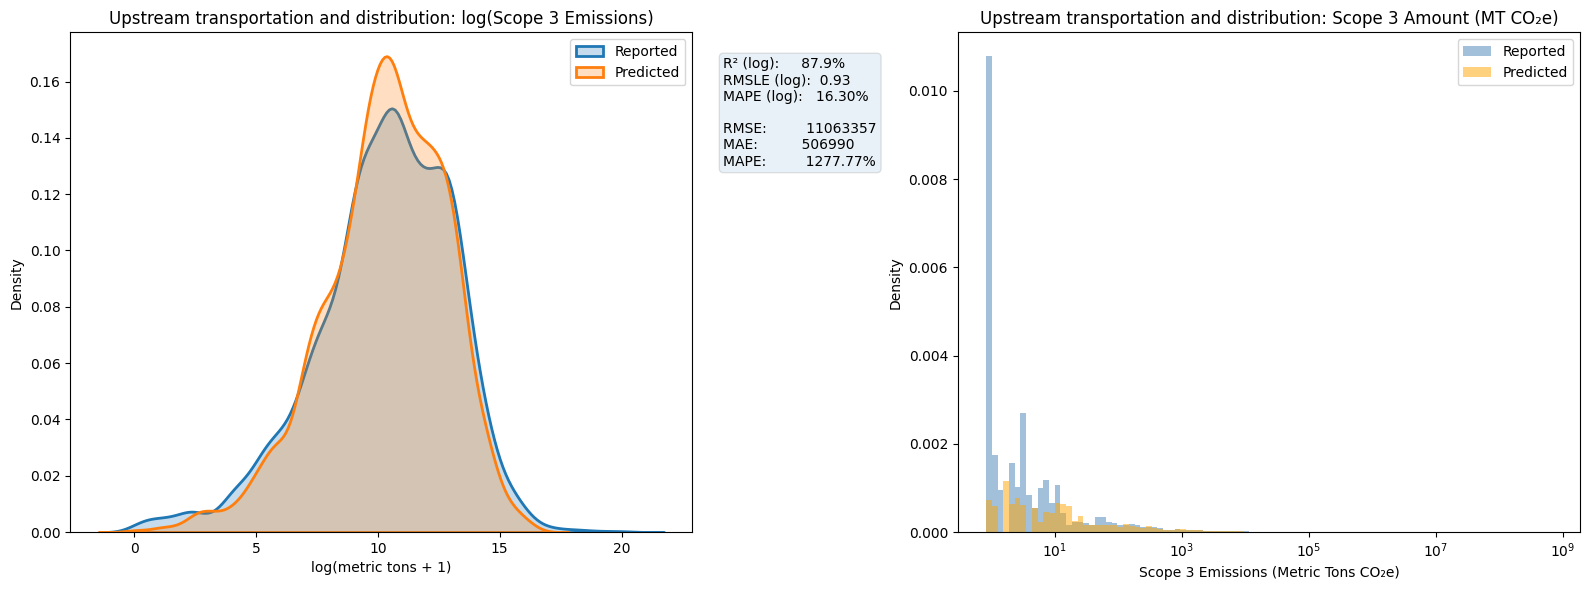

Converged using optimizer: lbfgs for group Use of sold products
Variance across Primary_sector: 8.3011

Group: Use of sold products --- Top 10 Influential Factors
                                  coef        pvalue
Company Var                   7.896673  3.360038e-92
log_Scope_1_2_total_emission  0.393563  6.747921e-43
log_Revenue_USD               0.905238  3.105766e-26
C(Year)[T.2023]               0.707984  3.407102e-11
C(Year)[T.2020]               0.673725  2.795123e-10
C(Year)[T.2021]               0.641189  1.418168e-09
C(Year)[T.2022]               0.635497  1.588477e-09
C(Year)[T.2019]               0.618239  7.379404e-09
C(Year)[T.2018]               0.546697  6.448754e-07
C(Year)[T.2015]               0.406151  3.196734e-04


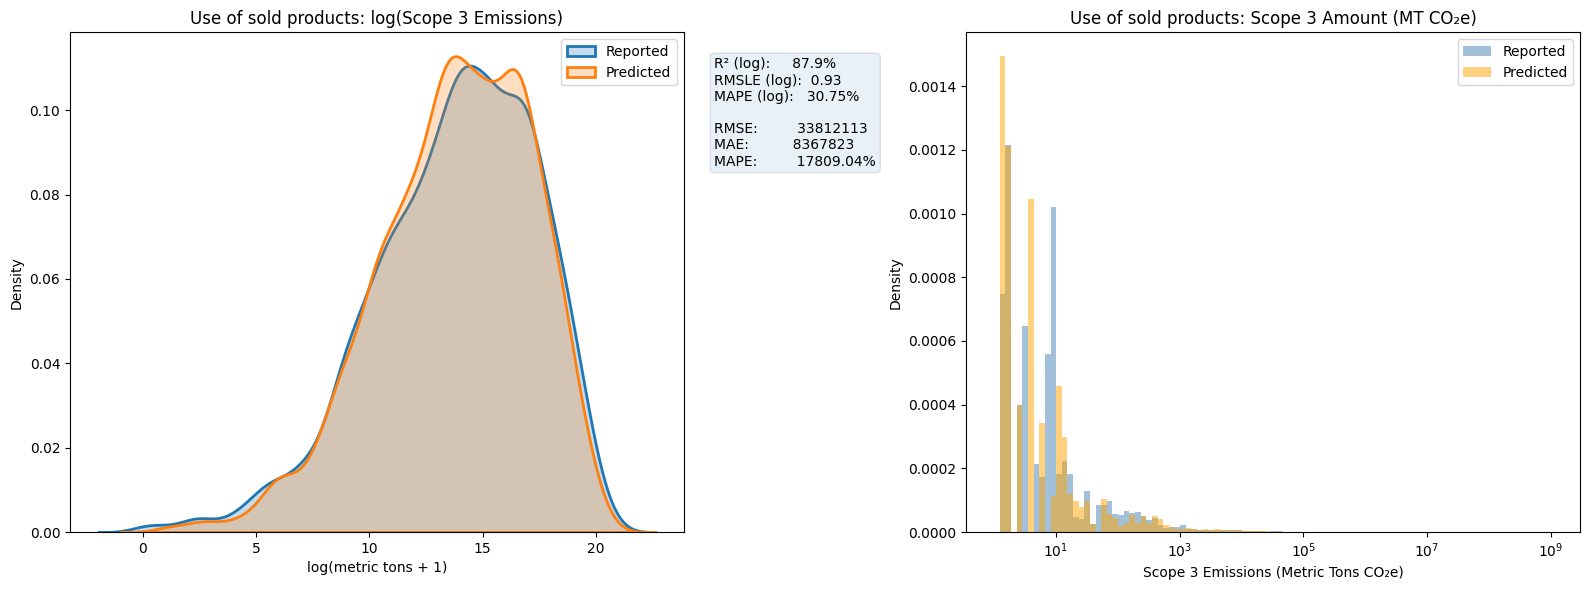

Converged using optimizer: lbfgs for group Waste generated in operations
Variance across Primary_sector: 2.7135

Group: Waste generated in operations --- Top 10 Influential Factors
                                  coef         pvalue
log_Scope_1_2_total_emission  0.480778  1.087328e-258
Company Var                   2.324781  3.497810e-136
log_Revenue_USD               0.478966   1.015052e-37
C(Year)[T.2020]               0.432292   1.541381e-07
C(Year)[T.2023]               0.405940   6.094413e-07
C(Year)[T.2019]               0.395788   2.000225e-06
log_totalAssets_USD          -0.249913   1.254515e-05
C(Year)[T.2018]               0.360572   2.456241e-05
log_totalDebt_USD             0.094816   6.109177e-05
C(Year)[T.2022]               0.309823   1.292953e-04


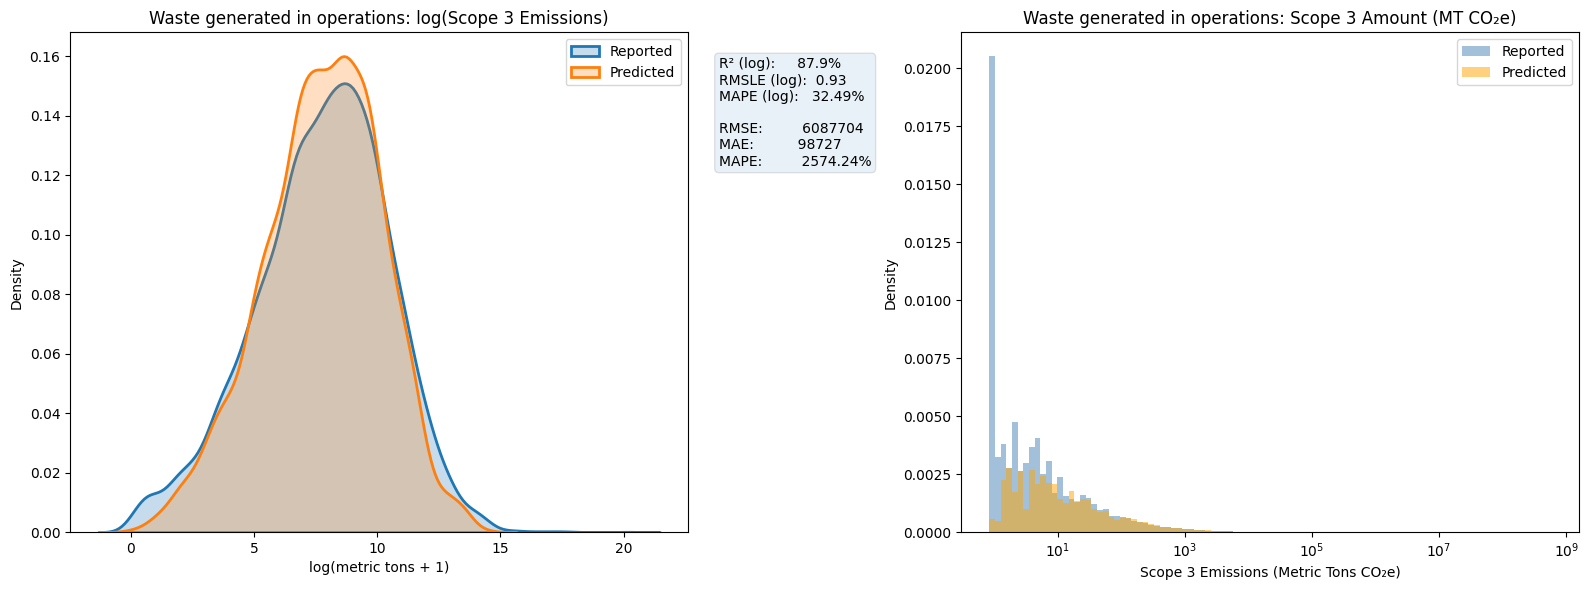


📊 Summary of Model Performance Metrics by Scope 3 Source:



R2_log  \
Business travel                                                      0.86   
Capital goods                                                        0.85   
Downstream leased assets                                             0.92   
Downstream transportation and distribution                           0.87   
Employee commuting                                                   0.88   
End of life treatment of sold products                               0.90   
Franchises                                                           0.96   
Fuel-and-energy-related activities (not included in Scope 1 or 2)    0.90   
Investments                                                          0.90   
Other (downstream)                                                   0.98   
Other (upstream)                                                     0.95   
Processing of sold products                                          0.93   
Purchased goods and services                                         0.90   
Upstream leased assets                                               0.86   
Upstream transportation and distribution                             0.89   
Use of sold products                                                 0.94   
Waste generated in operations                                        0.88   

                                                                   RMSLE_log  \
Business travel                                                         0.79   
Capital goods                                                           0.97   
Downstream leased assets                                                0.80   
Downstream transportation and distribution                              1.02   
Employee commuting                                                      0.80   
End of life treatment of sold products                                  1.07   
Franchises                                                              0.63   
Fuel-and-energy-related activities (not included in Scope 1 or 2)       0.90   
Investments                                                             0.99   
Other (downstream)                                                      0.50   
Other (upstream)                                                        0.86   
Processing of sold products                                             0.94   
Purchased goods and services                                            1.11   
Upstream leased assets                                                  0.95   
Upstream transportation and distribution                                0.95   
Use of sold products                                                    0.86   
Waste generated in operations                                           0.93   

                                                                   MAPE_log  \
Business travel                                                       18.69   
Capital goods                                                         11.78   
Downstream leased assets                                               8.77   
Downstream transportation and distribution                           104.98   
Employee commuting                                                    94.30   
End of life treatment of sold products                                28.41   
Franchises                                                             4.67   
Fuel-and-energy-related activities (not included in Scope 1 or 2)     10.13   
Investments                                                           11.79   
Other (downstream)                                                     4.29   
Other (upstream)                                                      11.06   
Processing of sold products                                           69.50   
Purchased goods and services                                           9.41   
Upstream leased assets                                                33.92   
Upstream transportation and distribution              

In [28]:


# Remove zero values BEFORE log transformation and create a log target column.
prepped_df = prepped_df[prepped_df["Scope 3 Amount"] > 0].copy()
prepped_df["log_Scope_3_Amount"] = np.log1p(prepped_df["Scope 3 Amount"])

# Then group by "Scope 3 Sources" to create the dictionary of dataframes.
grouped_dfs = {
    group_name: group_df.copy()
    for group_name, group_df in prepped_df.groupby('Scope 3 Sources')
}

# Define the list of continuous variables.
numeric_cols = ['Scope 3 Amount', 'Revenue_USD', 'Market_Cap_USD', 
                'ebitda_USD', 'grossProfit_USD', 'netIncome_USD', 'cashAndCashEquivalents_USD', 
                'longTermInvestments_USD', 'totalAssets_USD', 'totalLiabilities_USD', 
                'totalInvestments_USD', 'totalDebt_USD', 'totalEquity_USD', 'Scope_1_2_total_emission']

# Signed log transformation function.
def signed_log(x):
    return np.sign(x) * np.log(np.abs(x) + 1)

# Dictionary to collect metrics for each group.
metrics_results = {}

feature_pvals = {}
feature_coefs = {}

# Only the “financial” predictors from numeric_cols (exclude Scope 3 Amount and country averages)
fin_cols = [col for col in numeric_cols 
            if col not in ('Scope 3 Amount')]

# Build the list of model feature names
all_feats = [f'log_{col.replace(" ", "_").replace("/", "_")}' for col in fin_cols]


# Loop over each group in the dictionary.
for group_name, df in grouped_dfs.items():
    for col in numeric_cols:
        new_col = f'log_{col.replace(" ", "_").replace("/", "_")}'
        df[new_col] = df[col].apply(signed_log)

    df['Year'] = df['Year of Data'].astype(str)
    df['Scope3_Source'] = df['Scope 3 Sources'].astype(str)
    df['Country'] = df['Countries'].astype(str)
    df['Company'] = df['Company Name'].astype(str)
    
    df['ThirdParty_Verification'] = df['Third_Party_Verification'].astype(str)
    df['Primary_activity'] = df['Primary activity'].astype(str)
    df['Primary_sector'] = df['Primary sector'].astype(str)

        # Drop rows with NA after transformations
    df = df.dropna(subset=[  # Include all needed predictors here
        'log_Revenue_USD', 'log_Market_Cap_USD', 'log_ebitda_USD', 
        'log_grossProfit_USD', 'log_netIncome_USD', 'log_cashAndCashEquivalents_USD',
        'log_longTermInvestments_USD', 'log_totalAssets_USD', 'log_totalLiabilities_USD',
        'log_totalInvestments_USD', 'log_totalDebt_USD', 'log_totalEquity_USD',
        'log_Scope_3_Amount', 'log_Scope_1_2_total_emission'
    ]).reset_index(drop=True)


    formula = (
        "log_Scope_3_Amount ~ log_Revenue_USD + "
        "log_Market_Cap_USD + log_grossProfit_USD + " #log_netIncome_USD + "   # + log_ebitda_USD
        "log_cashAndCashEquivalents_USD + log_totalAssets_USD + "  # + log_longTermInvestments_USD
        "log_totalLiabilities_USD + log_totalDebt_USD + log_Scope_1_2_total_emission + "  # + log_totalInvestments_USD log_totalEquity_USD + 
        "C(Year) + C(Country)"  #+ C(Primary_activity) 
    )

    model = smf.mixedlm(formula, df, groups=df["Primary_sector"],
                        vc_formula={"Company": "0 + C(Company)"})
    result = None



    # Try multiple optimizers
    optimizers = ['lbfgs', 'cg', 'bfgs', 'nm']
    for opt in optimizers:
        try:
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore")
                result = model.fit(method=opt, reml=False)
            if result.converged:
                print(f"Converged using optimizer: {opt} for group {group_name}")
                break
        except Exception as e:
            print(f"Failed with optimizer {opt} for group {group_name}: {e}")

    if result is None or not result.converged:
        print(f"Model did not converge for group {group_name}.")
        continue
    # Store p-values and coefficients
    coef_df = pd.DataFrame({
        'coef': result.params,
        'pvalue': result.pvalues
    })

        # Extract p-values and coefficients for each feature
    pvals = {feat: result.pvalues.get(feat, np.nan) for feat in all_feats}
    coefs = {feat: result.params.get(feat, np.nan)  for feat in all_feats}
    
    feature_pvals[group_name] = pvals
    feature_coefs[group_name] = coefs
    # Remove intercept for ranking
    if "Intercept" in coef_df.index:
        coef_df = coef_df.drop(index="Intercept")

    # Collect only financial feature results
    financial_vars = [f'log_{col.replace(" ", "_").replace("/", "_")}' for col in numeric_cols if 'Scope' not in col]
    financial_pvals = coef_df.loc[coef_df.index.isin(financial_vars)][['coef', 'pvalue']]

    # Store in dictionary
    if 'financial_feature_stats' not in metrics_results:
        metrics_results['financial_feature_stats'] = {}

    for var in financial_pvals.index:
        if var not in metrics_results['financial_feature_stats']:
            metrics_results['financial_feature_stats'][var] = []
        metrics_results['financial_feature_stats'][var].append({
            'group': group_name,
            'coef': financial_pvals.loc[var, 'coef'],
            'pvalue': financial_pvals.loc[var, 'pvalue']
        })

    # Print the top 10 most influential overall (based on p-value)
    coef_df = coef_df.sort_values(by='pvalue')
    top10 = coef_df.head(10)


    try:
        group_var = result.vcomp[0]  # Primary_sector
        company_var = result.vcomp[1] if len(result.vcomp) > 1 else np.nan
        residual_var = result.vcomp[-1]
        print(f"Variance across Primary_sector: {group_var:.4f}")

    except Exception as e:
        print(f"Could not extract variance components for group {group_name}: {e}")

    print(f"\nGroup: {group_name} --- Top 10 Influential Factors")
    print(top10)

    df['Predicted_log_Scope_3'] = result.fittedvalues
    df['Reported_log_Scope_3'] = df["log_Scope_3_Amount"]
    df['Predicted_Scope_3'] = np.expm1(df['Predicted_log_Scope_3'])
    df['Reported_Scope_3'] = np.expm1(df['Reported_log_Scope_3'])


    r2_log = r2_score(df['Reported_log_Scope_3'], df['Predicted_log_Scope_3'])
    rmsle_log = np.sqrt(((df['Reported_log_Scope_3'] - df['Predicted_log_Scope_3']) ** 2).mean())
    epsilon = 1e-10
    mape_log = np.mean(np.abs((df['Reported_log_Scope_3'] - df['Predicted_log_Scope_3']) / (df['Reported_log_Scope_3'] + epsilon))) * 100
    rmse_orig = np.sqrt(mean_squared_error(df['Reported_Scope_3'], df['Predicted_Scope_3']))
    mae_orig = mean_absolute_error(df['Reported_Scope_3'], df['Predicted_Scope_3'])
    mape_orig = np.mean(np.abs((df['Reported_Scope_3'] - df['Predicted_Scope_3']) / df['Reported_Scope_3'])) * 100

    metrics_results[group_name] = {
        "R2_log": r2_log,
        "RMSLE_log": rmsle_log,
        "MAPE_log": mape_log,
        "RMSE_orig": rmse_orig,
        "MAE_orig": mae_orig,
        "MAPE_orig": mape_orig,
    }

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.kdeplot(df['Reported_log_Scope_3'], label='Reported', linewidth=2, fill=True, ax=axes[0])
    sns.kdeplot(df['Predicted_log_Scope_3'], label='Predicted', linewidth=2, fill=True, ax=axes[0])
    axes[0].set_title(f"{group_name}: log(Scope 3 Emissions)")
    axes[0].set_xlabel("log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()

    metrics_text = (
        f"R² (log):     {r2_pct:.1f}%\n"
        f"RMSLE (log):  {rmsle:.2f}\n"
        f"MAPE (log):   {mape_log:.2f}%\n\n"
        f"RMSE:         {rmse_orig:.0f}\n"
        f"MAE:          {mae_orig:.0f}\n"
        f"MAPE:         {mape_orig:.2f}%"
    )
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=10, bbox=dict(boxstyle='round', alpha=0.1))

    y_test_exp = df['Reported_Scope_3']
    y_pred_exp = df['Predicted_Scope_3']
    min_val = min(y_test_exp.min(), y_pred_exp.min())
    max_val = max(y_test_exp.max(), y_pred_exp.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)

    sns.histplot(y_test_exp, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported", ax=axes[1])
    sns.histplot(y_pred_exp, bins=log_bins, stat="density", color="orange", alpha=0.5, label="Predicted", ax=axes[1])
    axes[1].set_xscale("log")
    axes[1].set_title(f"{group_name}: Scope 3 Amount (MT CO₂e)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Convert to DataFrames
pvals_df = pd.DataFrame(feature_pvals)
coefs_df = pd.DataFrame(feature_coefs)

# Convert the nested metrics_results dictionary to a DataFrame
metrics_df = pd.DataFrame.from_dict(metrics_results, orient='index')

# Optionally, sort the index for readability
metrics_df = metrics_df.sort_index()

# drop the 'financial_feature_stats' row if it exists
metrics_df = metrics_df.drop(index='financial_feature_stats', errors='ignore')


# Display the full table of metrics
import pandas as pd
from IPython.display import display

print("\n📊 Summary of Model Performance Metrics by Scope 3 Source:\n")
display(metrics_df[['R2_log','RMSLE_log',	'MAPE_log',	'RMSE_orig',	'MAE_orig',	'MAPE_orig']].round(2))  

ghg_df_feature_red = metrics_df[['R2_log','RMSLE_log',	'MAPE_log',	'RMSE_orig',	'MAE_orig',	'MAPE_orig']].copy()

# Feature Reduced with Residual Modeling

The residual modeling approach in this code serves as a corrective layer to improve emission predictions—particularly for underrepresented low-emission companies—by learning and adjusting for systematic prediction errors. After fitting a mixed-effects model to forecast log-transformed Scope 3 emissions using financial and categorical features, the residuals (differences between actual and predicted emissions) are calculated. A separate Random Forest model is then trained specifically on the lower 25% of reported emissions, using financial predictors and weighting errors inversely by emission size to prioritize accuracy in this tail segment. The predicted residuals from this model are added back to the original predictions to produce an "adjusted prediction" that better accounts for patterns the main model missed—especially for small emitters. This two-stage strategy enhances overall accuracy, reduces bias in low-end predictions, and leads to more balanced model performance across the emission spectrum.


Converged using optimizer: lbfgs for group Business travel
Variance across Primary_sector: 1.2921

Group: Business travel --- Top 10 Influential Factors
                                    coef         pvalue
C(Year)[T.2022]                -1.276275  1.185193e-154
Company Var                     1.612913  1.854695e-148
log_Revenue_USD                 0.529882  4.478098e-104
C(Year)[T.2021]                -1.054089  5.652320e-104
log_Scope_1_2_total_emission    0.112383   5.638192e-36
C(Year)[T.2023]                -0.482325   2.469277e-23
log_cashAndCashEquivalents_USD  0.121414   1.216795e-15
log_Market_Cap_USD              0.095633   5.302530e-10
log_totalDebt_USD              -0.047234   2.569049e-03
log_grossProfit_USD            -0.007904   5.452633e-03


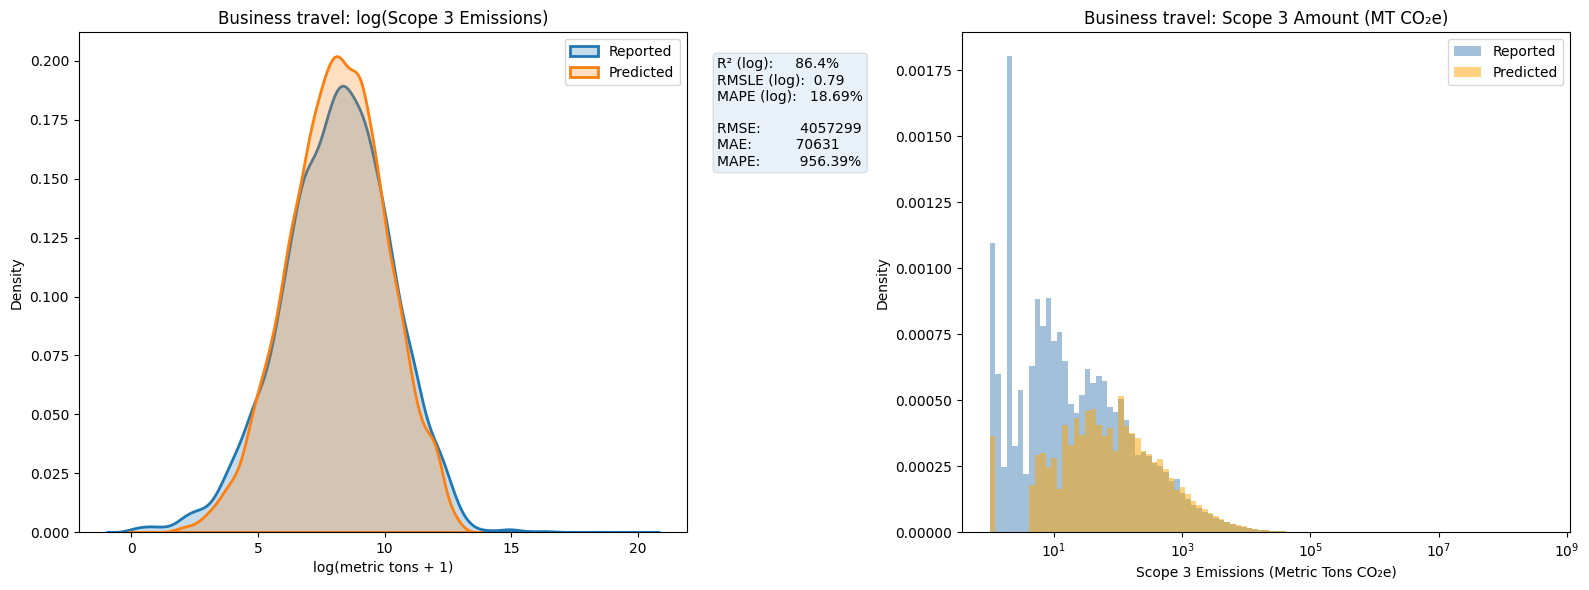

C:\Users\cliff\AppData\Local\Temp\ipykernel_23328\3362459463.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df['weight'] = 1 / (tail_df['Reported_Scope_3'] + 1)


 MAE Before:  70,631.35
 MAE After:   71,113.55
 MAPE Before: 956.39%
 MAPE After:  212.39%
 RMSLE Before: 0.7944
 RMSLE After:  1.7254


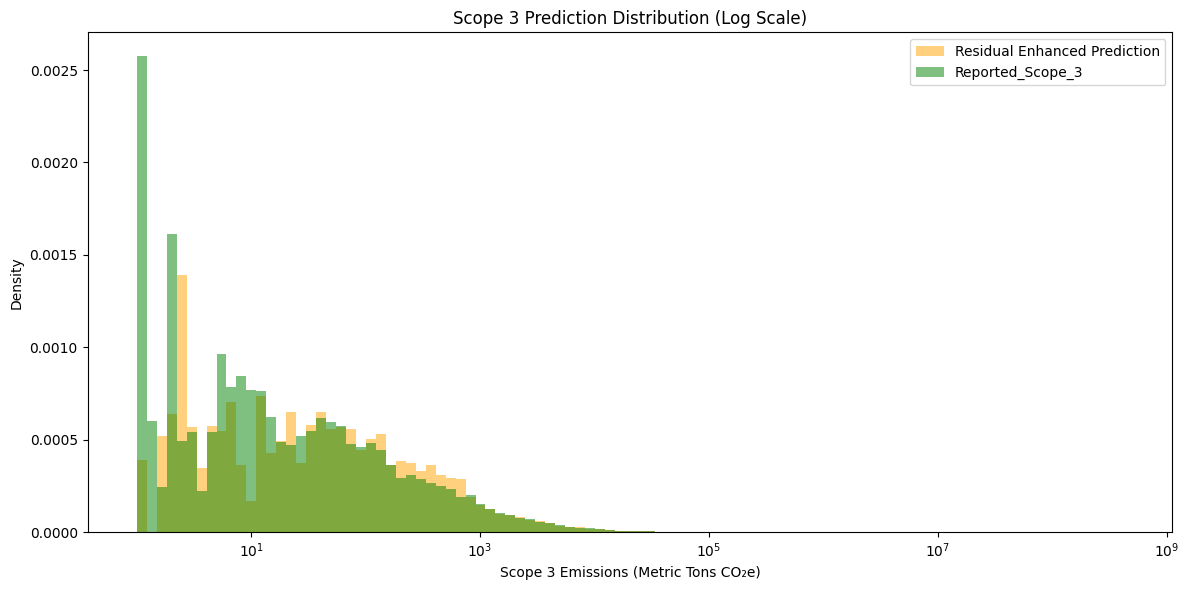

Converged using optimizer: lbfgs for group Capital goods
Variance across Primary_sector: 2.1945

Group: Capital goods --- Top 10 Influential Factors
                                  coef        pvalue
log_Scope_1_2_total_emission  0.360729  1.153235e-93
Company Var                   1.708654  4.464534e-85
C(Country)[T.South Korea]    -3.562195  2.208750e-22
log_Revenue_USD               0.299077  6.537986e-10
C(Country)[T.Hong Kong]      -5.047875  4.179548e-06
C(Year)[T.2019]               0.586238  9.129817e-06
C(Year)[T.2023]               0.555554  1.562692e-05
C(Year)[T.2020]               0.540031  3.580630e-05
log_totalAssets_USD           0.305252  1.018920e-04
C(Year)[T.2021]               0.497162  1.225173e-04


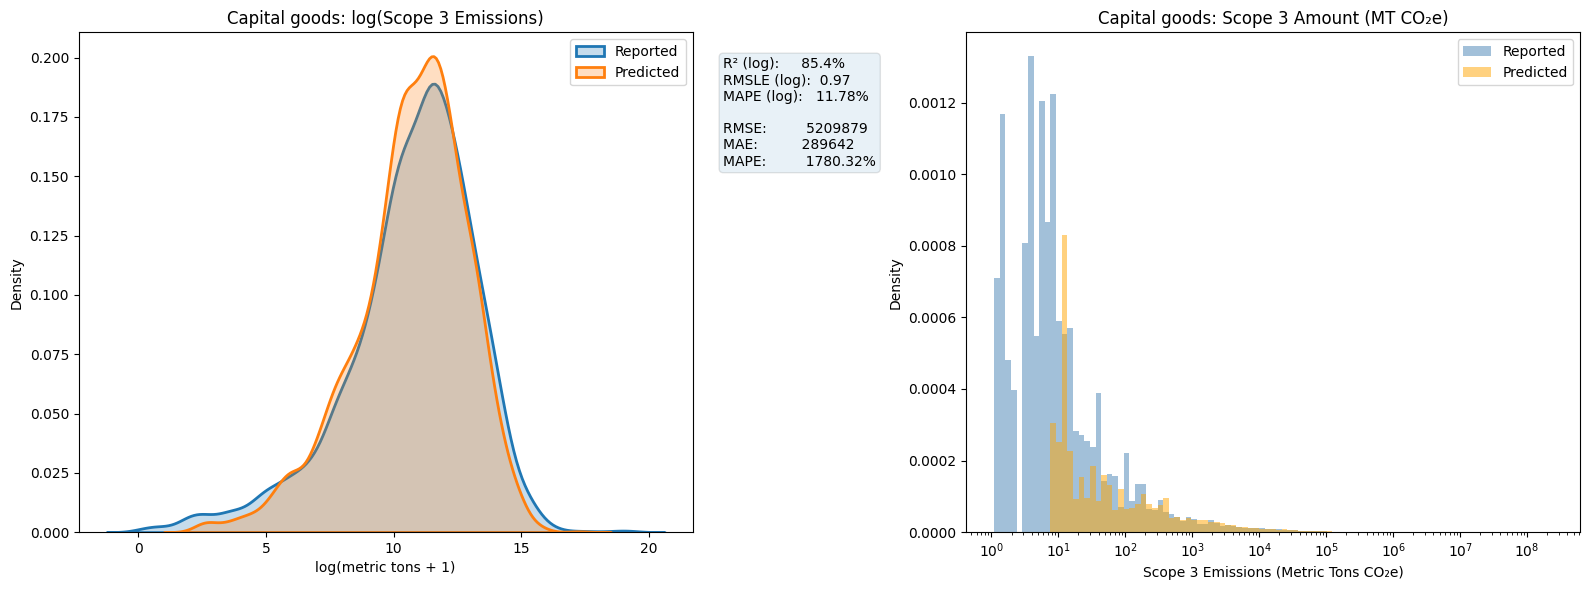

C:\Users\cliff\AppData\Local\Temp\ipykernel_23328\3362459463.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df['weight'] = 1 / (tail_df['Reported_Scope_3'] + 1)


 MAE Before:  289,641.73
 MAE After:   293,685.38
 MAPE Before: 1780.32%
 MAPE After:  409.18%
 RMSLE Before: 0.9720
 RMSLE After:  1.9313


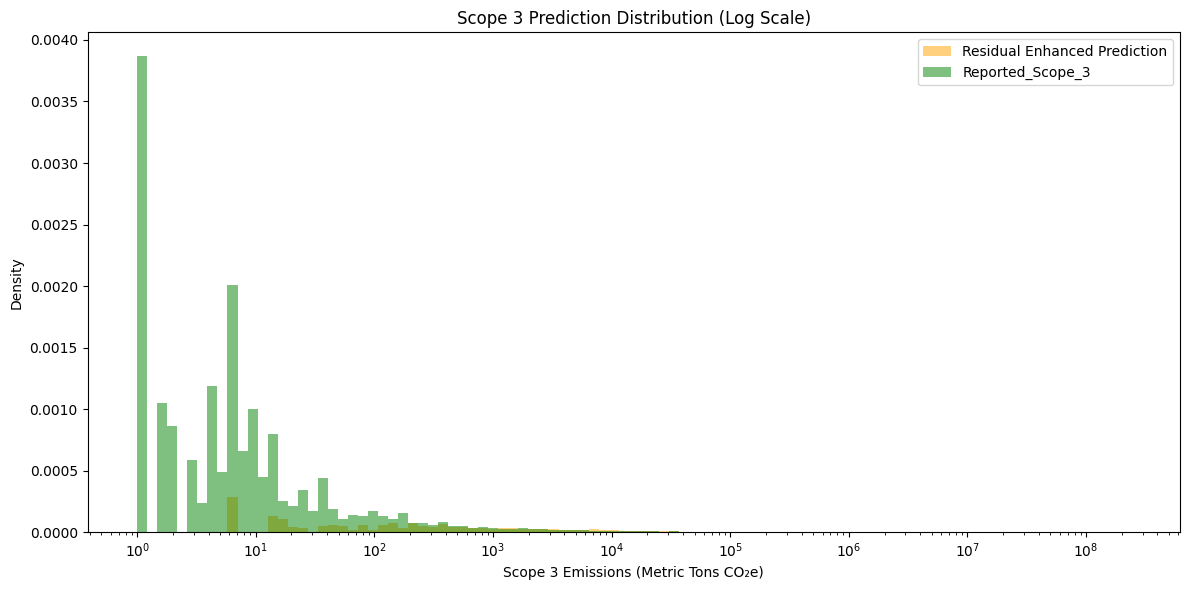

Converged using optimizer: lbfgs for group Downstream leased assets
Variance across Primary_sector: 5.8778

Group: Downstream leased assets --- Top 10 Influential Factors
                                  coef        pvalue
Company Var                   6.158502  4.937683e-43
log_Scope_1_2_total_emission  0.181433  4.203434e-07
log_Revenue_USD              -0.363379  6.736566e-05
log_totalDebt_USD             0.181419  5.731123e-04
C(Country)[T.Hong Kong]      -9.021719  9.432957e-04
log_totalAssets_USD           0.460785  1.107999e-03
C(Country)[T.South Korea]    -2.308451  4.849386e-03
log_grossProfit_USD           0.034233  6.306463e-03
C(Country)[T.Norway]         -3.269663  7.053354e-03
C(Country)[T.Switzerland]    -2.331636  1.168846e-02


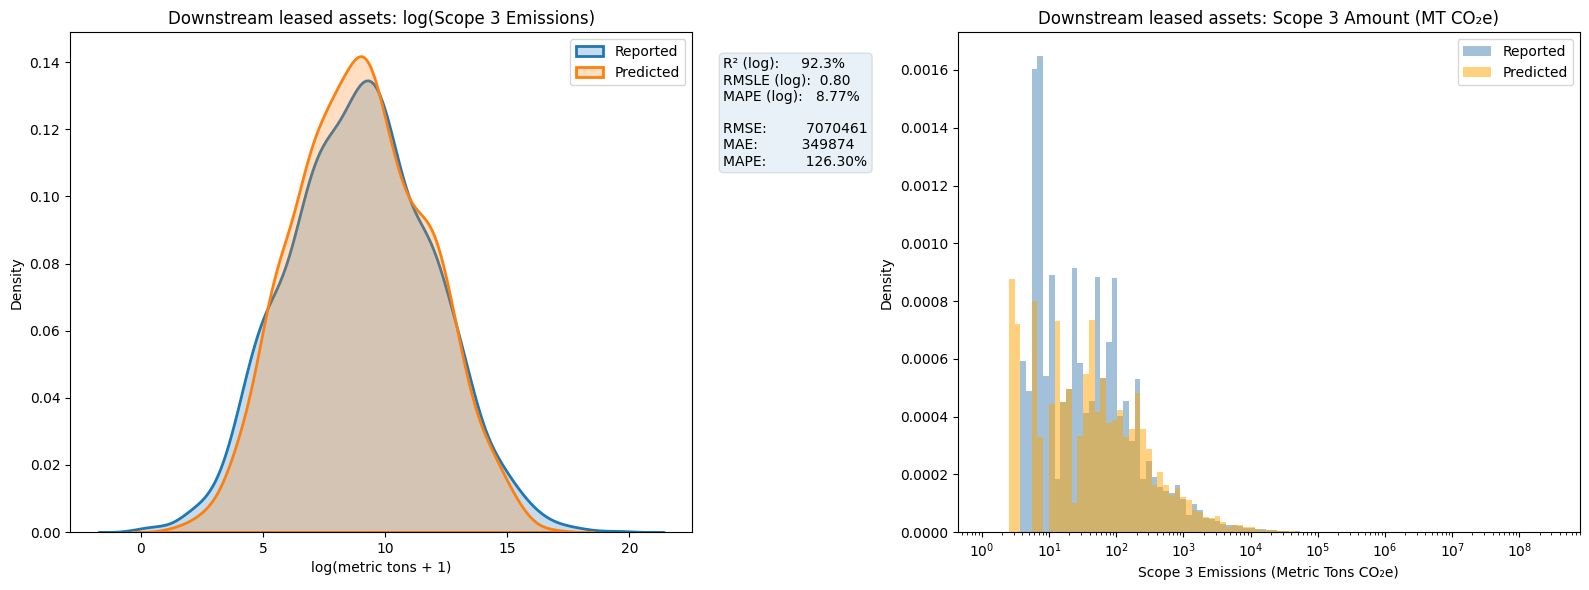

C:\Users\cliff\AppData\Local\Temp\ipykernel_23328\3362459463.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df['weight'] = 1 / (tail_df['Reported_Scope_3'] + 1)


 MAE Before:  349,874.01
 MAE After:   350,175.11
 MAPE Before: 126.30%
 MAPE After:  63.87%
 RMSLE Before: 0.8043
 RMSLE After:  1.8339


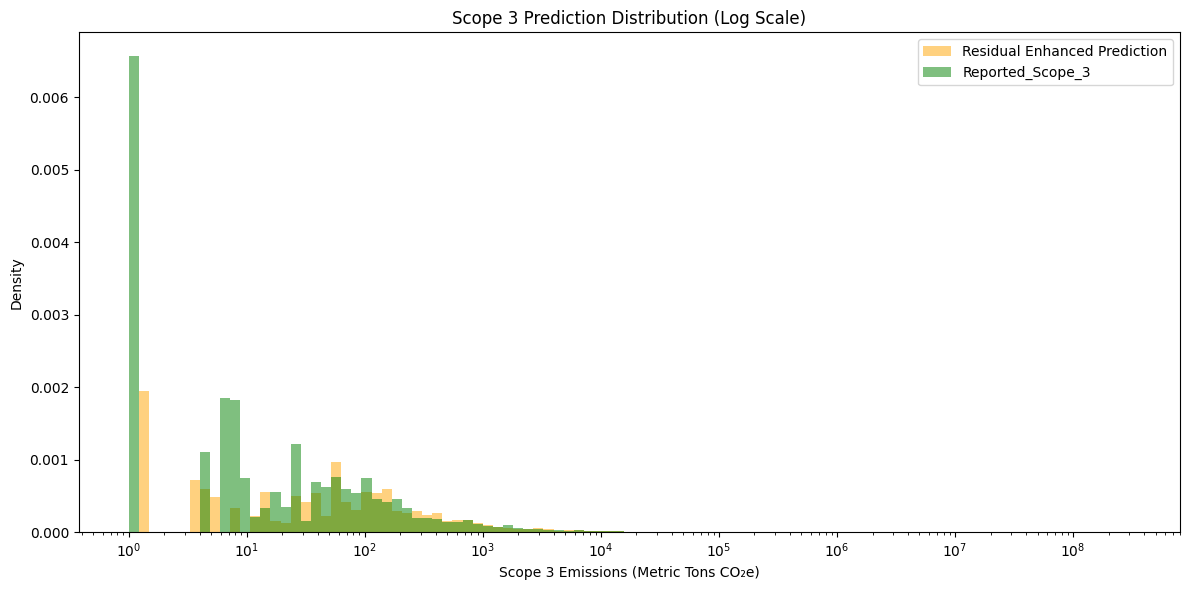

Converged using optimizer: lbfgs for group Downstream transportation and distribution
Variance across Primary_sector: 3.6397

Group: Downstream transportation and distribution --- Top 10 Influential Factors
                                  coef        pvalue
Company Var                   2.534320  9.143347e-83
log_Scope_1_2_total_emission  0.435929  1.508524e-75
log_Revenue_USD               0.650486  1.214555e-19
log_Market_Cap_USD            0.090090  1.520359e-02
C(Country)[T.Turkey]         -6.280086  2.327622e-02
C(Year)[T.2020]               0.223759  5.330940e-02
log_totalAssets_USD          -0.217555  5.836010e-02
C(Country)[T.Bermuda]        -4.844391  7.977724e-02
C(Country)[T.Hungary]        -4.287031  9.386818e-02
C(Year)[T.2018]               0.184829  1.223617e-01


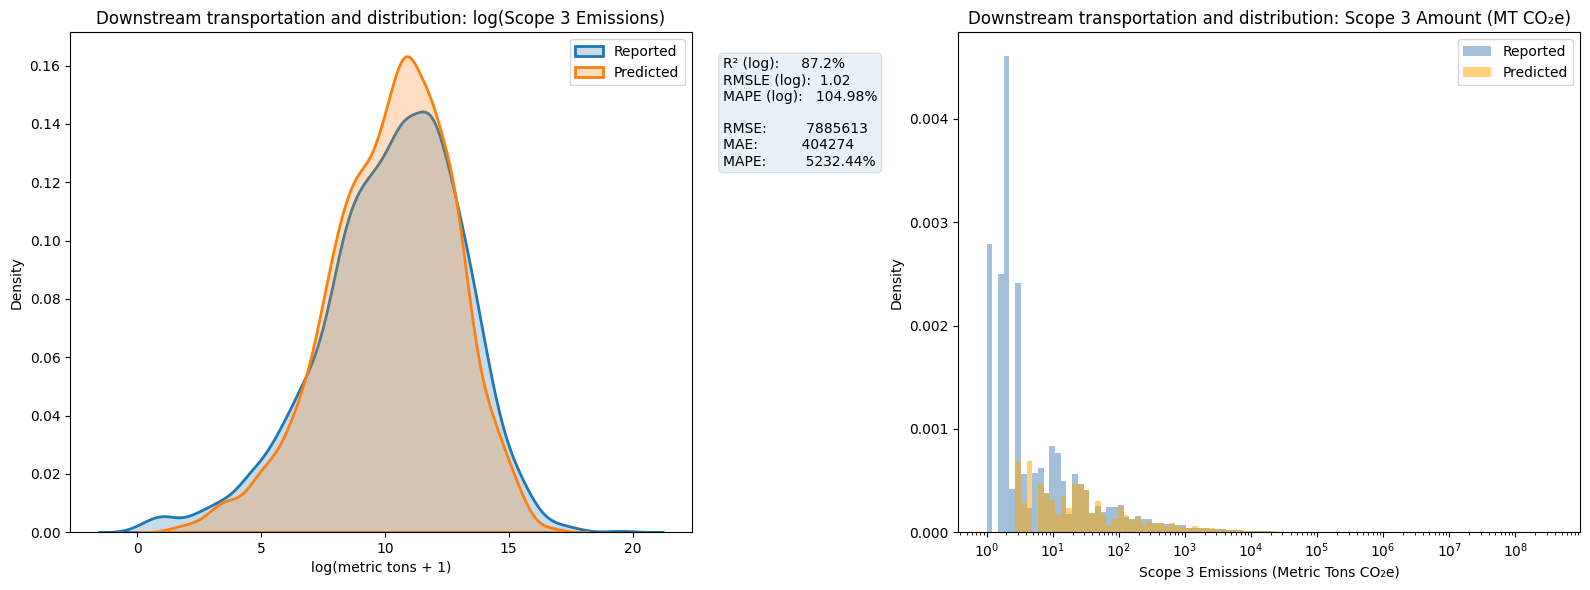

C:\Users\cliff\AppData\Local\Temp\ipykernel_23328\3362459463.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df['weight'] = 1 / (tail_df['Reported_Scope_3'] + 1)


 MAE Before:  404,274.17
 MAE After:   407,618.66
 MAPE Before: 5232.44%
 MAPE After:  1237.20%
 RMSLE Before: 1.0197
 RMSLE After:  2.5332


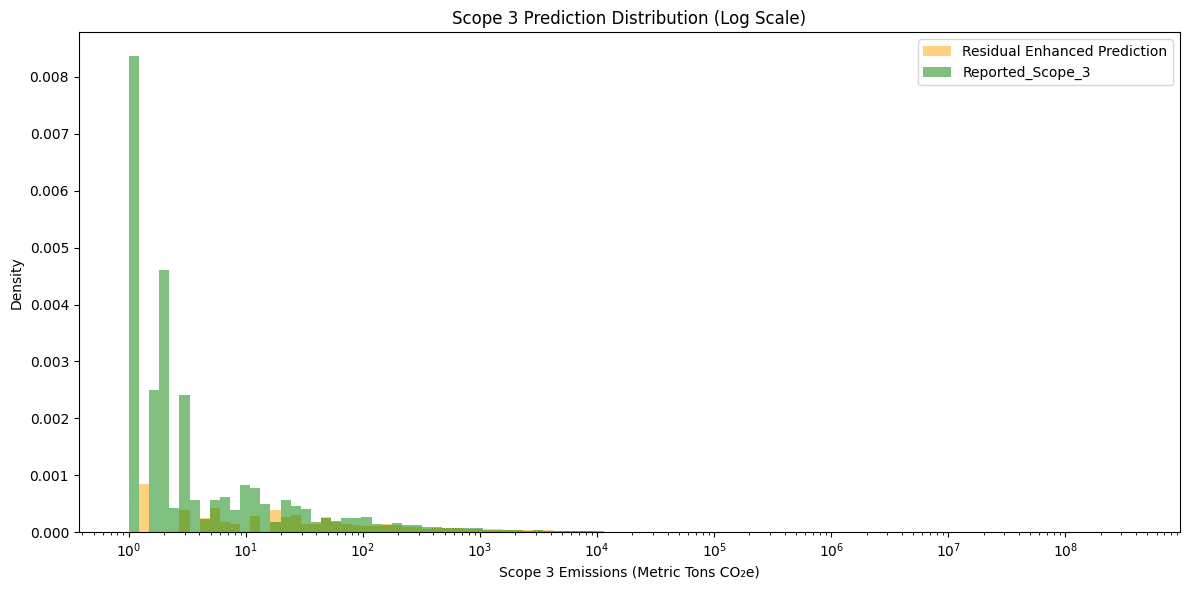

Converged using optimizer: lbfgs for group Employee commuting
Variance across Primary_sector: 1.8600

Group: Employee commuting --- Top 10 Influential Factors
                                    coef         pvalue
Company Var                     2.157315  1.027625e-130
log_Revenue_USD                 0.676822   1.736779e-93
log_Scope_1_2_total_emission    0.174066   2.916820e-49
log_totalAssets_USD            -0.261929   2.814002e-07
log_cashAndCashEquivalents_USD  0.102602   7.114518e-07
C(Year)[T.2020]                 0.287573   6.410241e-05
C(Year)[T.2023]                 0.260121   2.412120e-04
C(Year)[T.2019]                 0.216230   3.114206e-03
C(Country)[T.Hong Kong]        -3.446175   1.032412e-02
C(Year)[T.2018]                 0.190910   1.086332e-02


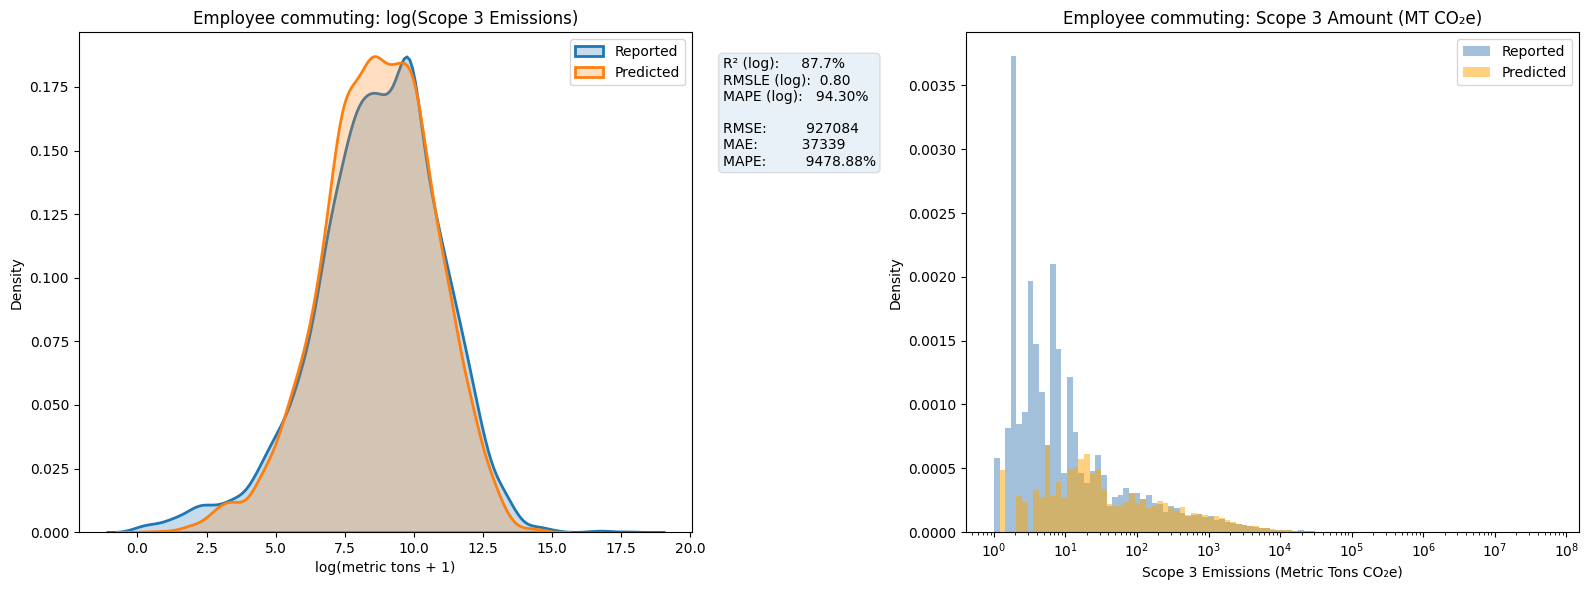

C:\Users\cliff\AppData\Local\Temp\ipykernel_23328\3362459463.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df['weight'] = 1 / (tail_df['Reported_Scope_3'] + 1)


 MAE Before:  37,339.43
 MAE After:   37,848.51
 MAPE Before: 9478.88%
 MAPE After:  1030.23%
 RMSLE Before: 0.7987
 RMSLE After:  1.4890


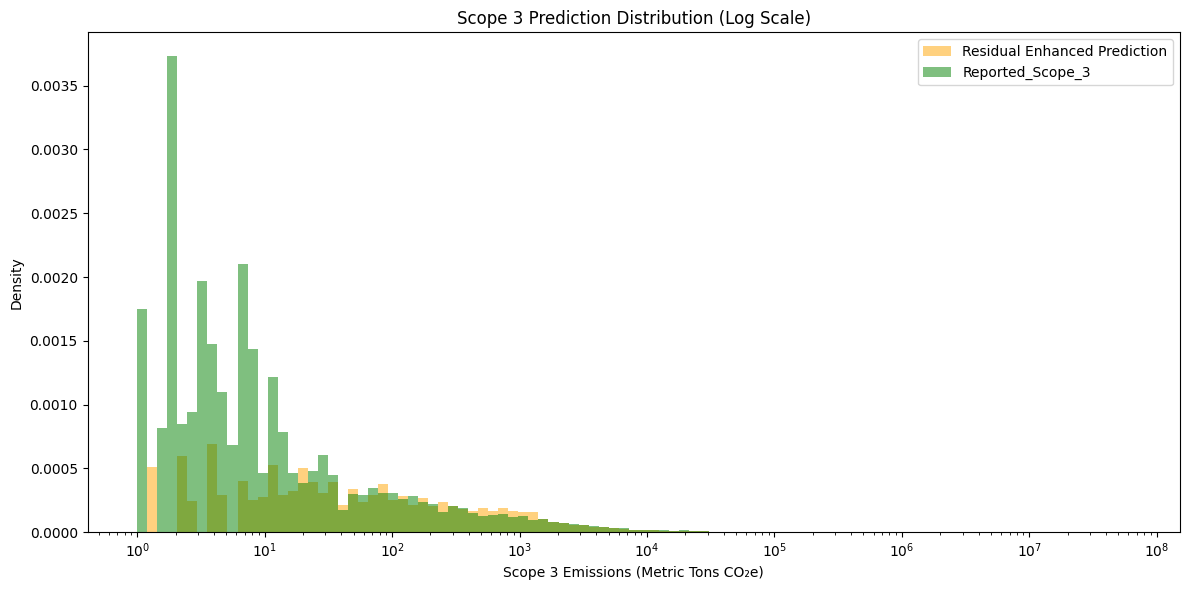

Converged using optimizer: lbfgs for group End of life treatment of sold products
Variance across Primary_sector: 5.7380

Group: End of life treatment of sold products --- Top 10 Influential Factors
                                  coef        pvalue
Company Var                   3.541964  1.007932e-71
log_Scope_1_2_total_emission  0.531558  5.080443e-58
log_Revenue_USD               1.083312  6.002677e-25
C(Year)[T.2023]               0.960808  1.202797e-09
C(Year)[T.2020]               0.909632  1.403862e-08
C(Year)[T.2022]               0.765862  1.115583e-06
C(Year)[T.2019]               0.736371  5.002635e-06
C(Year)[T.2021]               0.716534  6.423693e-06
C(Year)[T.2018]               0.725992  9.619890e-06
log_totalAssets_USD          -0.504868  3.118502e-04


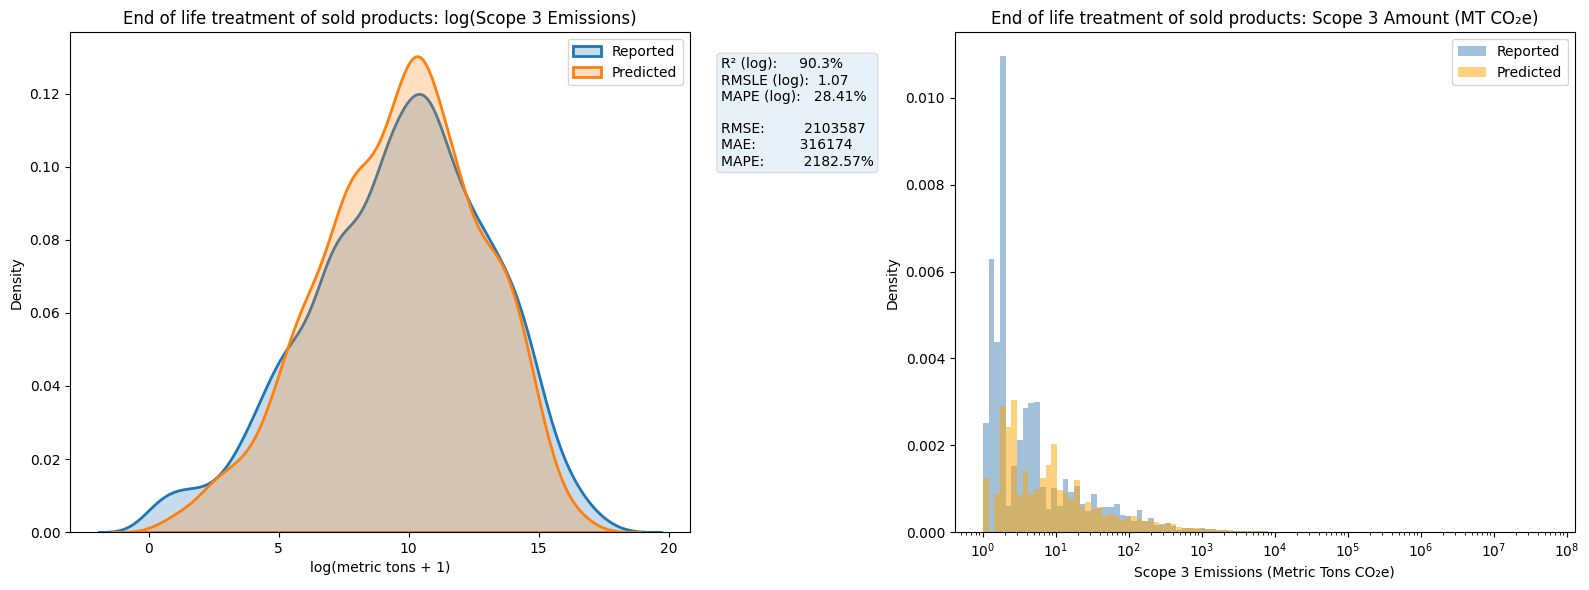

C:\Users\cliff\AppData\Local\Temp\ipykernel_23328\3362459463.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df['weight'] = 1 / (tail_df['Reported_Scope_3'] + 1)


 MAE Before:  316,174.10
 MAE After:   316,871.67
 MAPE Before: 2182.57%
 MAPE After:  739.34%
 RMSLE Before: 1.0694
 RMSLE After:  2.0047


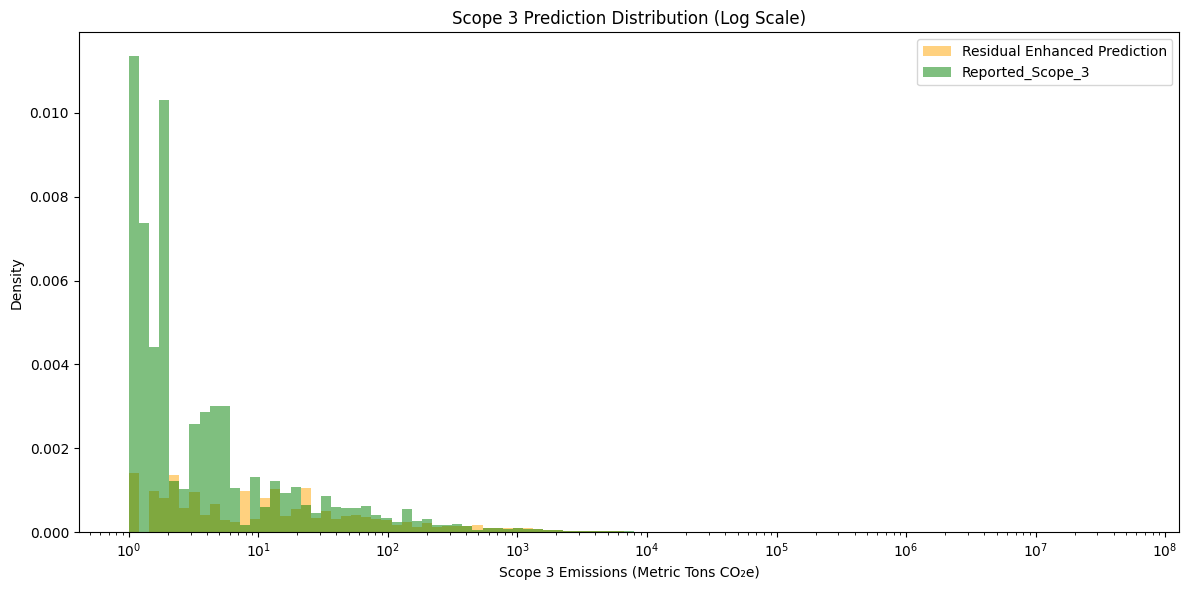

Converged using optimizer: lbfgs for group Franchises
Variance across Primary_sector: 5.3658

Group: Franchises --- Top 10 Influential Factors
                                    coef        pvalue
Company Var                     9.072984  4.471518e-16
log_Scope_1_2_total_emission    0.253068  2.634145e-04
C(Year)[T.2018]                 0.604104  1.539637e-02
C(Year)[T.2023]                 0.442387  7.035869e-02
C(Year)[T.2017]                 0.383042  1.113677e-01
C(Year)[T.2020]                 0.362165  1.451553e-01
C(Year)[T.2022]                 0.349158  1.487880e-01
log_cashAndCashEquivalents_USD  0.111432  1.511515e-01
C(Country)[T.Singapore]        -4.083193  1.708825e-01
log_Market_Cap_USD             -0.118330  1.713968e-01


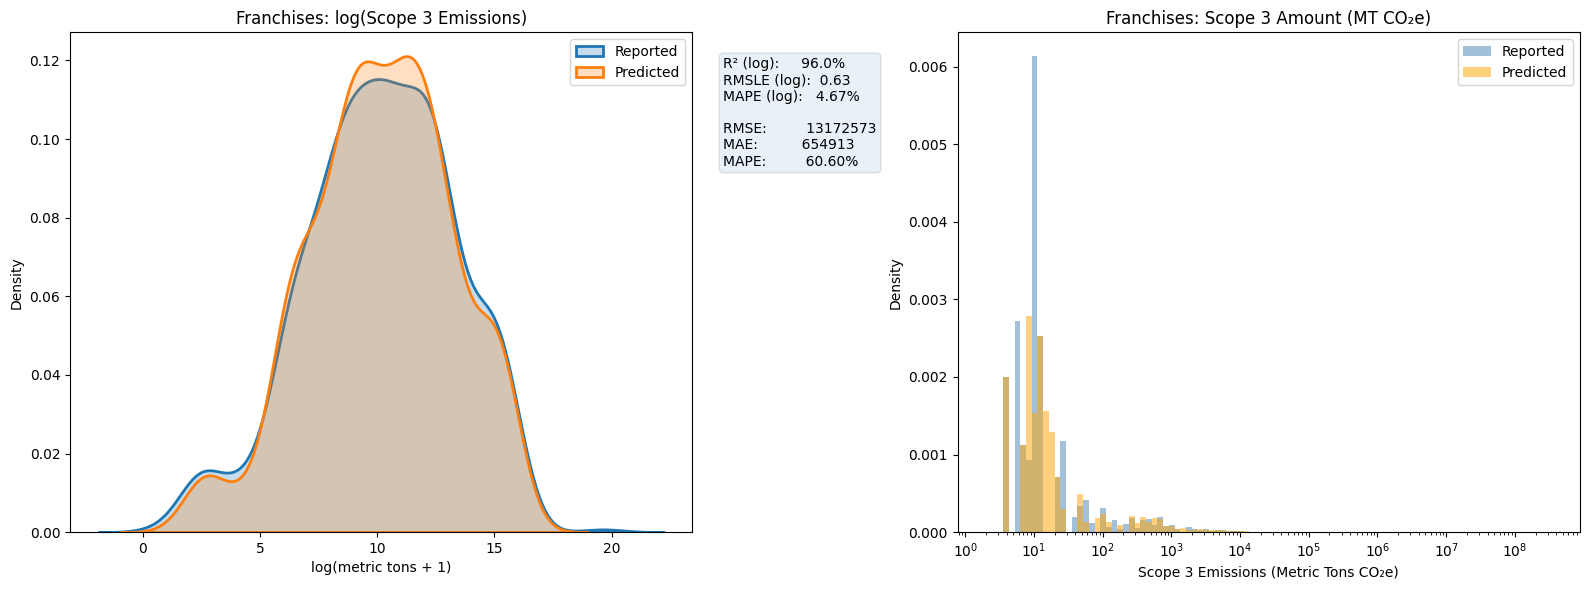

C:\Users\cliff\AppData\Local\Temp\ipykernel_23328\3362459463.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df['weight'] = 1 / (tail_df['Reported_Scope_3'] + 1)


 MAE Before:  654,913.39
 MAE After:   656,057.91
 MAPE Before: 60.60%
 MAPE After:  49.59%
 RMSLE Before: 0.6290
 RMSLE After:  1.8410


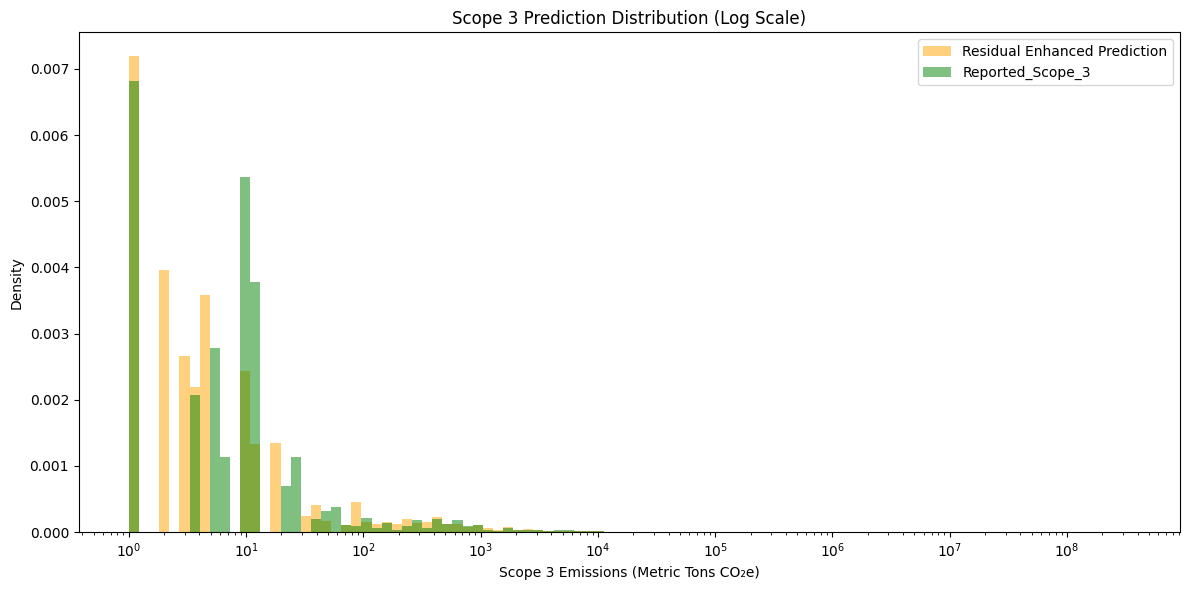

Converged using optimizer: lbfgs for group Fuel-and-energy-related activities (not included in Scope 1 or 2)
Variance across Primary_sector: 1.3741

Group: Fuel-and-energy-related activities (not included in Scope 1 or 2) --- Top 10 Influential Factors
                                  coef         pvalue
log_Scope_1_2_total_emission  0.745306   0.000000e+00
Company Var                   1.314048  6.904041e-109
C(Year)[T.2023]               0.866803   1.432493e-27
C(Year)[T.2022]               0.773711   2.563367e-22
C(Year)[T.2021]               0.710030   9.313333e-19
C(Year)[T.2020]               0.689028   1.723461e-17
log_Revenue_USD               0.263799   4.871987e-17
C(Year)[T.2019]               0.621938   3.184407e-14
C(Year)[T.2018]               0.618065   1.630625e-13
log_grossProfit_USD          -0.019265   9.432842e-07


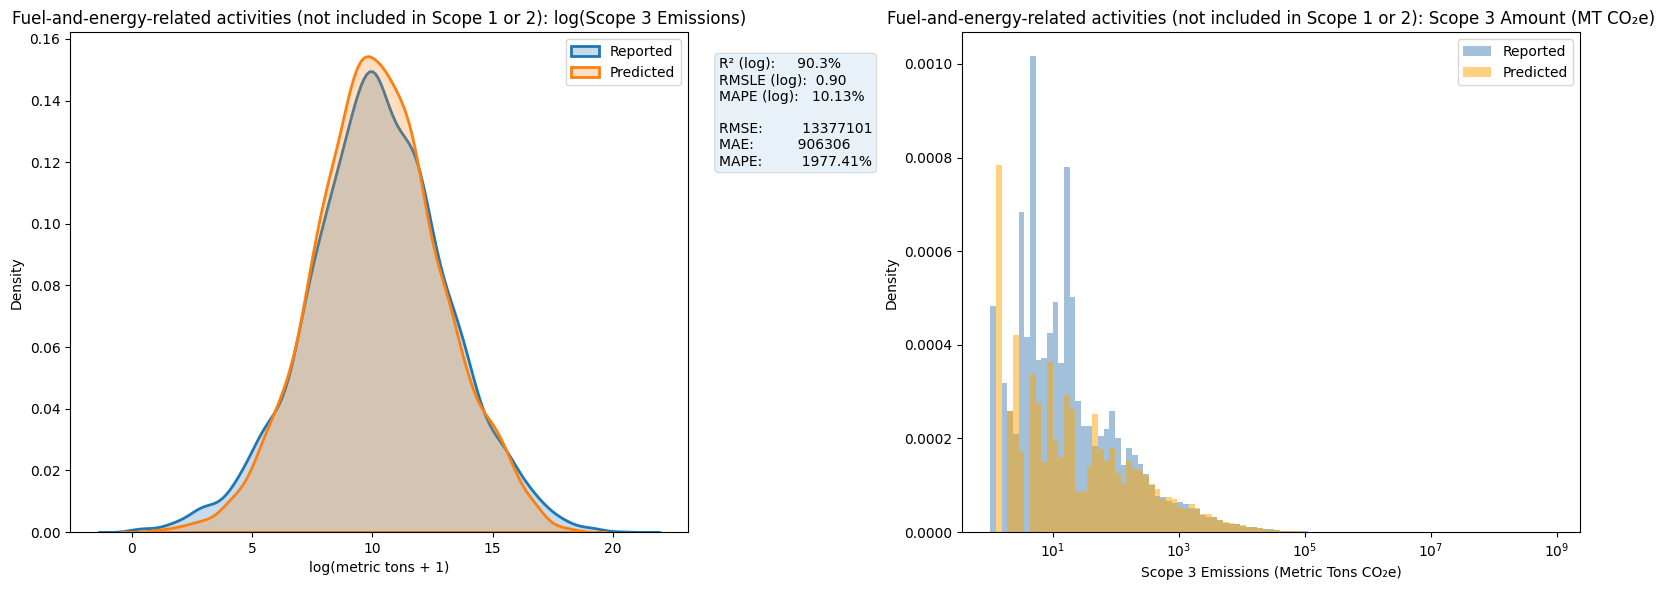

C:\Users\cliff\AppData\Local\Temp\ipykernel_23328\3362459463.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df['weight'] = 1 / (tail_df['Reported_Scope_3'] + 1)


 MAE Before:  906,306.31
 MAE After:   912,596.89
 MAPE Before: 1977.41%
 MAPE After:  471.02%
 RMSLE Before: 0.8980
 RMSLE After:  2.1379


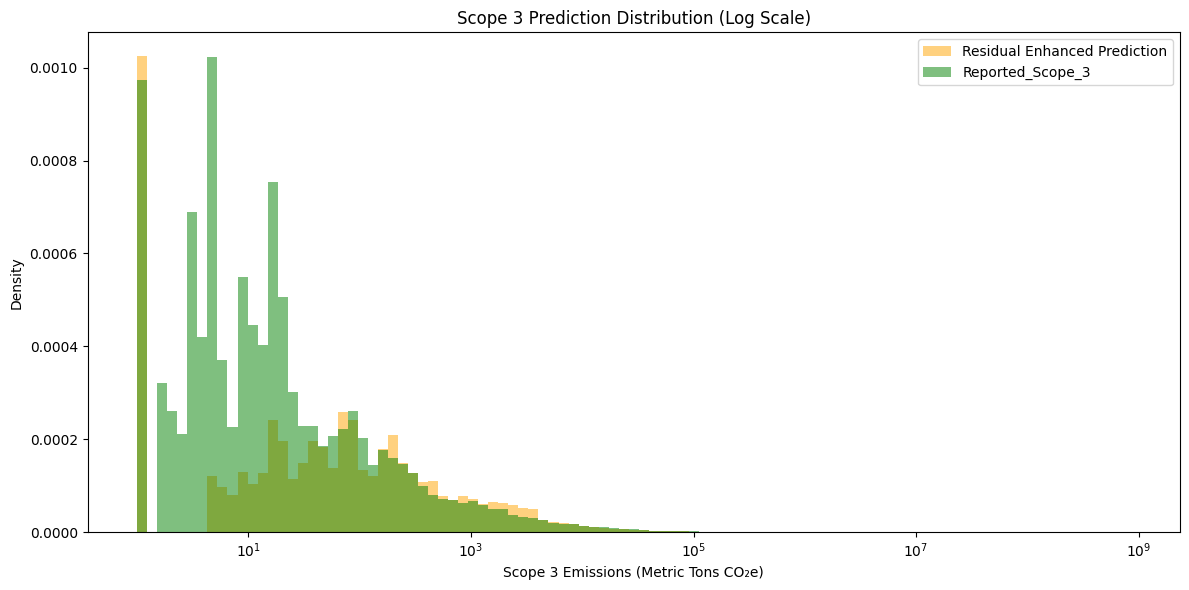

Converged using optimizer: lbfgs for group Investments
Variance across Primary_sector: 5.7190

Group: Investments --- Top 10 Influential Factors
                                  coef        pvalue
Company Var                   3.844177  3.629334e-38
log_Scope_1_2_total_emission  0.348879  1.270083e-19
log_totalAssets_USD           0.766402  1.806903e-05
log_Market_Cap_USD           -0.183467  7.477959e-03
C(Country)[T.New Zealand]    -2.248912  2.052367e-02
C(Country)[T.South Africa]    1.846122  2.691768e-02
C(Country)[T.Sweden]         -1.775493  5.980239e-02
C(Country)[T.Norway]          1.592226  7.264970e-02
C(Country)[T.Thailand]        1.730263  8.217952e-02
log_Revenue_USD               0.188304  1.076619e-01


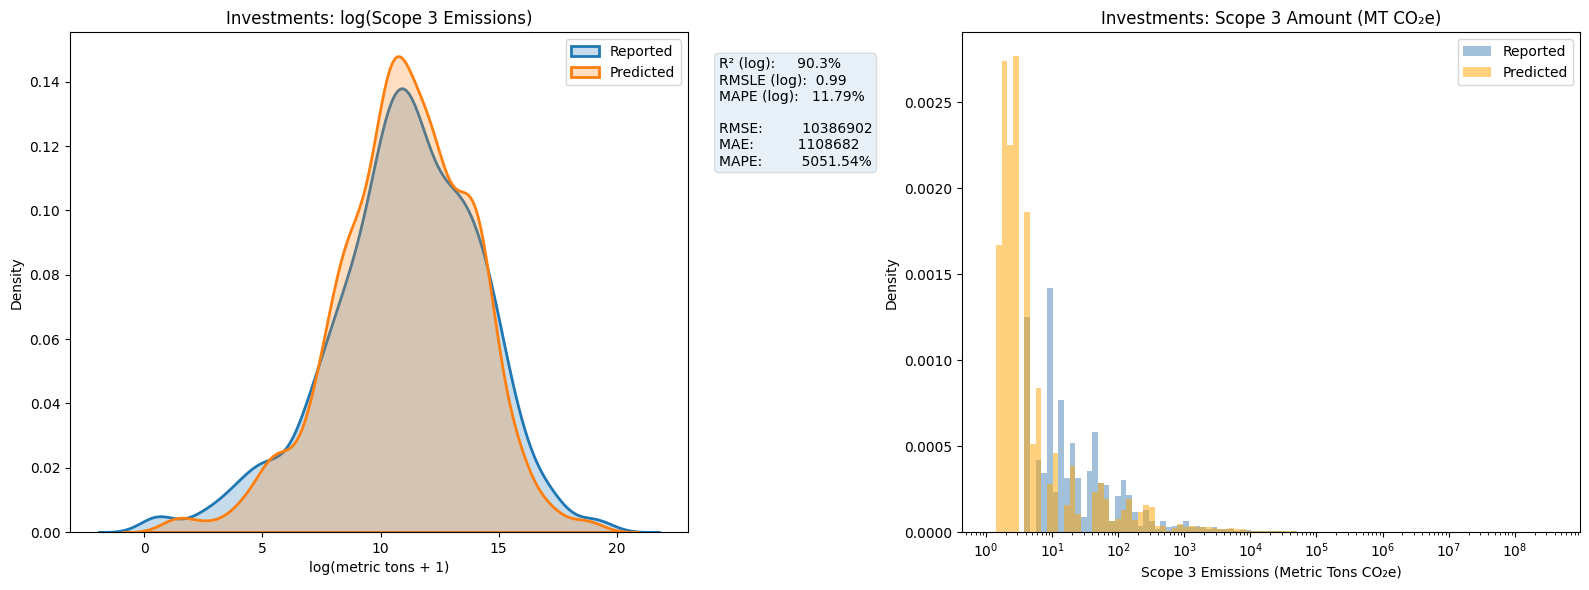

C:\Users\cliff\AppData\Local\Temp\ipykernel_23328\3362459463.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df['weight'] = 1 / (tail_df['Reported_Scope_3'] + 1)


 MAE Before:  1,108,682.35
 MAE After:   1,112,690.09
 MAPE Before: 5051.54%
 MAPE After:  1340.47%
 RMSLE Before: 0.9912
 RMSLE After:  2.5300


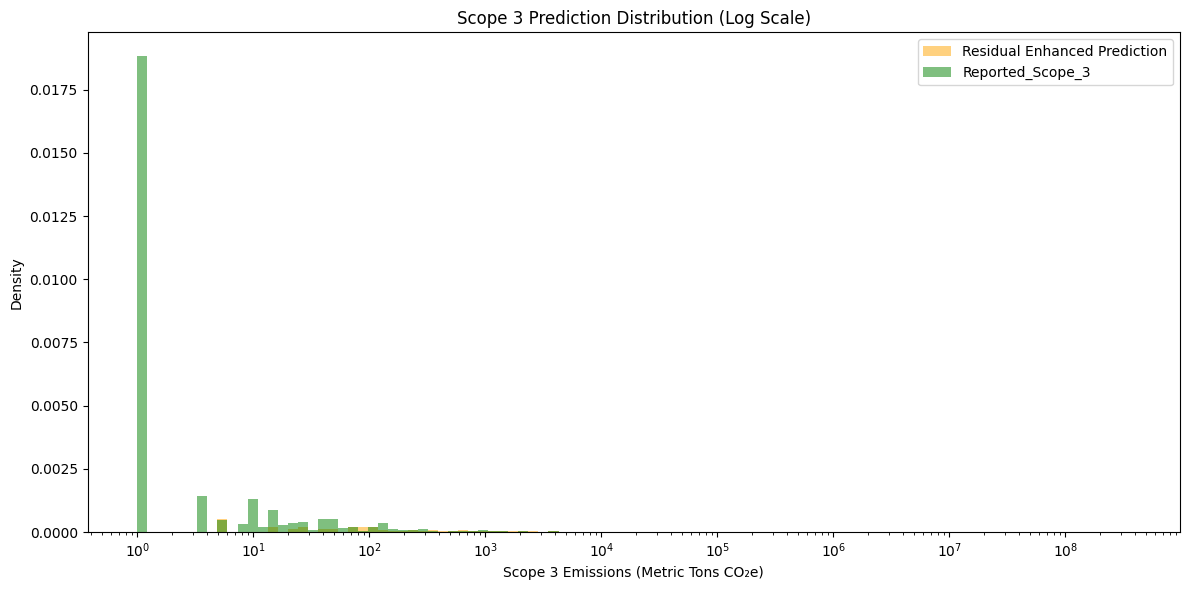

Converged using optimizer: lbfgs for group Other (downstream)
Variance across Primary_sector: 9.5347

Group: Other (downstream) --- Top 10 Influential Factors
                                   coef        pvalue
Company Var                   21.015224  4.960986e-10
C(Country)[T.Spain]            7.938474  3.976519e-04
C(Country)[T.Denmark]          8.910197  5.690268e-04
C(Country)[T.France]           4.902656  6.575342e-04
C(Country)[T.Sweden]           8.256481  1.474081e-03
C(Country)[T.Turkey]           7.706802  2.857359e-03
C(Country)[T.South Korea]      5.394654  3.549449e-03
C(Year)[T.2018]                0.624295  1.338654e-02
C(Country)[T.Canada]           4.114816  1.679371e-02
log_Scope_1_2_total_emission   0.187384  1.737366e-02


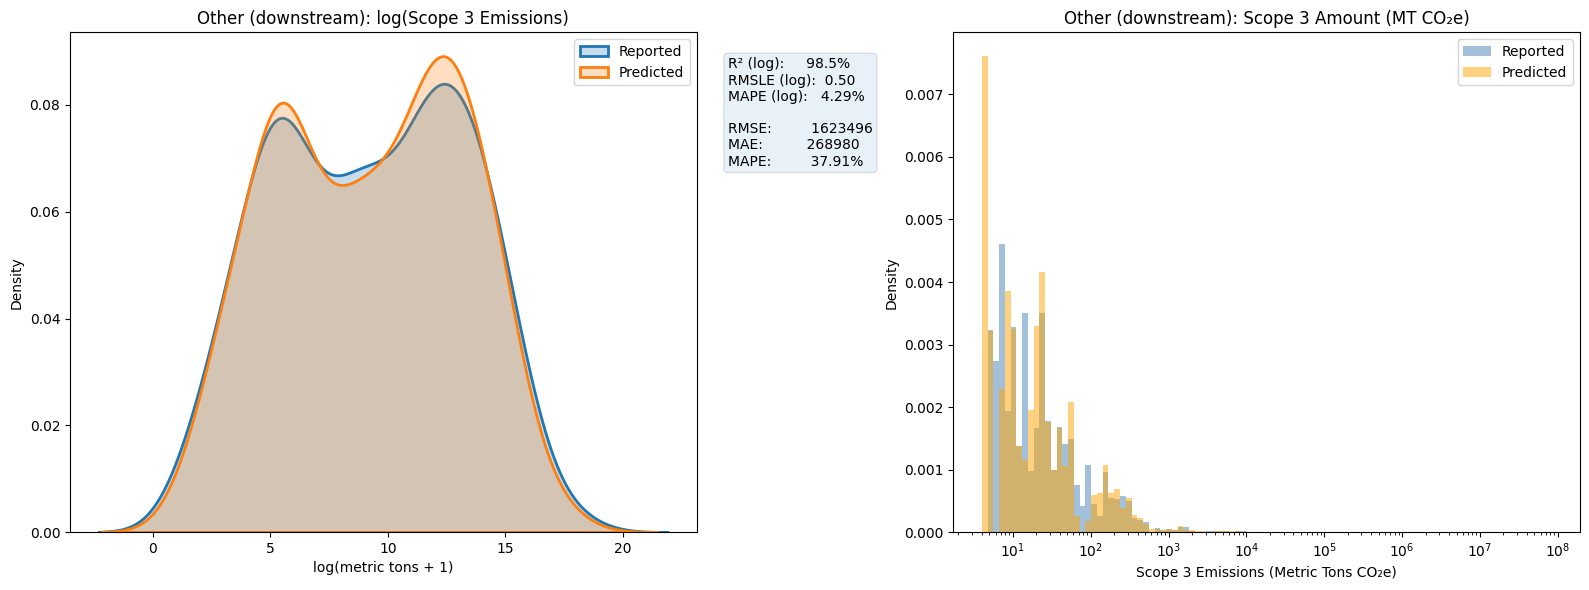

C:\Users\cliff\AppData\Local\Temp\ipykernel_23328\3362459463.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df['weight'] = 1 / (tail_df['Reported_Scope_3'] + 1)


 MAE Before:  268,979.94
 MAE After:   268,982.54
 MAPE Before: 37.91%
 MAPE After:  32.77%
 RMSLE Before: 0.4954
 RMSLE After:  0.5038


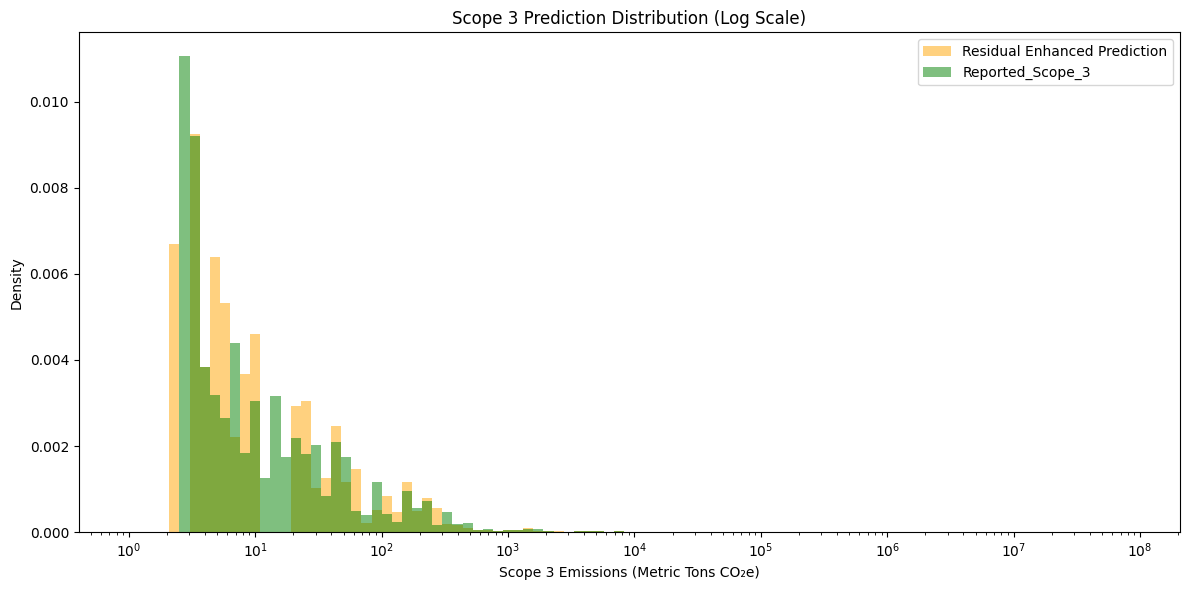

Converged using optimizer: lbfgs for group Other (upstream)
Variance across Primary_sector: 7.0565

Group: Other (upstream) --- Top 10 Influential Factors
                                  coef        pvalue
log_Scope_1_2_total_emission  0.566362  6.956127e-12
Company Var                   5.552853  2.194406e-11
C(Country)[T.Netherlands]     5.116983  1.770531e-03
C(Year)[T.2014]              -0.748328  1.039133e-02
log_totalDebt_USD             0.224225  3.147776e-02
C(Country)[T.New Zealand]     5.868877  4.354624e-02
C(Country)[T.Germany]         2.475300  4.937350e-02
C(Country)[T.USA]             1.719898  6.467472e-02
C(Country)[T.France]          1.631759  7.944459e-02
log_Market_Cap_USD            0.231101  1.010825e-01


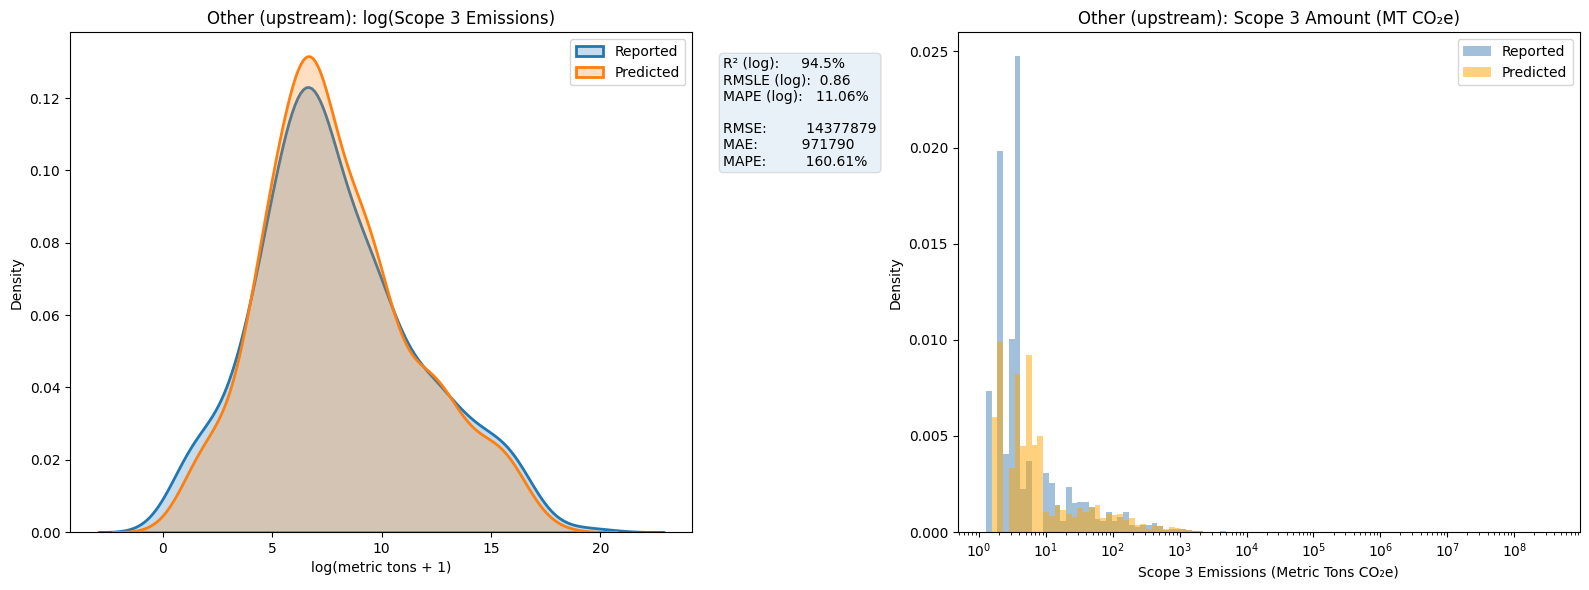

C:\Users\cliff\AppData\Local\Temp\ipykernel_23328\3362459463.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df['weight'] = 1 / (tail_df['Reported_Scope_3'] + 1)


 MAE Before:  971,789.93
 MAE After:   971,798.37
 MAPE Before: 160.61%
 MAPE After:  85.70%
 RMSLE Before: 0.8627
 RMSLE After:  1.0594


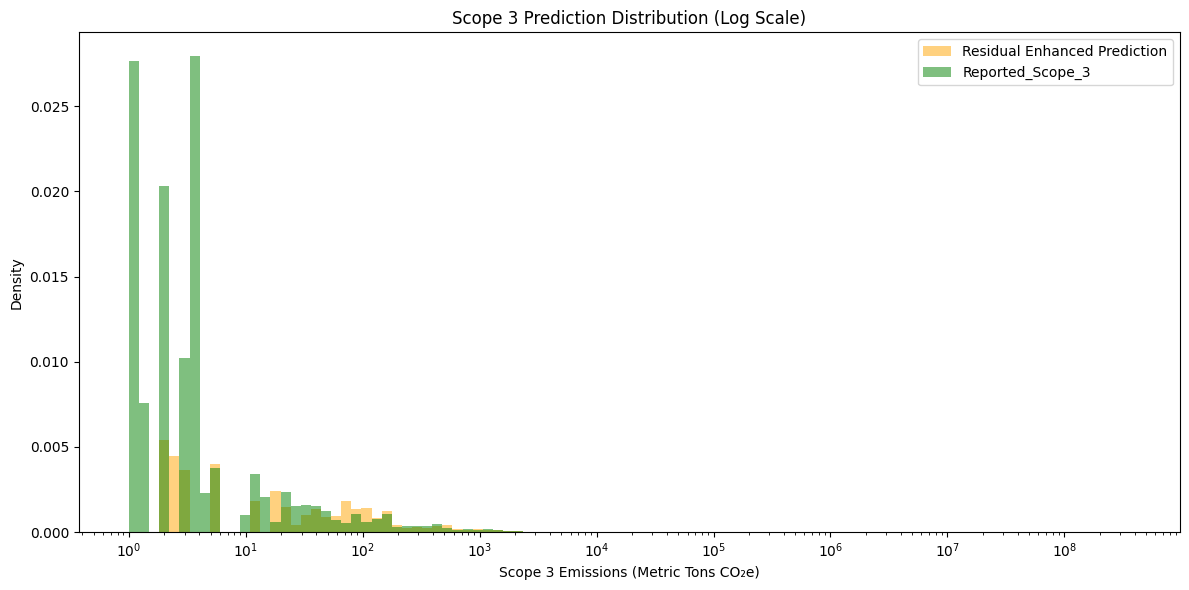

Converged using optimizer: lbfgs for group Processing of sold products
Variance across Primary_sector: 7.6833

Group: Processing of sold products --- Top 10 Influential Factors
                                    coef        pvalue
Company Var                     5.723759  2.783236e-28
log_Scope_1_2_total_emission    0.712807  1.727914e-26
C(Year)[T.2020]                 0.938051  4.678781e-04
C(Year)[T.2021]                 0.888497  8.349958e-04
C(Year)[T.2019]                 0.811168  2.411709e-03
C(Year)[T.2018]                 0.763516  4.961073e-03
C(Year)[T.2022]                 0.713379  6.605238e-03
C(Year)[T.2015]                 0.739962  8.668506e-03
log_cashAndCashEquivalents_USD -0.224335  9.031158e-03
C(Year)[T.2023]                 0.638173  1.569658e-02


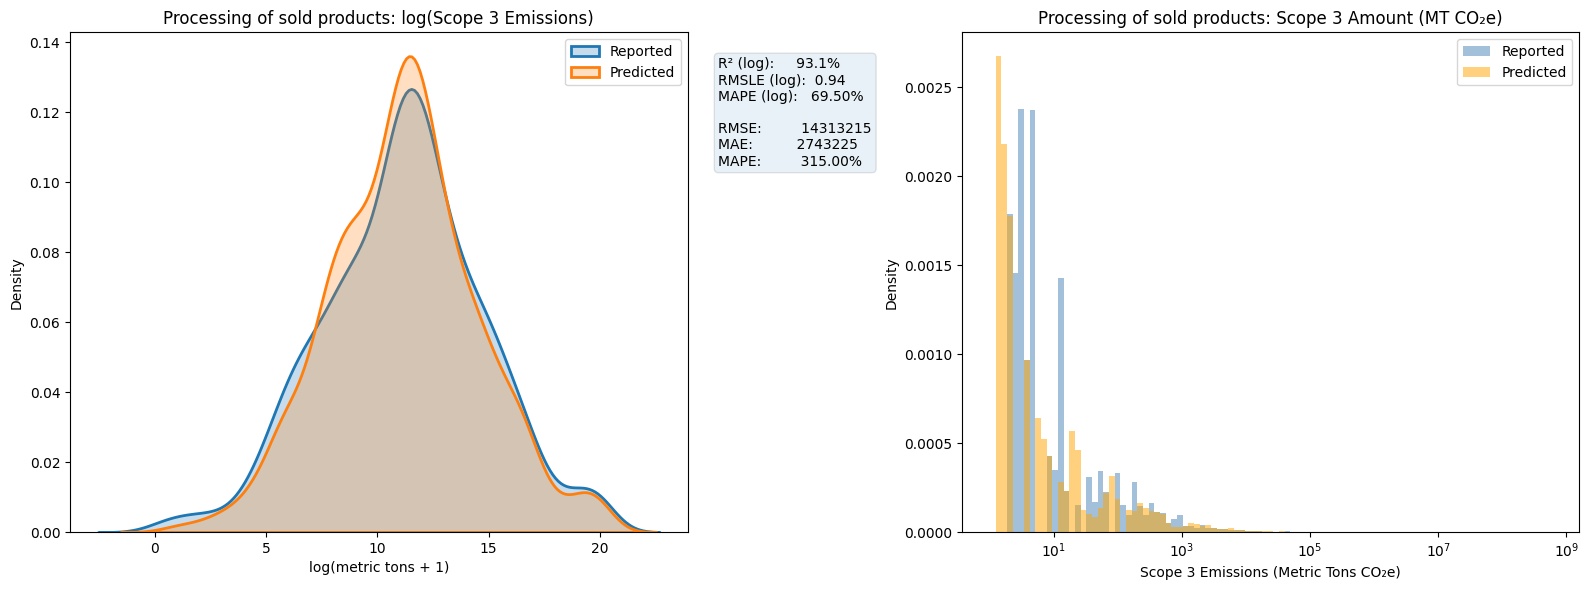

C:\Users\cliff\AppData\Local\Temp\ipykernel_23328\3362459463.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df['weight'] = 1 / (tail_df['Reported_Scope_3'] + 1)


 MAE Before:  2,743,224.71
 MAE After:   2,743,560.46
 MAPE Before: 315.00%
 MAPE After:  85.65%
 RMSLE Before: 0.9434
 RMSLE After:  1.6995


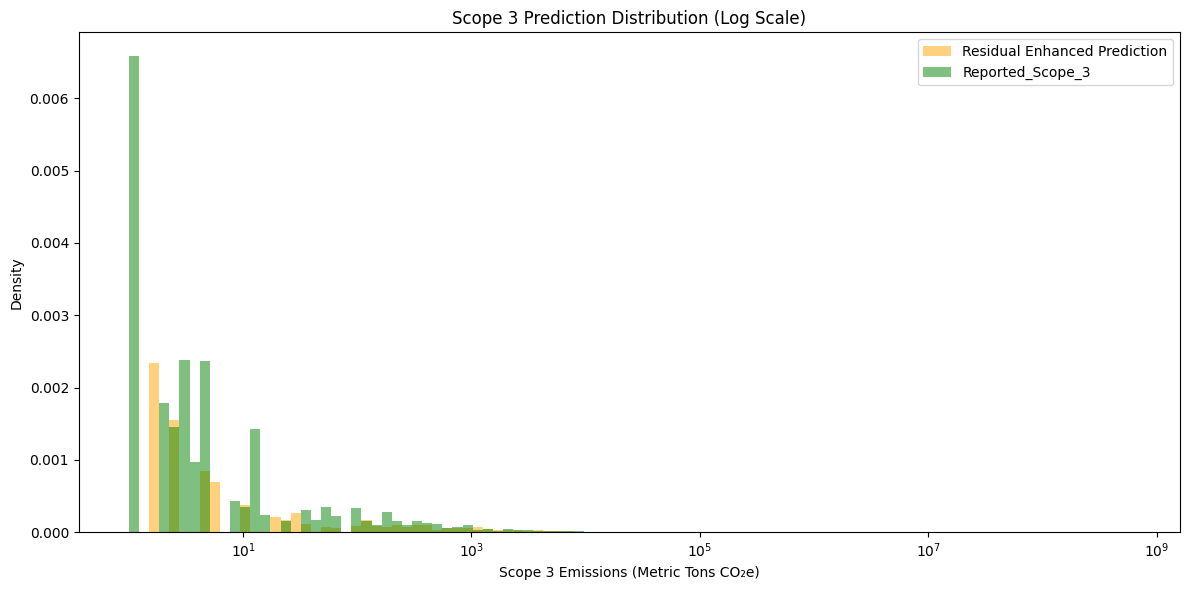

Converged using optimizer: lbfgs for group Purchased goods and services
Variance across Primary_sector: 4.1719

Group: Purchased goods and services --- Top 10 Influential Factors
                                  coef         pvalue
log_Scope_1_2_total_emission  0.452013  5.772642e-162
Company Var                   2.530537  4.548646e-146
log_Revenue_USD               0.980526   8.985992e-98
C(Year)[T.2023]               1.315440   2.553096e-44
C(Year)[T.2022]               1.130439   1.569312e-33
C(Year)[T.2021]               0.963568   2.083032e-24
C(Year)[T.2020]               0.952636   1.579935e-23
log_totalAssets_USD          -0.620942   3.113677e-20
C(Year)[T.2019]               0.763460   2.115909e-15
C(Year)[T.2018]               0.736099   6.435004e-14


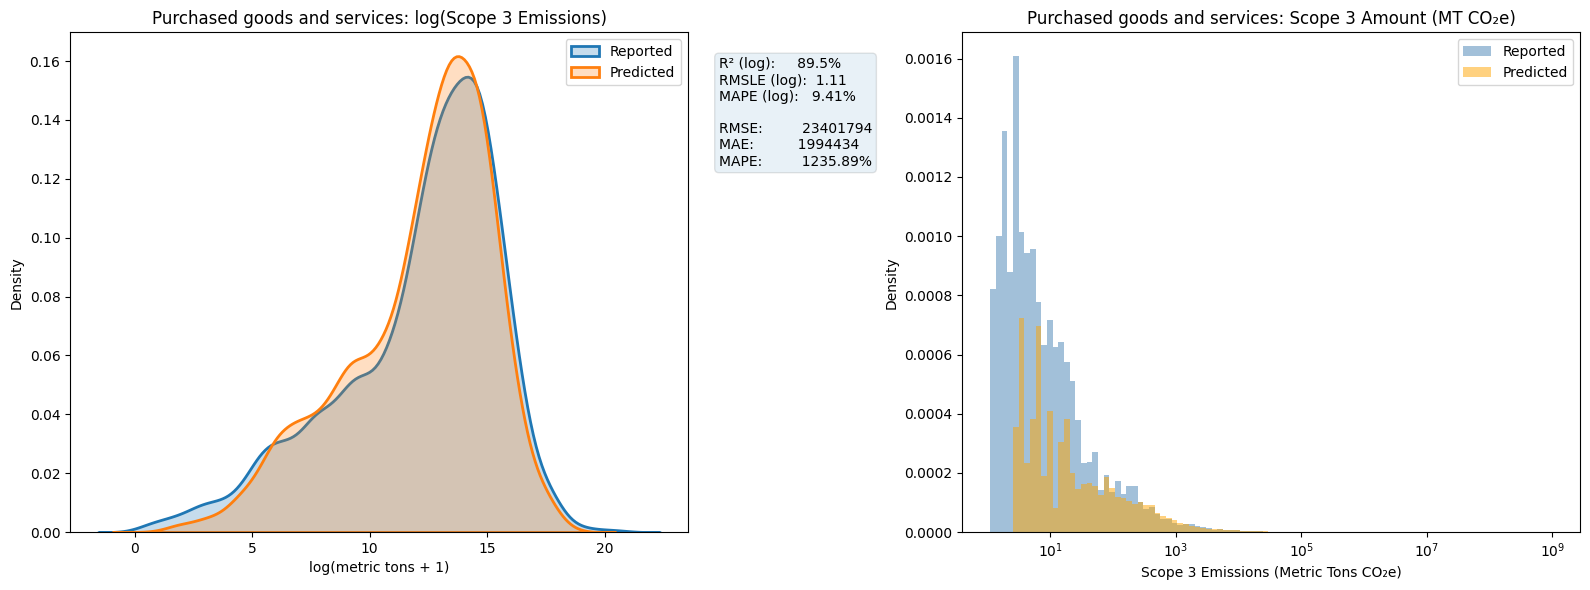

C:\Users\cliff\AppData\Local\Temp\ipykernel_23328\3362459463.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df['weight'] = 1 / (tail_df['Reported_Scope_3'] + 1)


 MAE Before:  1,994,433.52
 MAE After:   2,046,200.23
 MAPE Before: 1235.89%
 MAPE After:  430.64%
 RMSLE Before: 1.1067
 RMSLE After:  2.8386


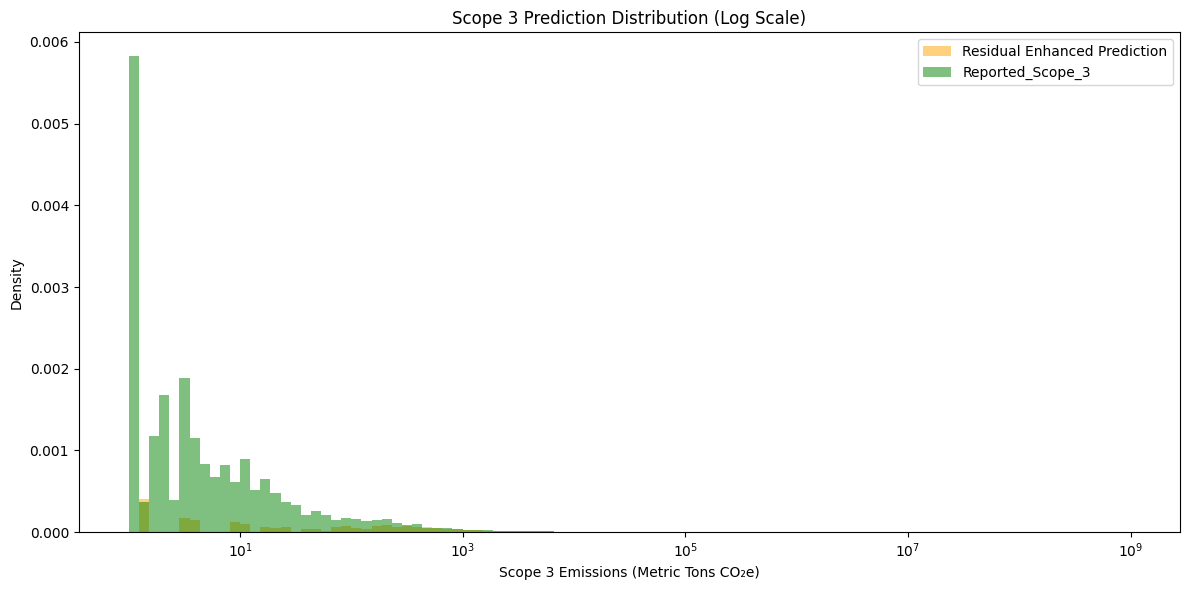

Converged using optimizer: lbfgs for group Upstream leased assets
Variance across Primary_sector: 3.7335

Group: Upstream leased assets --- Top 10 Influential Factors
                                  coef        pvalue
Company Var                   2.862705  2.280877e-37
log_Revenue_USD               0.592499  1.456649e-10
C(Country)[T.South Korea]    -2.601284  5.220230e-06
C(Country)[T.Japan]          -1.938542  9.218870e-05
log_Scope_1_2_total_emission  0.111002  4.501763e-04
C(Year)[T.2022]              -0.595280  6.986011e-04
C(Country)[T.Taiwan]         -2.051768  8.288273e-04
C(Country)[T.Bermuda]         6.601631  2.096872e-03
C(Country)[T.Canada]         -1.814161  2.327110e-03
C(Country)[T.United Kingdom] -1.589935  2.497302e-03


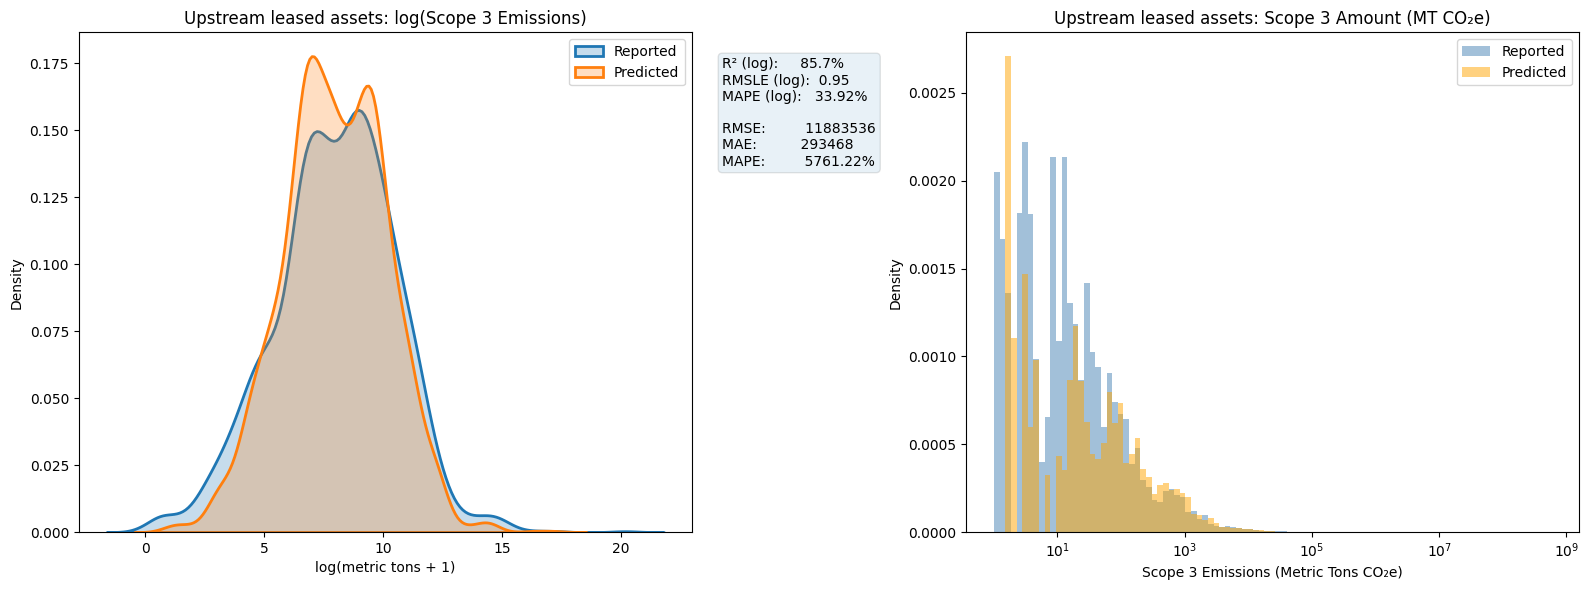

C:\Users\cliff\AppData\Local\Temp\ipykernel_23328\3362459463.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df['weight'] = 1 / (tail_df['Reported_Scope_3'] + 1)


 MAE Before:  293,467.87
 MAE After:   293,572.16
 MAPE Before: 5761.22%
 MAPE After:  1845.65%
 RMSLE Before: 0.9525
 RMSLE After:  1.5086


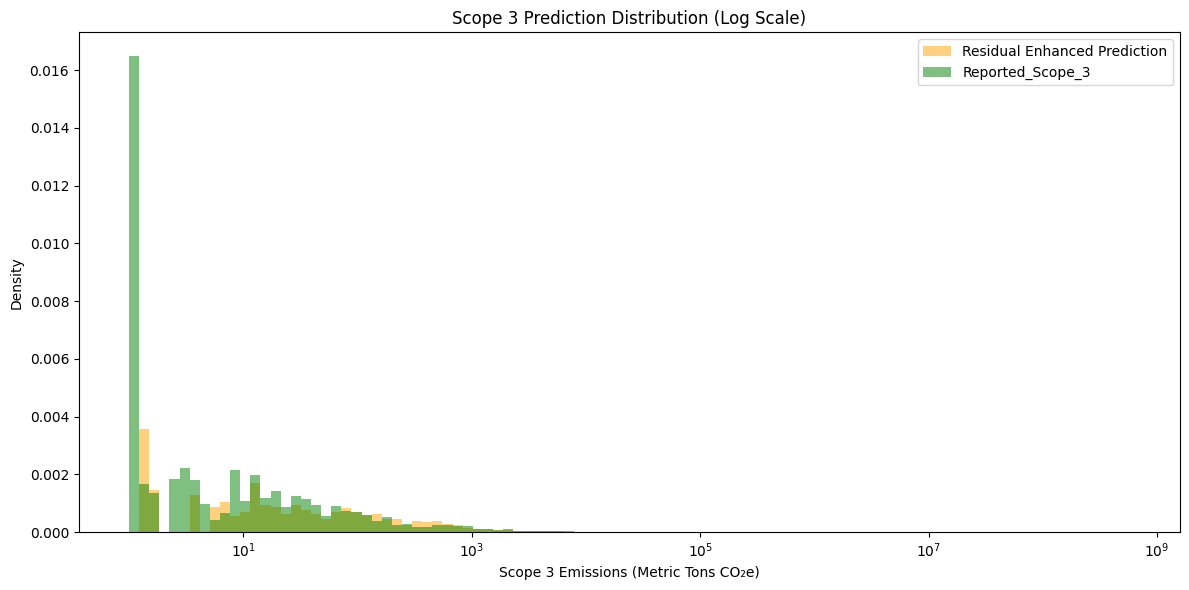

Converged using optimizer: lbfgs for group Upstream transportation and distribution
Variance across Primary_sector: 3.3751

Group: Upstream transportation and distribution --- Top 10 Influential Factors
                                  coef         pvalue
log_Scope_1_2_total_emission  0.413491  6.281335e-123
Company Var                   2.740023  2.524225e-116
log_Revenue_USD               0.945180   7.068284e-80
C(Year)[T.2023]               0.798027   4.694899e-18
log_totalAssets_USD          -0.556418   1.216345e-12
C(Year)[T.2022]               0.597921   7.192983e-11
C(Year)[T.2020]               0.559204   2.081524e-09
C(Year)[T.2021]               0.479833   2.203119e-07
C(Year)[T.2019]               0.439548   3.209167e-06
C(Year)[T.2018]               0.368749   1.328894e-04


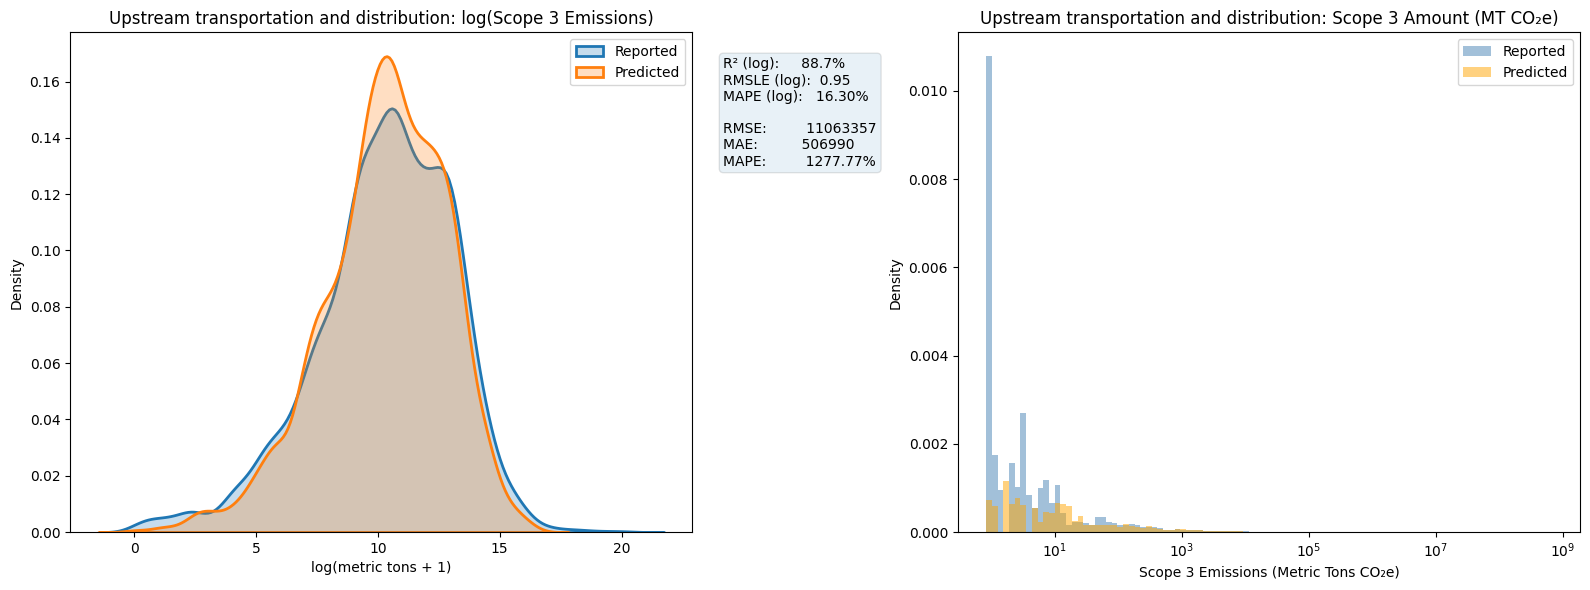

C:\Users\cliff\AppData\Local\Temp\ipykernel_23328\3362459463.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df['weight'] = 1 / (tail_df['Reported_Scope_3'] + 1)


 MAE Before:  506,989.64
 MAE After:   508,828.34
 MAPE Before: 1277.77%
 MAPE After:  484.85%
 RMSLE Before: 0.9466
 RMSLE After:  2.1678


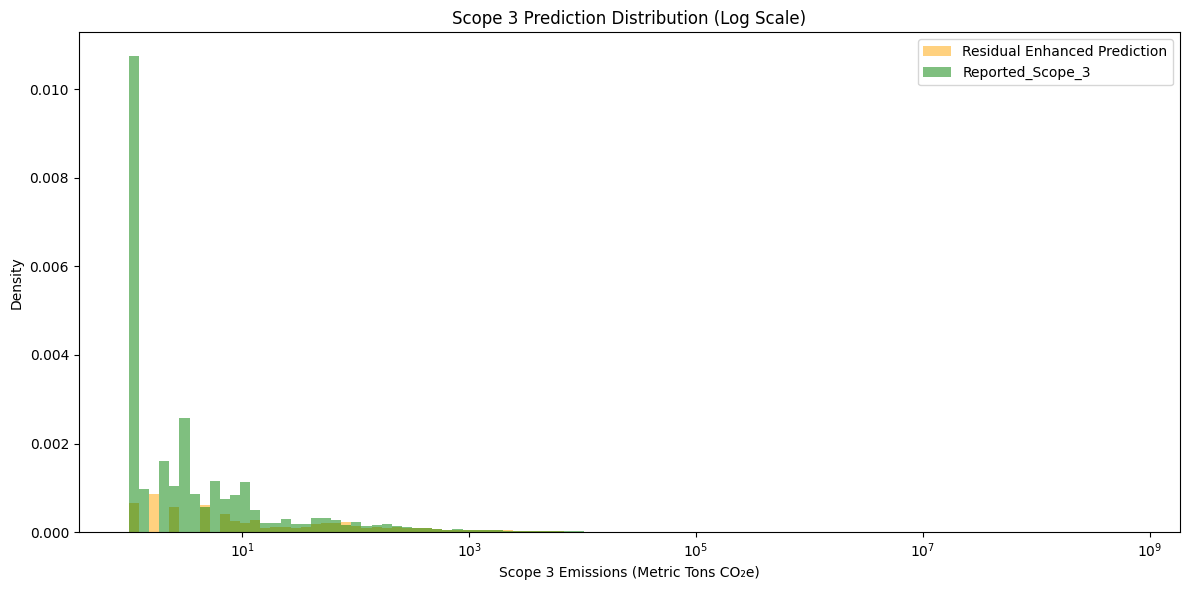

Converged using optimizer: lbfgs for group Use of sold products
Variance across Primary_sector: 8.3011

Group: Use of sold products --- Top 10 Influential Factors
                                  coef        pvalue
Company Var                   7.896673  3.360038e-92
log_Scope_1_2_total_emission  0.393563  6.747921e-43
log_Revenue_USD               0.905238  3.105766e-26
C(Year)[T.2023]               0.707984  3.407102e-11
C(Year)[T.2020]               0.673725  2.795123e-10
C(Year)[T.2021]               0.641189  1.418168e-09
C(Year)[T.2022]               0.635497  1.588477e-09
C(Year)[T.2019]               0.618239  7.379404e-09
C(Year)[T.2018]               0.546697  6.448754e-07
C(Year)[T.2015]               0.406151  3.196734e-04


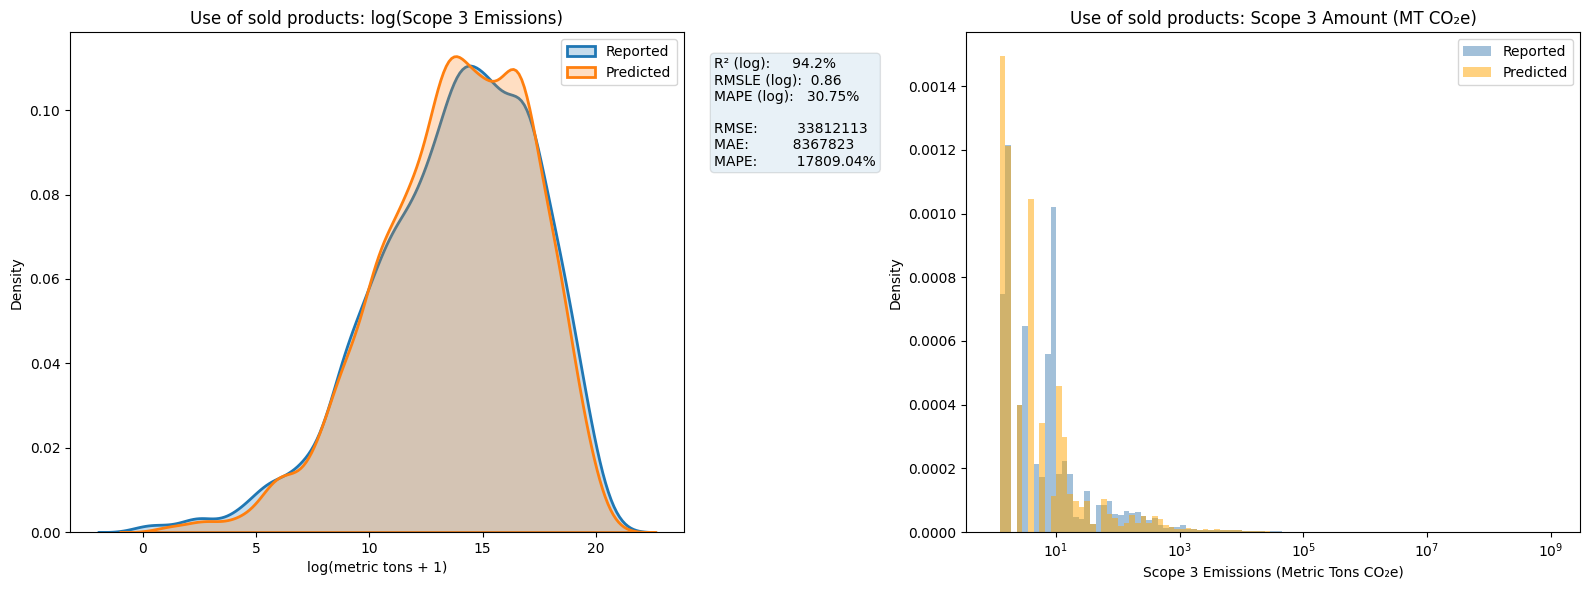

C:\Users\cliff\AppData\Local\Temp\ipykernel_23328\3362459463.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df['weight'] = 1 / (tail_df['Reported_Scope_3'] + 1)


 MAE Before:  8,367,823.42
 MAE After:   8,392,098.08
 MAPE Before: 17809.04%
 MAPE After:  3762.61%
 RMSLE Before: 0.8568
 RMSLE After:  2.2506


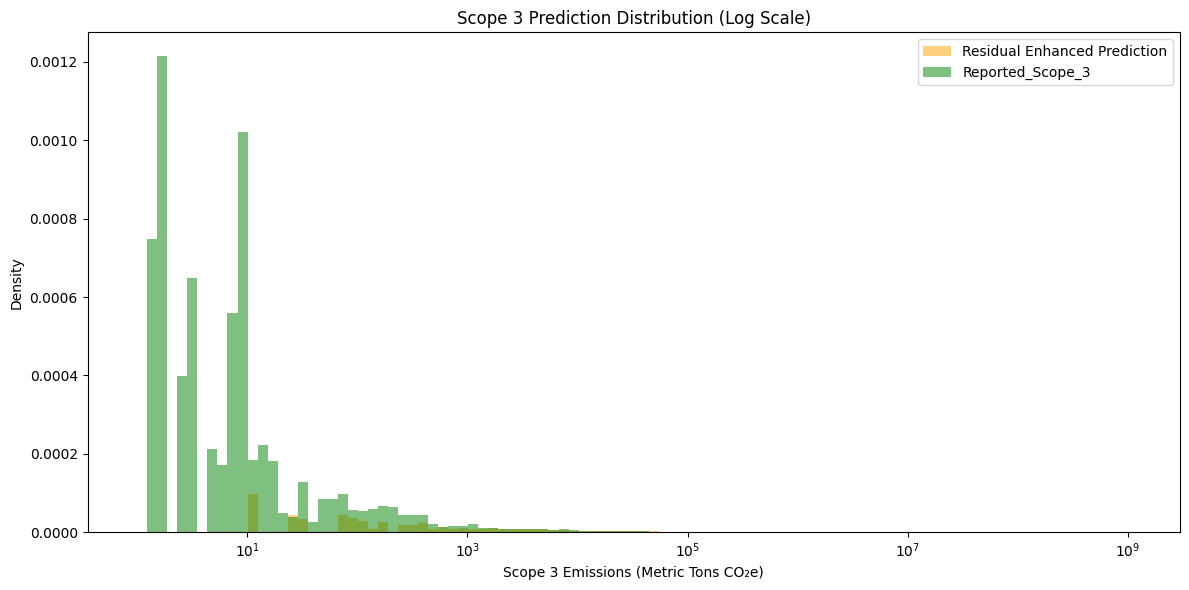

Converged using optimizer: lbfgs for group Waste generated in operations
Variance across Primary_sector: 2.7135

Group: Waste generated in operations --- Top 10 Influential Factors
                                  coef         pvalue
log_Scope_1_2_total_emission  0.480778  1.087328e-258
Company Var                   2.324781  3.497810e-136
log_Revenue_USD               0.478966   1.015052e-37
C(Year)[T.2020]               0.432292   1.541381e-07
C(Year)[T.2023]               0.405940   6.094413e-07
C(Year)[T.2019]               0.395788   2.000225e-06
log_totalAssets_USD          -0.249913   1.254515e-05
C(Year)[T.2018]               0.360572   2.456241e-05
log_totalDebt_USD             0.094816   6.109177e-05
C(Year)[T.2022]               0.309823   1.292953e-04


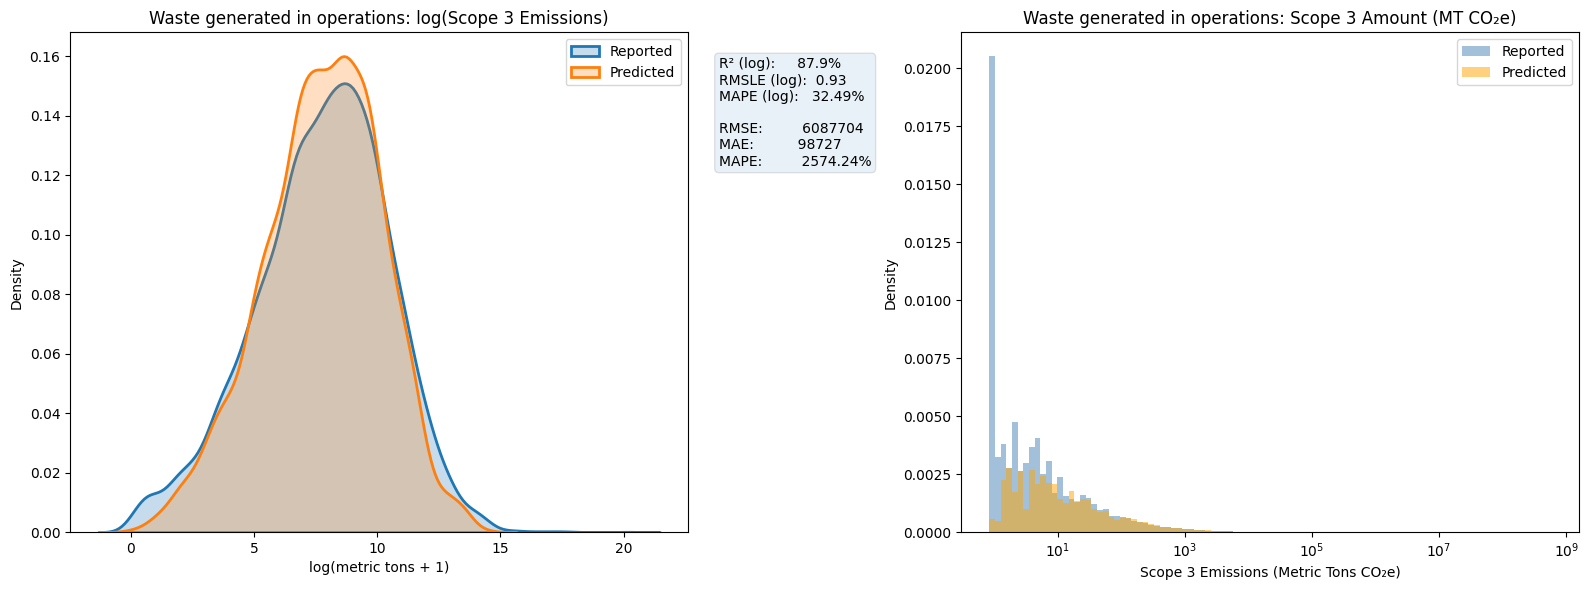

C:\Users\cliff\AppData\Local\Temp\ipykernel_23328\3362459463.py:243: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tail_df['weight'] = 1 / (tail_df['Reported_Scope_3'] + 1)


 MAE Before:  98,726.69
 MAE After:   98,933.67
 MAPE Before: 2574.24%
 MAPE After:  550.37%
 RMSLE Before: 0.9334
 RMSLE After:  1.8627


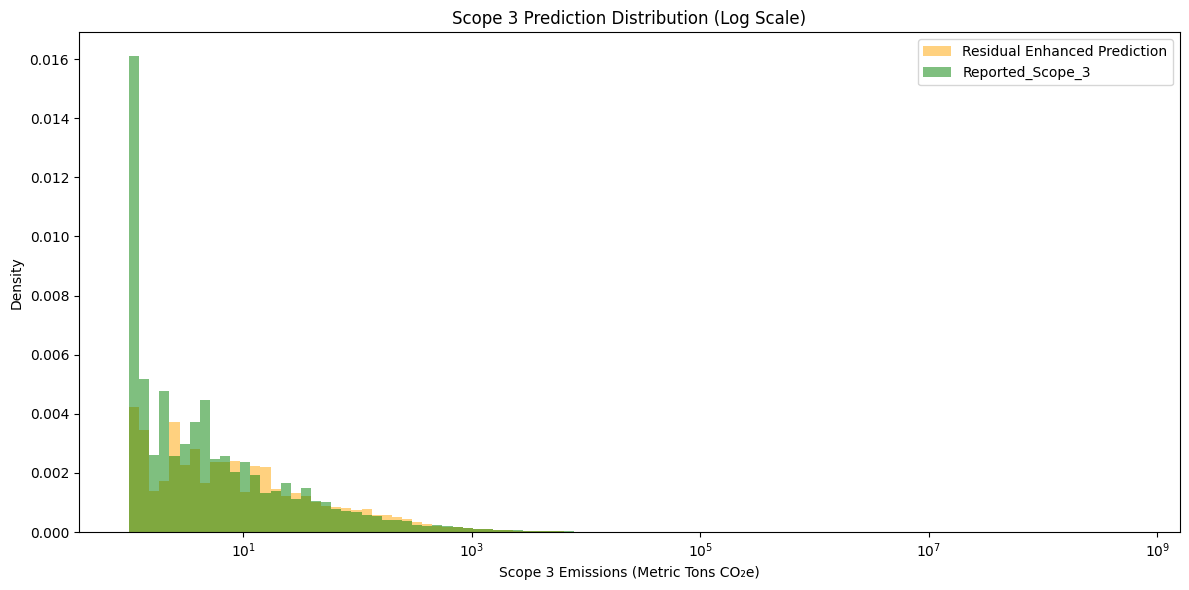


Summary of Model Performance Metrics by Scope-3 Source:



R²(log)%  \
financial_feature_stats                                                 NaN   
Business travel                                                        86.4   
Capital goods                                                          85.4   
Downstream leased assets                                               92.3   
Downstream transportation and distribution                             87.2   
Employee commuting                                                     87.7   
End of life treatment of sold products                                 90.3   
Franchises                                                             96.0   
Fuel-and-energy-related activities (not included in Scope 1 or 2)      90.3   
Investments                                                            90.3   
Other (downstream)                                                     98.5   
Other (upstream)                                                       94.5   
Processing of sold products                                            93.1   
Purchased goods and services                                           89.5   
Upstream leased assets                                                 85.7   
Upstream transportation and distribution                               88.7   
Use of sold products                                                   94.2   
Waste generated in operations                                          87.9   

                                                                   MAPE_orig%  \
financial_feature_stats                                                   NaN   
Business travel                                                         956.4   
Capital goods                                                          1780.3   
Downstream leased assets                                                126.3   
Downstream transportation and distribution                             5232.4   
Employee commuting                                                     9478.9   
End of life treatment of sold products                                 2182.6   
Franchises                                                               60.6   
Fuel-and-energy-related activities (not included in Scope 1 or 2)      1977.4   
Investments                                                            5051.5   
Other (downstream)                                                       37.9   
Other (upstream)                                                        160.6   
Processing of sold products                                             315.0   
Purchased goods and services                                           1235.9   
Upstream leased assets                                                 5761.2   
Upstream transportation and distribution                               1277.8   
Use of sold products                                                  17809.0   
Waste generated in operations                                          2574.2   

                                                                   MAPE_log%  \
financial_feature_stats                                                  NaN   
Business travel                                                         18.7   
Capital goods                                                           11.8   
Downstream leased assets                                                 8.8   
Downstream transportation and distribution                             105.0   
Employee commuting                                                      94.3   
End of life treatment of sold products                                  28.4   
Franchises                                                               4.7   
Fuel-and-energy-related activities (not included in Scope 1 or 2)       10.1   
Investments                                                             11.8   
Other (downstream)                                                       4.3   
Other (upstream)                                                 

In [42]:
# Remove zero values BEFORE log transformation and create a log target column.
prepped_df = prepped_df[prepped_df["Scope 3 Amount"] > 0].copy()
prepped_df["log_Scope_3_Amount"] = np.log1p(prepped_df["Scope 3 Amount"])

# Then group by "Scope 3 Sources" to create the dictionary of dataframes.
grouped_dfs = {
    group_name: group_df.copy()
    for group_name, group_df in prepped_df.groupby('Scope 3 Sources')
}

# Define the list of continuous variables.
numeric_cols = ['Scope 3 Amount', 'Revenue_USD', 'Market_Cap_USD', 
                'ebitda_USD', 'grossProfit_USD', 'netIncome_USD', 'cashAndCashEquivalents_USD', 
                'longTermInvestments_USD', 'totalAssets_USD', 'totalLiabilities_USD', 
                'totalInvestments_USD', 'totalDebt_USD', 'totalEquity_USD', 'Scope_1_2_total_emission']

# Signed log transformation function.
def signed_log(x):
    return np.sign(x) * np.log(np.abs(x) + 1)

# Dictionary to collect metrics for each group.
metrics_results = {}

feature_pvals = {}
feature_coefs = {}

# Only the “financial” predictors from numeric_cols (exclude Scope 3 Amount and country averages)
fin_cols = [col for col in numeric_cols 
            if col not in ('Scope 3 Amount')]

# Build the list of model feature names
all_feats = [f'log_{col.replace(" ", "_").replace("/", "_")}' for col in fin_cols]


# Loop over each group in the dictionary.
for group_name, df in grouped_dfs.items():
    for col in numeric_cols:
        new_col = f'log_{col.replace(" ", "_").replace("/", "_")}'
        df[new_col] = df[col].apply(signed_log)

    df['Year'] = df['Year of Data'].astype(str)
    df['Scope3_Source'] = df['Scope 3 Sources'].astype(str)
    df['Country'] = df['Countries'].astype(str)
    df['Company'] = df['Company Name'].astype(str)
    
    df['ThirdParty_Verification'] = df['Third_Party_Verification'].astype(str)
    df['Primary_activity'] = df['Primary activity'].astype(str)
    df['Primary_sector'] = df['Primary sector'].astype(str)

        # Drop rows with NA after transformations
    df = df.dropna(subset=[  # Include all needed predictors here
        'log_Revenue_USD', 'log_Market_Cap_USD', 'log_ebitda_USD', 
        'log_grossProfit_USD', 'log_netIncome_USD', 'log_cashAndCashEquivalents_USD',
        'log_longTermInvestments_USD', 'log_totalAssets_USD', 'log_totalLiabilities_USD',
        'log_totalInvestments_USD', 'log_totalDebt_USD', 'log_totalEquity_USD',
        'log_Scope_3_Amount', 'log_Scope_1_2_total_emission'
    ]).reset_index(drop=True)


    formula = (
        "log_Scope_3_Amount ~ log_Revenue_USD + "
        "log_Market_Cap_USD + log_grossProfit_USD + " #log_netIncome_USD + "   # + log_ebitda_USD
        "log_cashAndCashEquivalents_USD + log_totalAssets_USD + "  # + log_longTermInvestments_USD
        "log_totalLiabilities_USD + log_totalDebt_USD + log_Scope_1_2_total_emission + "  # + log_totalInvestments_USD log_totalEquity_USD + 
        "C(Year) + C(Country)"  #+ C(Primary_activity) 
    )

    model = smf.mixedlm(formula, df, groups=df["Primary_sector"],
                        vc_formula={"Company": "0 + C(Company)"})
    result = None



    # Try multiple optimizers
    optimizers = ['lbfgs', 'cg', 'bfgs', 'nm']
    for opt in optimizers:
        try:
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore")
                result = model.fit(method=opt, reml=False)
            if result.converged:
                print(f"Converged using optimizer: {opt} for group {group_name}")
                break
        except Exception as e:
            print(f"Failed with optimizer {opt} for group {group_name}: {e}")

    if result is None or not result.converged:
        print(f"Model did not converge for group {group_name}.")
        continue
    # Store p-values and coefficients
    coef_df = pd.DataFrame({
        'coef': result.params,
        'pvalue': result.pvalues
    })

        # Extract p-values and coefficients for each feature
    pvals = {feat: result.pvalues.get(feat, np.nan) for feat in all_feats}
    coefs = {feat: result.params.get(feat, np.nan)  for feat in all_feats}
    
    feature_pvals[group_name] = pvals
    feature_coefs[group_name] = coefs
    # Remove intercept for ranking
    if "Intercept" in coef_df.index:
        coef_df = coef_df.drop(index="Intercept")

    # Collect only financial feature results
    financial_vars = [f'log_{col.replace(" ", "_").replace("/", "_")}' for col in numeric_cols if 'Scope' not in col]
    financial_pvals = coef_df.loc[coef_df.index.isin(financial_vars)][['coef', 'pvalue']]

    # Store in dictionary
    if 'financial_feature_stats' not in metrics_results:
        metrics_results['financial_feature_stats'] = {}

    for var in financial_pvals.index:
        if var not in metrics_results['financial_feature_stats']:
            metrics_results['financial_feature_stats'][var] = []
        metrics_results['financial_feature_stats'][var].append({
            'group': group_name,
            'coef': financial_pvals.loc[var, 'coef'],
            'pvalue': financial_pvals.loc[var, 'pvalue']
        })

    # Print the top 10 most influential overall (based on p-value)
    coef_df = coef_df.sort_values(by='pvalue')
    top10 = coef_df.head(10)


    try:
        group_var = result.vcomp[0]  # Primary_sector
        company_var = result.vcomp[1] if len(result.vcomp) > 1 else np.nan
        residual_var = result.vcomp[-1]
        print(f"Variance across Primary_sector: {group_var:.4f}")

    except Exception as e:
        print(f"Could not extract variance components for group {group_name}: {e}")

    print(f"\nGroup: {group_name} --- Top 10 Influential Factors")
    print(top10)

    df['Predicted_log_Scope_3'] = result.fittedvalues
    df['Reported_log_Scope_3'] = df["log_Scope_3_Amount"]
    df['Predicted_Scope_3'] = np.expm1(df['Predicted_log_Scope_3'])
    df['Reported_Scope_3'] = np.expm1(df['Reported_log_Scope_3'])

    

    # ── METRICS ──────────────────────────────────────────────────────────────
    y_true_mt = df['Reported_Scope_3']
    y_pred_mt = df['Predicted_Scope_3']
    
    r2_pct      = r2_score(df['Reported_log_Scope_3'], df['Predicted_log_Scope_3']) * 100   # %
    mape_log    = np.mean(np.abs((df['Reported_log_Scope_3'] - df['Predicted_log_Scope_3'])
                                 / df['Reported_log_Scope_3'])) * 100                       # %
    mape_orig   = np.mean(np.abs((y_true_mt - y_pred_mt) / y_true_mt)) * 100                # %
    y_true_mt_clip = np.clip(y_true_mt, a_min=0, a_max=None)
    y_pred_mt_clip = np.clip(y_pred_mt, a_min=0, a_max=None)
    rmsle = np.sqrt(mean_squared_log_error(y_true_mt_clip, y_pred_mt_clip))

    rmse_orig   = np.sqrt(mean_squared_error(y_true_mt, y_pred_mt))                         # 2-dec
    mae_orig    = mean_absolute_error(y_true_mt, y_pred_mt)                                 # 2-dec
    

    # text box for left KDE
    metrics_text = (
        f"R²: {r2_pct:.1f}%\n"
        f"MAPE: {mape_orig:.1f}%\n"
        f"MAPE(log): {mape_log:.1f}%\n"
        f"RMSLE: {rmsle:.2f}\n"
        f"RMSE:  {rmse_orig:.2f}\n"
        f"MAE:   {mae_orig:.2f}"
    )
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 va='top', fontsize=10, bbox=dict(boxstyle='round', alpha=.1))
    
    # store in results dict
    metrics_results[group_name] = {
        "R²(log)%":   f"{r2_pct:.1f}",
        "MAPE_orig%": f"{mape_orig:.1f}",
        "MAPE_log%":  f"{mape_log:.1f}",
        "RMSLE":      f"{rmsle:.2f}",
        "RMSE_orig":  f"{rmse_orig:.2f}",
        "MAE_orig":   f"{mae_orig:.2f}",
    }
            

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    sns.kdeplot(df['Reported_log_Scope_3'], label='Reported', linewidth=2, fill=True, ax=axes[0])
    sns.kdeplot(df['Predicted_log_Scope_3'], label='Predicted', linewidth=2, fill=True, ax=axes[0])
    axes[0].set_title(f"{group_name}: log(Scope 3 Emissions)")
    axes[0].set_xlabel("log(metric tons + 1)")
    axes[0].set_ylabel("Density")
    axes[0].legend()

    metrics_text = (
        f"R² (log):     {r2_pct:.1f}%\n"
        f"RMSLE (log):  {rmsle:.2f}\n"
        f"MAPE (log):   {mape_log:.2f}%\n\n"
        f"RMSE:         {rmse_orig:.0f}\n"
        f"MAE:          {mae_orig:.0f}\n"
        f"MAPE:         {mape_orig:.2f}%"
    )
    axes[0].text(1.05, 0.95, metrics_text, transform=axes[0].transAxes,
                 verticalalignment='top', fontsize=10, bbox=dict(boxstyle='round', alpha=0.1))

    y_test_exp = df['Reported_Scope_3']
    y_pred_exp = df['Predicted_Scope_3']
    min_val = min(y_test_exp.min(), y_pred_exp.min())
    max_val = max(y_test_exp.max(), y_pred_exp.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)

    sns.histplot(y_test_exp, bins=log_bins, stat="density", color="steelblue", alpha=0.5, label="Reported", ax=axes[1])
    sns.histplot(y_pred_exp, bins=log_bins, stat="density", color="orange", alpha=0.5, label="Predicted", ax=axes[1])
    axes[1].set_xscale("log")
    axes[1].set_title(f"{group_name}: Scope 3 Amount (MT CO₂e)")
    axes[1].set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    axes[1].set_ylabel("Density")
    axes[1].legend()

    plt.tight_layout()
    plt.show()



    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_absolute_error, mean_squared_log_error
    import numpy as np
    
    # Compute residuals
    df['residual'] = df['Reported_Scope_3'] - df['Predicted_Scope_3']
    
    #  Select features for residual modeling
    features_for_resid = [
        'log_Revenue_USD', 'log_Market_Cap_USD', 'log_ebitda_USD',
        'log_grossProfit_USD', 'log_cashAndCashEquivalents_USD',
        'log_totalAssets_USD', 'log_totalLiabilities_USD', 'log_totalDebt_USD','log_Scope_1_2_total_emission'
    ]

    #  focus on lower 25% of true values for training residual model
    q25 = df['Reported_Scope_3'].quantile(0.25)
    tail_df = df[df['Reported_Scope_3'] < q25]
    
    # Compute weights: inverse of actual values to downweight large emitters
    tail_df['weight'] = 1 / (tail_df['Reported_Scope_3'] + 1)
    
    #Train residual model
    residual_model = RandomForestRegressor(n_estimators=100, random_state=0)
    residual_model.fit(tail_df[features_for_resid], tail_df['residual'], sample_weight=tail_df['weight'])
    
    #Predict residuals for all data
    df['residual_adjustment'] = residual_model.predict(df[features_for_resid])
    
    #Adjust the original predictions
    df['adjusted_prediction'] = df['Predicted_Scope_3'] + df['residual_adjustment']
    df['adjusted_prediction'] = df['adjusted_prediction'].clip(lower=0)  # Avoid negatives
    
    #Evaluation metrics
    mae_before = mean_absolute_error(df['Reported_Scope_3'], df['Predicted_Scope_3'])
    mae_after = mean_absolute_error(df['Reported_Scope_3'], df['adjusted_prediction'])
    
    mape_safe = lambda y_true, y_pred: np.mean(
        np.abs((y_true - y_pred) / np.clip(y_true, 1e-10, None))) * 100
    
    mape_before = mape_safe(df['Reported_Scope_3'], df['Predicted_Scope_3'])
    mape_after = mape_safe(df['Reported_Scope_3'], df['adjusted_prediction'])
    
    # Clip negative values to a small positive number for safe log transformation
    eps = 1e-10
    rmsle_before = np.sqrt(mean_squared_log_error(
        np.clip(df['Reported_Scope_3'], a_min=eps, a_max=None),
        np.clip(df['Predicted_Scope_3'], a_min=eps, a_max=None)
    ))
    rmsle_after = np.sqrt(mean_squared_log_error(
        np.clip(df['Reported_Scope_3'], a_min=eps, a_max=None),
        np.clip(df['adjusted_prediction'], a_min=eps, a_max=None)
    ))

    # update results dict
    metrics_results[group_name] = {
        "R²(log)%":   f"{r2_pct:.1f}",
        "MAPE_orig%": f"{mape_orig:.1f}",
        "MAPE_log%":  f"{mape_log:.1f}",
        "RMSLE":      f"{rmsle:.2f}",
        "RMSE_orig":  f"{rmse_orig:.2f}",
        "MAE_orig":   f"{mae_orig:.2f}",
    }

    #Print results
    print(f" MAE Before:  {mae_before:,.2f}")
    print(f" MAE After:   {mae_after:,.2f}")
    print(f" MAPE Before: {mape_before:.2f}%")
    print(f" MAPE After:  {mape_after:.2f}%")
    print(f" RMSLE Before: {rmsle_before:.4f}")
    print(f" RMSLE After:  {rmsle_after:.4f}")

    # Histogram comparison
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    y_pred_exp = df['adjusted_prediction']     # Residual-enhanced prediction
    y_adj_exp = df['Reported_Scope_3']         # Ground truth

    min_val = min(y_pred_exp.min(), y_adj_exp.min())
    max_val = max(y_pred_exp.max(), y_adj_exp.max())
    log_bins = np.logspace(np.log10(min_val + 1), np.log10(max_val + 1), 100)
    
    sns.histplot(y_pred_exp, bins=log_bins, stat="density", color="orange", alpha=0.5, label="Residual Enhanced Prediction", ax=ax)
    sns.histplot(y_adj_exp, bins=log_bins, stat="density", color="green", alpha=0.5, label="Reported_Scope_3", ax=ax)
    
    ax.set_xscale("log")
    ax.set_title(f"Scope 3 Prediction Distribution (Log Scale)")
    ax.set_xlabel("Scope 3 Emissions (Metric Tons CO₂e)")
    ax.set_ylabel("Density")
    ax.legend()
    
    plt.tight_layout()
    plt.show()

# Convert to DataFrames
pvals_df = pd.DataFrame(feature_pvals)
coefs_df = pd.DataFrame(feature_coefs)

# Convert the nested metrics_results dictionary to a DataFrame
metrics_df = pd.DataFrame.from_dict(metrics_results, orient='index')

# sort the index for readability
metrics_df = metrics_df.sort_index()

# drop the 'financial_feature_stats' row if it exists
metrics_df = metrics_df.drop(index='financial_feature_stats', errors='ignore')


# Display the full table of metrics
import pandas as pd
from IPython.display import display


# ───────────────── summary display ───────────────────────────────────────
summary_cols = ["R²(log)%","MAPE_orig%","MAPE_log%","RMSLE","RMSE_orig","MAE_orig"]
print("\nSummary of Model Performance Metrics by Scope-3 Source:\n")
display(pd.DataFrame(metrics_results).T[summary_cols].astype(float).round(2))

ghg_df_feature_red = pd.DataFrame(metrics_results).T[summary_cols].astype(float).round(2)
ghg_df_feature_red = metrics_df[summary_cols].copy()

In [ ]:
summary_cols = ["R²(log)%","MAPE_orig%","MAPE_log%","RMSLE","RMSE_orig","MAE_orig"]

ghg_df_feature_red = pd.DataFrame(metrics_results).T[summary_cols].astype(float).round(2)
ghg_df_feature_red = metrics_df[summary_cols].copy()

In [ ]:


ghg_df_feature_red.to_csv(
    r"C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\ghg_HLM_feat_reduced_w_resid_mod.csv"
)

In [ ]:
# ───────────────── summary display ───────────────────────────────────────
summary_cols = ["R²(log)%","MAPE_orig%","MAPE_log%","RMSLE","RMSE_orig","MAE_orig"]
print("\nSummary of Model Performance Metrics by Scope-3 Source:\n")
display(pd.DataFrame(metrics_results).T[summary_cols].astype(float).round(2))

ghg_df_feature_red_Residual_mod = pd.DataFrame(metrics_results).T[summary_cols].astype(float).round(2)
ghg_df_feature_red_Residual_modeling = ghg_df_feature_red_Residual_mod[summary_cols].copy()

In [ ]:

ghg_df_feature_red_Residual_modeling.to_csv(
    r"C:\Users\cliff\OneDrive\Documents\Data Practicum1\CDP_Data\Corporate_Data\ghg_HLM_feat_reduced_w_resid_mod.csv"
)

# References:

Bobbitt, Z. (2021, May 10). How to interpret MAPE values. Statology. https://www.statology.org/how-to-interpret-mape/
GHG Protocol. (n.d.). Scope 3 calculation guidance: Making corporate value chain accounting easier than ever. World Resources Institute. Retrieved April 29, 2025, from https://ghgprotocol.org/scope-3-calculation-guidance-2

Brownlee, J. (2020, April 24). How to model residual errors to correct time series forecasts with Python. Machine Learning Mastery. Retrieved from https://machinelearningmastery.com/model-residual-errors-correct-time-series-forecasts-python/

Hearts of Science, LLC, & Python for Data Science, LLC. (2025). Mixed-effects regression in Python. In Python for Data Science. https://www.pythonfordatascience.org/mixed-effects-regression-python/

Koshur, AI. (2024, February 20). Demystifying RMSLE: A comprehensive guide to root mean squared logarithmic error. Medium. https://koshurai.medium.com/demystifying-rmsle-a-comprehensive-guide-to-root-mean-squared-logarithmic-error-661820cb292d

Rocca, R. (2024, February 19). Interpreting R²: A narrative guide for the perplexed. Towards Data Science. https://towardsdatascience.com/interpreting-r%C2%B2-a-narrative-guide-for-the-perplexed-086a9a69c1ec/

Serafeim, G., & Vélez Caicedo, G. (2022). Machine learning models for prediction of Scope 3 carbon emissions (Working Paper No. 22-080). Harvard Business School.


